In [1]:
import gym
from gym import wrappers
# run that setup file to avoid errors

import gym_gazebo
import time
import numpy
import random
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import rospy
#import tf
import numpy as np
import random
from collections import namedtuple, deque
from queue import PriorityQueue

# from model import QNetwork
# from model import QNetworkCNN
from torch.autograd import Variable

import torch
import torch.nn.functional as F
import torch.optim as optim

In [3]:

import torch
from torch import nn
from collections import deque
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
import gym

cuda:0


In [4]:
env2 = gym.make('CartPole-v0')

In [5]:
print(env2.observation_space,env2.action_space)

Box(4,) Discrete(2)


In [6]:
env = gym.make('GazeboBATBot_Sonar-v0')

Gazebo launched!
Unable to register with master node [http://localhost:11311]: master may not be running yet. Will keep trying.


In [7]:
# checking the working of 1D conv 
a = torch.randn(1, 100, 1)  

print(a.size())
m = nn.Conv1d(100, 100, kernel_size = 8 , stride = 1 , padding = 5 ) 
out = m(a)
print("out size",out.size())
print("covolutional layer",m)



torch.Size([1, 100, 1])
out size torch.Size([1, 100, 4])
covolutional layer Conv1d(100, 100, kernel_size=(8,), stride=(1,), padding=(5,))


In [34]:
action = 2
observation, reward, done, info = env.step(action)
print("the observation size", len(observation), "the reduced observation", observation, observation[0].shape)


the observation size 2 the reduced observation (array([0.00000000e+00, 9.81237925e-10, 4.36561083e-09, ...,
       5.78931922e-07, 5.76368605e-07, 5.73790458e-07]), array([0.00000000e+00, 1.76485810e-10, 9.50266963e-10, ...,
       1.94979900e-07, 1.94222045e-07, 1.93220826e-07])) (22298,)


In [9]:
# env._close()

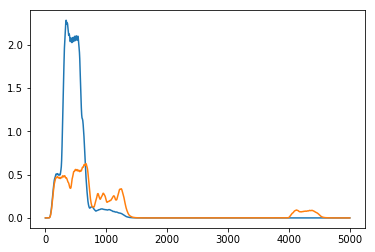

In [35]:
plt.plot(observation[0][:5000])
plt.plot(observation[1][:5000])

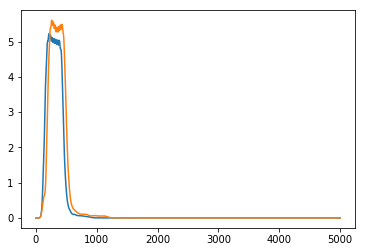

In [23]:
plt.plot(observation[0][:5000])
plt.plot(observation[1][:5000])

In [15]:
import sys
def print_slow(str , delay = 0.01):
    for letter in str:
        sys.stdout.write(letter)
        sys.stdout.flush()
        time.sleep(delay)

In [16]:
print_slow("aye aye aye enga paru")

aye aye aye enga paru

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [18]:

state_Type = type(observation)
print("the state_type of the observation", state_Type , observation)

the state_type of the observation <class 'tuple'> (-4.849493277991898, -7.32685728217469)


In [19]:
class QNetworkCNN_1D_BATBOT(nn.Module):
    """Actor (Policy) Model."""

    def __init__(self, state_size, action_size, seed, fc1_units=64, fc2_units=64 , dropout = 0.1 , augment_frames = 3 ):
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
            fc1_units (int): Number of nodes in first hidden layer
            fc2_units (int): Number of nodes in second hidden layer
        """
        super(QNetworkCNN_1D_BATBOT, self).__init__()
        self.seed = torch.manual_seed(seed = seed)
        self.conv1_left = nn.Conv1d(augment_frames, 128, kernel_size = 128 , stride=5, padding=1)
        self.conv1bnorm_left = nn.BatchNorm1d(128)
        self.conv2_left = nn.Conv1d(128, 64, kernel_size = 16, stride=2, padding=1)
        self.conv2bnorm_left = nn.BatchNorm1d(64)
        self.conv3_left = nn.Conv1d(64, 64, kernel_size = 5, stride=1, padding=1)
        self.conv3bnorm_left = nn.BatchNorm1d(64)
        self.dropout_left = nn.Dropout(dropout)
        self.pool_left = nn.MaxPool1d(kernel_size = 4, stride = 4 )
        
        self.conv1_right = nn.Conv1d(augment_frames, 128, kernel_size= 128, stride=5, padding=1)
        self.conv1bnorm_right = nn.BatchNorm1d(128)
        self.conv2_right = nn.Conv1d(128, 64, kernel_size = 16, stride=2, padding=1)
        self.conv2bnorm_right = nn.BatchNorm1d(64)
        self.conv3_right = nn.Conv1d(64, 64, kernel_size = 5, stride=1, padding=1)
        self.conv3bnorm_right = nn.BatchNorm1d(64)
        self.dropout_right = nn.Dropout(dropout)
        self.pool_right = nn.MaxPool1d(kernel_size = 4, stride = 4 )
        
        # this needs to be changed accordingly
        self.in_linear = 6*64
        
        self.fc1 = nn.Linear(2*self.in_linear, fc1_units)
        self.fc1bnorm = nn.BatchNorm1d(fc1_units)
        self.fc2 = nn.Linear(fc1_units,  fc2_units)
        self.fc2bnorm = nn.BatchNorm1d(fc2_units)
        self.fc2d = nn.Linear(fc2_units,  fc2_units)
        self.fc2dbnorm = nn.BatchNorm1d(fc2_units)
        self.fc3 = nn.Linear(fc2_units, action_size)
        self.dropout = nn.Dropout(dropout) 

    def forward(self, left_state, right_state):
        """Build a network that maps state -> action values."""
        x1 = self.conv1_left(left_state)
        x1 = self.conv1bnorm_left(x1)
        x1 = F.relu(x1)
        x1 = self.pool_left(x1)
        x1 = self.conv2_left(x1)
        x1 = self.conv2bnorm_left(x1)
        x1 = F.relu(x1)
        x1 = self.pool_left(x1)
        x1 = self.conv3_left(x1)
        x1 = self.conv3bnorm_left(x1)
        x1 = F.relu(x1)
        x1 = self.pool_left(x1)
        
        x2 = self.conv1_right(right_state)
        x2 = self.conv1bnorm_right(x2)
        x2 = F.relu(x2)
        x2 = self.pool_right(x2)
        x2 = self.conv2_right(x2)
        x2 = self.conv2bnorm_right(x2)
        x2 = F.relu(x2)
        x2 = self.pool_right(x2)
        x2 = self.conv3_right(x2)
        x2 = self.conv3bnorm_right(x2)
        x2 = F.relu(x2)
        x2 = self.pool_right(x2)
        
        
        
        #print(x.size())
        x1 = x1.view(-1,self.in_linear)
        x2 = x2.view(-1,self.in_linear)
        x = torch.cat((x1,x2)).view(-1, 2*self.in_linear)
        #print(x.size())
        x = self.fc1(x)
        x = self.fc1bnorm(x)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.fc2bnorm(x)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.fc2d(x)
        x = self.fc2dbnorm(x)
        x = F.relu(x)
        x = self.dropout(x)
        
        return self.fc3(x)

In [20]:
# this uses the lower diemensional data 
# energies of the echo from the left and right hear 
class QNetworkANN_BATBOT(nn.Module):
    def __init__(self, state_size , action_size , seed, fc1_units=64, fc2_units=64 ,fc3_units = 64, dropout = 0.3, augment_frames = 3):
        super(QNetworkANN_BATBOT, self).__init__()
        self.in_linear = 2*augment_frames
        # LAYER 1 - input layer
        self.fc1 = nn.Linear(self.in_linear , fc1_units)
        self.fc1bnorm = nn.BatchNorm1d(fc1_units)
        # HIDDEN LAYER 1
        self.fc2 = nn.Linear(fc1_units,fc2_units)
        self.fc2bnorm = nn.BatchNorm1d(fc2_units)
        # HIDDEN LAYER 2
        self.fc3 = nn.Linear(fc2_units,fc3_units)
        self.fc3bnorm = nn.BatchNorm1d(fc3_units)
        # OUTPUT LAYER
        self.fc4 = nn.Linear(fc3_units, action_size)
        #DROPOUT
        self.dropout = nn.Dropout(dropout) 
    def forward(self, left_state , right_state):
        #joining the left ear and right ear
        x = torch.cat((left_state,right_state)).view(-1, self.in_linear)
        #INPUT BLOCK
        x = self.fc1(x)
        x = self.fc1bnorm(x)
        x = F.relu(x)
#         x = self.dropout(x)
        #LAYEr 1 BLOCK
        x = self.fc2(x)
        x = self.fc2bnorm(x)
        x = F.relu(x)
#         x = self.dropout(x)
        #LAYER 2 BLOCK
        x = self.fc3(x)
        x = self.fc3bnorm(x)
        x = F.relu(x)
#         x = self.dropout(x)
        # OUTPUT BLOCK
        return self.fc4(x)
    

In [21]:
# this uses the lower diemensional data 
# energies of the echo from the left and right hear 
class QNetworkANN(nn.Module):
    def __init__(self, state_size , action_size , seed, fc1_units=64, fc2_units=64 ,fc3_units = 64, dropout = 0.3, augment_frames = 3):
        super(QNetworkANN, self).__init__()
        self.in_linear = state_size*augment_frames
        # LAYER 1 - input layer
        self.fc1 = nn.Linear(self.in_linear , fc1_units)
        self.fc1bnorm = nn.BatchNorm1d(fc1_units)
        # HIDDEN LAYER 1
        self.fc2 = nn.Linear(fc1_units,fc2_units)
        self.fc2bnorm = nn.BatchNorm1d(fc2_units)
        # HIDDEN LAYER 2
        self.fc3 = nn.Linear(fc2_units,fc3_units)
        self.fc3bnorm = nn.BatchNorm1d(fc3_units)
        # OUTPUT LAYER
        self.fc4 = nn.Linear(fc3_units, action_size)
        #DROPOUT
        self.dropout = nn.Dropout(dropout) 
    def forward(self, state):
        #joining the left ear and right ear
        x = state.view(-1, self.in_linear)
        #INPUT BLOCK
        x = self.fc1(x)
        x = self.fc1bnorm(x)
        x = F.relu(x)
        x = self.dropout(x)
        #LAYEr 1 BLOCK
        x = self.fc2(x)
        x = self.fc2bnorm(x)
        x = F.relu(x)
        x = self.dropout(x)
        #LAYER 2 BLOCK
        x = self.fc3(x)
        x = self.fc3bnorm(x)
        x = F.relu(x)
        x = self.dropout(x)
        # OUTPUT BLOCK
        return self.fc4(x)

In [22]:
BUFFER_SIZE = int(7e5)  # replay buffer size
BATCH_SIZE = 32       # minibatch size
GAMMA = 0.99           # discount factor
TAU = 1e-3              # for soft update of target parameters
LR = 1e-4               # learning rate 

WeightDecay = 0

UPDATE_EVERY = 1      # how often to update the network
N_Update_per = 2 # no of updates per time

Momentum = 0.9  
Epislon = 0.99
min_Epislon = 0.001

Decay = 0.999
MaxBeta = 1
MinBeta = 0


ALPHA = 0.5
ALPHA2 = 1
ALPHA_min = 0.01
Alphadecay = 0.999 
ErrorOffset = 0.01
min_beta = 0.3

debug 3
plotting echoes...


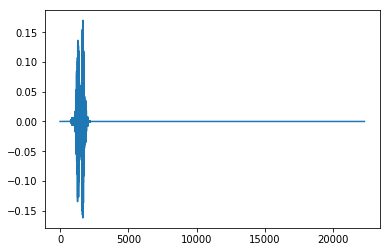

0.006020764042349423 0.005671617213417502 min delays
sample delays [0.01522692 0.01414945 0.01322608 ... 0.009059   0.00878173 0.00908339] [0.0066259  0.00650819 0.00605791 0.00661211 0.00649544 0.00604944
 0.00661261 0.00649592 0.00604988 0.00661329 0.00649659 0.00605048
 0.00660019 0.00648451 0.00604262 0.00660124 0.00648554 0.00604357
 0.00660248 0.00648676 0.00604468 0.00659003 0.00647532 0.0060374
 0.00659164 0.00646406 0.00603026 0.00657956 0.00646581 0.00603188
 0.00658153 0.00646774 0.00603367 0.00657001 0.00645721 0.00602719
 0.00657234 0.0064595  0.00602932 0.00657486 0.00646197 0.00602328
 0.00656403 0.00645211 0.00602574 0.00656692 0.00645494 0.00602837
 0.00655692 0.00644589 0.00602323 0.00656018 0.00644909 0.00602622
 0.00656364 0.00645248 0.00602076 0.00655345 0.00644325 0.00602407
 0.00655726 0.00602756 0.00666744 0.0065479  0.00602299 0.00655207
 0.00602681 0.00655643 0.00666656 0.00654784 0.00667138 0.00655257
 0.00666229 0.00654444 0.00666749 0.00654955 0.00665824 0.

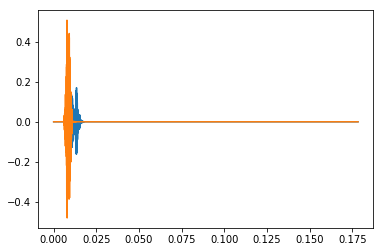

debug 2
debug
debug 3
plotting echoes...


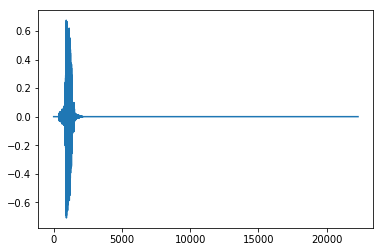

0.002818154587465174 0.002813269110286937 min delays
sample delays [0.00284771 0.00283762 0.00283028 ... 0.00575971 0.00605058 0.00637877] [0.00284771 0.00283762 0.00283028 ... 0.00363587 0.00370519 0.00378086]
echo energy before 0.03410910568040972 0.013745993488026976
windows (array([   0,    1,    2, ..., 3377, 3378, 3379]),) (array([   0,    1,    2, ..., 3101, 3102, 3103]),) (1680,) (1960,)
echoes [0.00031568 0.00031589 0.00028204 ... 0.00042951 0.00047443 0.00052009] [0.00027638 0.00026742 0.00025823 ... 0.00021985 0.00025709 0.00027885] (1680,)
echoes zeroes [] []
plotting echoes...
l e -2.5474938394249773  R E -5.568615559806286 energies 0.16302846272020613 0.0379806921004117


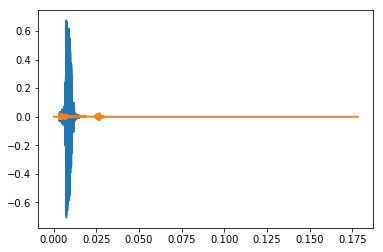

debug 2
debug
debug 3
plotting echoes...


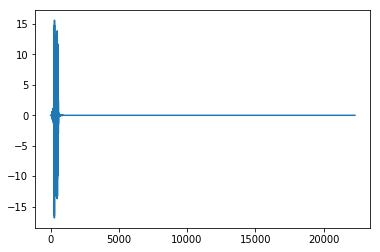

0.0005894141600412481 0.0005894141600412481 min delays
sample delays [0.00079827 0.00077956 0.00076137 ... 0.00293808 0.00312981 0.00529859] [0.00079827 0.00077956 0.00076137 ... 0.00152736 0.0015553  0.00158581]
echo energy before 26.006087136016085 27.019418381926897
windows (array([   0,    1,    2, ..., 5744, 5745, 5746]),) (array([   0,    1,    2, ..., 5914, 5915, 5916]),) (3541,) (3442,)
echoes [0.00446537 0.00465437 0.00433649 ... 0.00151911 0.00085882 0.00050015] [0.00390956 0.00394011 0.00397042 ... 0.00103578 0.00054502 0.00022272] (3541,)
echoes zeroes [] []
plotting echoes...
l e 24.541280224875695  R E 18.73815040979593 energies 10112.722342064426 73.78016030477637


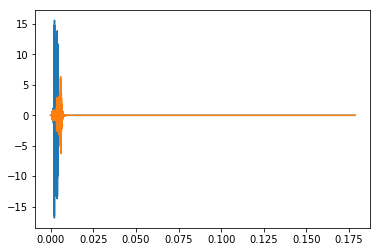

debug 2
debug
Score: 0.13


In [23]:
action_size = 3
score = 0 # initialize the score
i = 30
while i > 0:
    action = np.random.randint(action_size)                 # select an action
    observation, reward, done, info = env.step(action , debug= True)      # send the action to the environment
    next_state = observation                                # see if episode has finished
    
    
    score += reward                                         # update the score
    state = next_state                                      # roll over the state to next time step
    i-=1
    if done:                                                # exit loop if episode finished
        break
    
print("Score: {}".format(score))

In [24]:
def data_norm(obs, min_val = -60, max_val=60):
    return (np.array(obs) - min_val)/(max_val - min_val)

normd = data_norm(observation)
print(normd , observation)

[0.70451067 0.65615125] (24.541280224875695, 18.73815040979593)


In [25]:
print("\U0001F605")

😅


In [26]:
import numpy as np
import random
from collections import namedtuple, deque
from queue import PriorityQueue

# from model import QNetwork
# from model import QNetworkCNN
from torch.autograd import Variable

import torch
import torch.nn.functional as F
import torch.optim as optim

In [27]:
print(observation)

(24.541280224875695, 18.73815040979593)


In [31]:
print(type(observation))
state_Type = type(observation)
test_agent= Agent(len(observation), 3 , state_Type , seed = 0 , signal = "eng")
test_agent.memory.batch_size = 32
for i in range(800):
    test_agent.step([i,observation[1]], 2, 1, [i+1,observation[1]], False)
print("test_memory added to the replay buffer" , len(test_agent.memory.memory), "batch size", test_agent.memory.batch_size)
print(test_agent.memory.memory[0])
test_sample = test_agent.memory.sample_idx_withBatch(10)
print("sample",test_sample, "states", test_sample[0].size())
states = test_sample[0]
left_s = states[:,:,0].view(10 ,  -1)
right_s = states[:,:,1].view(10 ,  -1)
print(left_s.size(), left_s , right_s)
# print("the sampled memory for learning", np.shape(test_agent.memory.sample_idx()[0]), test_agent.memory.sample_idx()[1][2])

<class 'tuple'>
AI: Wtf! r u doing 😠 I am dying here... 
ME: Sorry 😅 zoned out little .. was watching some lame anime.. 😬 
AI: Adai Venna !!!.... mudidu vellaiya paru... 
ME: Seringa.. 😬 
the model is defined successfully QNetworkANN_BATBOT(
  (fc1): Linear(in_features=6, out_features=64, bias=True)
  (fc1bnorm): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc2bnorm): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc3bnorm): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc4): Linear(in_features=64, out_features=3, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)
test_memory added to the replay buffer 800 batch size 32
Experience(state=[0, 18.73815040979593], action=2, reward=1, next_state=[1, 18.73815040979593], done=False)
sample (tensor([[[  1.0000, 

In [32]:
print(states, states.size(), states.view(10,-1).size())
test_agent.act([32,31], eps =0, debug = True)

tensor([[[  1.0000,  18.7381],
         [  2.0000,  18.7381],
         [  3.0000,  18.7381]],

        [[231.0000,  18.7381],
         [232.0000,  18.7381],
         [233.0000,  18.7381]],

        [[557.0000,  18.7381],
         [558.0000,  18.7381],
         [559.0000,  18.7381]],

        [[205.0000,  18.7381],
         [206.0000,  18.7381],
         [207.0000,  18.7381]],

        [[302.0000,  18.7381],
         [303.0000,  18.7381],
         [304.0000,  18.7381]],

        [[403.0000,  18.7381],
         [404.0000,  18.7381],
         [405.0000,  18.7381]],

        [[ 27.0000,  18.7381],
         [ 28.0000,  18.7381],
         [ 29.0000,  18.7381]],

        [[159.0000,  18.7381],
         [160.0000,  18.7381],
         [161.0000,  18.7381]],

        [[233.0000,  18.7381],
         [234.0000,  18.7381],
         [235.0000,  18.7381]],

        [[242.0000,  18.7381],
         [243.0000,  18.7381],
         [244.0000,  18.7381]]], device='cuda:0') torch.Size([10, 3, 2]) torch.Size

2

torch.Size([1])


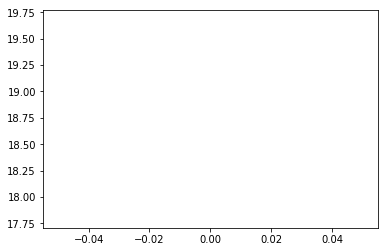

In [33]:
a  = test_agent.memory.sample_idx(peek_a_boo= True)
print(a[0][:,0,0].shape)
plt.plot(a[0][0,2,1].cpu().numpy())

In [34]:

class ReplayBuffer:
    """Fixed-size buffer to store experience tuples. 
    Also can be used to store the priortized tuples"""

    def __init__(self, action_size, buffer_size, batch_size, seed):
        """Initialize a ReplayBuffer object.

        Params
        ======
            action_size (int): dimension of each action
            buffer_size (int): maximum size of buffer
            batch_size (int): size of each training batch
            Priority(float):
            seed (int): random seed
        """
        self.action_size = action_size
        self.memory = deque(maxlen=buffer_size)  
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])
        self.seed = random.seed(seed)
        self.selectedIdx = np.array([])
    
    def add(self, state, action, reward, next_state, done):
        """Add a new experience to memory."""
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)
    
    def sample(self):
        """Randomly sample a batch of experiences from memory."""
        experiences = random.sample(self.memory, k=self.batch_size)
        #print(experiences[0])
        states = torch.from_numpy(np.stack([e.state for e in experiences if e is not None] , axis =0 )).float().to(device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).long().to(device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
        next_states = torch.from_numpy(np.stack([e.next_state for e in experiences if e is not None], axis =0)).float().to(device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)
  
        return (states, actions, rewards, next_states, dones)
    def sample_idx(self , peek_a_boo = False):
        if peek_a_boo == True:
            batch_size = 1
        else:
            batch_size = self.batch_size
        index_value = random.sample(list(enumerate(self.memory)), k= batch_size)
        #print("batch", self.batch_size)
        states = torch.from_numpy(np.stack([[self.memory[e[0]-2].state,self.memory[e[0]-1].state ,e[1].state] for e in index_value if e is not None and e[1].done != True and self.memory[e[0]-1].done != True and e[0]-1 > 0 and e[0] < len(self.memory)-1] , axis = 0 )).float().to(device)
        actions = torch.from_numpy(np.vstack([e[1].action for e in index_value if e is not None and e[1].done != True and self.memory[e[0]-1].done != True and e[0]-1 > 0 and e[0] < len(self.memory)-1])).long().to(device)
        rewards = torch.from_numpy(np.vstack([e[1].reward for e in index_value if e is not None and e[1].done != True and self.memory[e[0]-1].done != True and e[0]-1 > 0 and e[0] < len(self.memory)-1])).float().to(device)
        next_states = torch.from_numpy(np.stack([[self.memory[e[0]-2].next_state, self.memory[e[0]-1].next_state ,e[1].next_state] for e in index_value if e is not None and e[1].done != True and self.memory[e[0]-1].done != True and e[0]-1 > 0 and e[0] < len(self.memory)-1] , axis = 0 )).float().to(device)
        dones = torch.from_numpy(np.vstack([e[1].done for e in index_value if e is not None and e[1].done != True and self.memory[e[0]-1].done != True and e[0]-1 > 0 and e[0] < len(self.memory)-1]).astype(np.uint8)).float().to(device)
        
        return (states, actions, rewards, next_states, dones)
    
    def sample_idx_withBatch(self , batch_size , peek_a_boo = False):
        
        if peek_a_boo == True:
            batch_size = 1
        index_value = random.sample(list(enumerate(self.memory)), k=batch_size)
        states = torch.from_numpy(np.stack([[self.memory[e[0]-2].state,self.memory[e[0]-1].state ,e[1].state] for e in index_value if e is not None and e[1].done != True and self.memory[e[0]-1].done != True] , axis = 0 )).float().to(device)
        actions = torch.from_numpy(np.vstack([e[1].action for e in index_value if e is not None and e[1].done != True and self.memory[e[0]-1].done != True])).long().to(device)
        rewards = torch.from_numpy(np.vstack([e[1].reward for e in index_value if e is not None and e[1].done != True and self.memory[e[0]-1].done != True])).float().to(device)
        next_states = torch.from_numpy(np.stack([[self.memory[e[0]-2].next_state,self.memory[e[0]-1].next_state ,e[1].next_state] for e in index_value if e is not None and e[1].done != True and self.memory[e[0]-1].done != True] , axis = 0 )).float().to(device)
        dones = torch.from_numpy(np.vstack([e[1].done for e in index_value if e is not None and e[1].done != True and self.memory[e[0]-1].done != True]).astype(np.uint8)).float().to(device)
        
        return (states, actions, rewards, next_states, dones)
    
    
    
        



    def __len__(self):
        """Return the current size of internal memory."""
        return len(self.memory)
    
class PriorityReplayBuffer:
    """Fixed-size buffer to store experience tuples. 
    Also can be used to store the priortized tuples"""

    def __init__(self, action_size, buffer_size, batch_size, alpha, state_type ,  seed):
        """Initialize a ReplayBuffer object.

        Params
        ======
            action_size (int): dimension of each action
            buffer_size (int): maximum size of buffer
            batch_size (int): size of each training batch
            Priority(float):
            seed (int): random seed
        """
        self.action_size = action_size
        self.Prioritymemory = deque(maxlen=buffer_size) 
        self.batch_size = batch_size
        self.expType = [('state',state_type), ('action','float'),('reward','float'), ('next_state',state_type),('done','bool'),('Priority','float')]
        self.experienceMemory = np.array([], dtype = self.expType)
        self.seed = random.seed(seed)
        self.max_size = buffer_size
        self.alpha = alpha
        
    
    def add(self, state, action, reward, next_state, done, Priority):
        """Add a new experience to memory."""
        if(np.size(self.experienceMemory) > self.max_size):
            self.experienceMemory = np.delete(self.experienceMemory , 0 )
        e = (state, action, reward, next_state, done, Priority)
        exp = np.array([e] , dtype = self.expType)
        self.experienceMemory = np.append(self.experienceMemory , exp )
        #print("memory", np.shape(self.experienceMemory['state'][0]))
        #self.memory.append(e)
    
    def sample(self , alpha , beta):
        """ sample a batch of experiences from memory. based on the Priority"""
        # write ur own implementation
        self.alpha = alpha
        self.beta = beta
        if(self.beta < min_beta):
            self.beta = min_beta
        probs ,Choosenindex = self.Batchsample()
        self.selectedIdx = Choosenindex
        weights = (np.size(self.experienceMemory)* probs)**(-(self.beta))
        weights /= np.max(weights)
        weights = Variable(torch.from_numpy(np.vstack(weights)).float().to(device))
        states = Variable(torch.from_numpy(np.stack(self.experienceMemory['state'][Choosenindex] , axis =0)).float().to(device))
        #print("at sampling",states.size())
        actions = Variable(torch.from_numpy(np.vstack(self.experienceMemory['action'][Choosenindex])).long().to(device))
        rewards = Variable(torch.from_numpy(np.vstack(self.experienceMemory['reward'][Choosenindex])).float().to(device))
        next_states = Variable(torch.from_numpy(np.stack(self.experienceMemory['next_state'][Choosenindex] , axis =0)).float().to(device))
        dones = Variable(torch.from_numpy(np.vstack(self.experienceMemory['done'][Choosenindex]).astype(np.uint8)).float().to(device))
        
        
  
        return (states, actions, rewards, next_states, dones , weights)
    
    def Batchsample(self):
        """Samples the batch here """
        all_priorities = self.experienceMemory['Priority']
        probs = self.GetProbs(all_priorities)
        indeArr = np.arange(len(probs))
        Choosenindex = np.random.choice(indeArr, self.batch_size,p=probs, replace = False)
        return probs[Choosenindex] , Choosenindex
    
    def GetProbs(self, Pri):
        """ Probabilities are defiend here"""
        Numerator = np.power(Pri, self.alpha)
        Demoninator = np.sum(Numerator)
        Probs = Numerator / Demoninator
        return Probs
    
    def updatePriorities(self,Error):
        #print(self.selectedIdx , Error , np.size(Error) , np.size(self.selectedIdx))
        self.experienceMemory['Priority'][self.selectedIdx] = Error.flatten()
                                    
    def __len__(self):
        """Return the current size of internal memory."""
        return len(self.experienceMemory)

def handling_echo_bug(echo , size = 5000):
    state = np.zeros(5000)
    state[:len(echo)] = echo
    return state

In [35]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# in case of cuda errors
# device =  "cpu"
print("Device which is used is " , device)

class Agent():
    """Interacts with and learns from the environment."""

    def __init__(self, state_size, action_size, state_type,seed,signal = "echo", augment_states_T=3 ):
        """Initialize an Agent object.
        
        Params
        ======
            state_size (int): dimension of each state
            action_size (int): dimension of each action
            seed (int): random seed
            Beta is for sacling down the weights update due to the Priority Queues
        """
        self.state_size = state_size
        self.action_size = action_size
        self.seed = random.seed(seed)
        self.Beta = 1
        self.Gamma = GAMMA
        self.augment_time =  augment_states_T

        # Q-Network
        if(signal == "echo"):
            self.qnetwork_local = QNetworkCNN_1D_BATBOT(state_size, action_size, seed , augment_frames =  augment_states_T).to(device)
            self.qnetwork_target = QNetworkCNN_1D_BATBOT(state_size, action_size, seed , augment_frames =  augment_states_T).to(device)
        else:
            print_slow("AI: ", delay =0)
            print_slow("Wtf! r u doing \U0001F620 I am dying here... \n")
            print_slow("ME: ", delay =0)
            print_slow("Sorry \U0001F605 zoned out little .. was watching some lame anime.. \U0001F62C \n")
            print_slow("AI: ", delay =0)
            print_slow("Adai Venna !!!.... mudidu vellaiya paru... \n")
            print_slow("ME: ", delay =0)
            print_slow("Seringa.. \U0001F62C \n")
            time.sleep(1)
            self.qnetwork_local = QNetworkANN_BATBOT(state_size, action_size, seed , augment_frames =  augment_states_T).to(device)
            self.qnetwork_target = QNetworkANN_BATBOT(state_size, action_size, seed , augment_frames =  augment_states_T).to(device)
            
            
        print("the model is defined successfully", self.qnetwork_target)
        self.optimizer = optim.Adam(self.qnetwork_local.parameters(), lr=LR , weight_decay= WeightDecay)
        self.state_type = state_type
        # Replay memory
        #self.memory = PriorityReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE,ALPHA,state_type, seed)
        self.memory = ReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE, seed)
        # Initialize time step (for updating every UPDATE_EVERY steps)
        self.t_step = 0
        
    
    def step(self, state, action, reward, next_state, done):
        # Save experience in replay memory
        #Priority = self.getError(state, action, reward, next_state,done)
        #self.memory.add(state, action, reward, next_state, done,Priority)
        #self, state, action, reward, next_state, done
        self.memory.add(state, action, reward, next_state,done)
        global Epislon
        Epislon *= Decay
        if(Epislon < min_Epislon):
            Epislon = min_Epislon
        beta = 1 - Epislon
        #print(beta)
        # alpha value for priority buffer
        global ALPHA2
        ALPHA2 *= Alphadecay
        if(ALPHA2 < ALPHA_min):
            ALPHA2 = ALPHA_min
        
        # Learn every UPDATE_EVERY time steps.
        self.t_step = (self.t_step + 1) % UPDATE_EVERY
        if self.t_step == 0:
            # If enough samples are available in memory, get random subset and learn
            if len(self.memory) > BATCH_SIZE*3:
                #uncomment this for priority buffer
                #experiences = self.memory.sample(ALPHA2,beta)
                for _ in range(N_Update_per):
                    experiences = self.memory.sample_idx()
                    self.learn(experiences, GAMMA)

    def act(self, state, eps=0., debug = False):
        """Returns actions for given state as per current policy.
        
        Params
        ======
            state (array_like): current state
            eps (float): epsilon, for epsilon-greedy action selection
        """
        
        #state = torch.from_numpy(state).float().unsqueeze(0).to(device)
        # if e is not None and e[1].done != True and 
        # self.memory[e[0]-1].done != True and e[0]-1 > 0 and e[0] < len(agent.memory.memory)-1])
        if (len(self.memory.memory) >= 2 and (self.memory.memory[-1].done or self.memory.memory[-2].done) == False):
            #print(np.dtype(state), np.size(state))
            #print(len(self.memory.memory), [self.memory.memory[-2].state[0],self.memory.memory[-1].state[0],state])
            
            left_state = torch.from_numpy(np.array([self.memory.memory[-2].state[0],self.memory.memory[-1].state[0],state[0]]).astype(np.float32)).float().view(1,-1).to(device)
            
            right_state = torch.from_numpy(np.array([self.memory.memory[-2].state[1],self.memory.memory[-1].state[1],state[1]])).float().view(1,-1).to(device)
            
            
            #print(state.size())
            self.qnetwork_local.eval()
            #print(np.size(state))
            with torch.no_grad():
                action_values = self.qnetwork_local(left_state, right_state)
            #print(action_values)
            self.qnetwork_local.train()
            #for debuging
            #check =    random.choice(np.arange(self.action_size))
            #check2 = np.argmax(action_values.cpu().data.numpy())
            #print(check.dtype , check2.dtype)
            # Epsilon-greedy action selection
            
            if debug:
                print("states for action",left_state , right_state , left_state.size(), right_state.size(), action_values)
            if random.random() > eps:
                return np.argmax(action_values.cpu().data.numpy())
            else:
                return random.choice(np.arange(self.action_size))
        else:
            return random.choice(np.arange(self.action_size))
            
                   

    def learn(self, experiences, gamma):
        """Update value parameters using given batch of experience tuples.

        Params
        ======
            experiences (Tuple[torch.Variable]): tuple of (s, a, r, s', done) tuples 
            gamma (float): discount factor
        """
        
        # uncomment this line if u wanna use priority Buffer
        #states, actions, rewards, next_states, dones, weights = experiences
        states, actions, rewards, next_states, dones = experiences
        #print(states.size())
        size_now = states.size()
        #print("size_now",size_now[0], states[:,:,0,:].size(),self.augment_time)
        #  To Do .. code needs change Data set differs
        # last one needs to be the length of the echo
        left_states = states[:,:,0].view(size_now[0] ,  -1)
        right_states = states[:,:,1].view(size_now[0] ,  -1)
        left_next_states = next_states[:,:,0].view(size_now[0] ,  -1)
        right_next_states = next_states[:,:,1].view(size_now[0] ,  -1)
        # Get max predicted Q values (for next states) from target model
        #getting the maximum action from the Q table and applying it in the 
        #print("states size" , next_states.size())
        #------this for DDQN ---- uncomment this for DDQN-------------------------
        Q_targets_next_action = self.qnetwork_local(left_next_states , right_next_states).detach().argmax(1).unsqueeze(1)
        #print(Q_targets_next_action)
        Q_targets_next = self.qnetwork_target(left_next_states , right_next_states).gather(1 , Q_targets_next_action)
        Q_targets_next = Q_targets_next.detach()
        # Compute Q targets for current states 
        # Compute Q targets for current states 
        #print(Q_targets_next.size())
        Q_targets = rewards + (gamma * Q_targets_next * (1 - dones))
#         print(actions)
        # Get expected Q values from local model
        Q_expected = self.qnetwork_local(left_states, right_states).gather(1, actions)
        #print("expected", Q_expected.size())
        #print("expected" , Q_expected , Q_targets)
        # Compute loss
        loss = F.mse_loss(Q_expected, Q_targets)
        # change reduce to False for priority buffer
        
        #loss = F.smooth_l1_loss(Q_expected, Q_targets)
        #print(loss.size())
        
        # this removed due to the swtching to normal replay buffer
        #loss = loss * (weights).detach()
        #loss = torch.mean(loss)
        #loss has to be scaled scaled down by weights = (1 /(N*p(i)))^Beta
        #loss = F.l1_loss(Q_expected , Q_targets)
        
        #print("The Loss", loss)
        # Minimize the loss
        
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        
        
        

        # ------------------- update target network ------------------- #
        self.soft_update(self.qnetwork_local, self.qnetwork_target, TAU)
        
#         ##-- for updating the priorities in the experience replay buffer------###
#         with torch.no_grad():
#             Q_targets_next_action = self.qnetwork_local(next_states).detach().max(1)[1].unsqueeze(1)
#             #print(Q_targets_next_action)
#             Q_targets_next = self.qnetwork_target(next_states).gather(1 , Q_targets_next_action)
#             Q_targets_next = Q_targets_next.detach()
#             # Compute Q targets for current states 
#             Q_targets = rewards + (gamma * Q_targets_next * (1 - dones)).detach()

#             # Get expected Q values from local model
#             Q_expected = self.qnetwork_local(states).gather(1, actions).detach()

#             errors = torch.abs(Q_expected - Q_targets).cpu().data.numpy()
#             self.memory.updatePriorities(errors)
        
        
        
    def ConvnumpyTotorch(self,states, actions, rewards, next_states, dones):
        # converts the numpy to tensor variables
        states = torch.from_numpy(np.array([states])).float().to(device)
        actions = torch.from_numpy(np.array([[actions]])).long().to(device)
        rewards = torch.from_numpy(np.array([rewards])).float().to(device)
        next_states = torch.from_numpy(np.array([next_states])).float().to(device)
        dones = torch.from_numpy(np.array([dones]).astype(np.uint8)).float().to(device)
        return states, actions, rewards, next_states, dones
        
    def getError(self,states, actions, rewards, next_states, dones):
        
        with torch.no_grad():
            #print("states" , states.shape , next_states.shape)
            states, actions, rewards, next_states, dones = self.ConvnumpyTotorch(states, actions, rewards, next_states, dones)
            #print("states",states , next_states)
            Q_targets_next_action = self.qnetwork_local(next_states).detach().max(1)[1].unsqueeze(1)
            #print("actions",Q_targets_next_action , actions)
            #print(next_states.shape)
            Q_targets_next = self.qnetwork_target(next_states).gather(1 , Q_targets_next_action)
            Q_targets_next = Q_targets_next.detach()
            # Compute Q targets for current states 
            Q_targets = rewards + (GAMMA * Q_targets_next * (1 - dones))

            # Get expected Q values from local model

            Q_expected = self.qnetwork_local(states).gather(1, actions)
            Q_expected = Q_expected.detach()
            #error =  F.l1_loss(Q_expected , Q_targets)
            error =  torch.abs(Q_expected - Q_targets).cpu().data.numpy()
        return (error.item() + ErrorOffset)
    
    def soft_update(self, local_model, target_model, tau):
        """Soft update model parameters.
        θ_target = τ*θ_local + (1 - τ)*θ_target

        Params
        ======
            local_model (PyTorch model): weights will be copied from
            target_model (PyTorch model): weights will be copied to
            tau (float): interpolation parameter 
        """
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)



Device which is used is  cuda:0


In [28]:
# test_obs , echo_time  = env.get_observationEnv() 
# print(len(test_obs))

In [36]:
agent = Agent(len(observation), 3 , state_Type , seed = 0 , signal = "eng")

AI: Wtf! r u doing 😠 I am dying here... 
ME: Sorry 😅 zoned out little .. was watching some lame anime.. 😬 
AI: Adai Venna !!!.... mudidu vellaiya paru... 
ME: Seringa.. 😬 
the model is defined successfully QNetworkANN_BATBOT(
  (fc1): Linear(in_features=6, out_features=64, bias=True)
  (fc1bnorm): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc2bnorm): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc3bnorm): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc4): Linear(in_features=64, out_features=3, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)


In [37]:
env.reset()

(-27.861966485333895, -58.26220556979063)

In [38]:
saving_episode = 2000
next_saving = 500
saving_score = 1.5
next_saving_score = 1
norm_max = 40

/usr/local/lib/python3.5/dist-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Episode 1	Average Score: 0.25Maxi 5
Episode 2	Average Score: 0.17Maxi 1
Episode 3	Average Score: 0.21Maxi 6
Episode 4	Average Score: 0.26Maxi 8
Episode 5	Average Score: 0.28Maxi 8
Episode 6	Average Score: 0.28Maxi 5
Episode 7	Average Score: 0.30Maxi 10
Episode 8	Average Score: 0.28Maxi 2
Episode 9	Average Score: 0.30Maxi 10
Episode 10	Average Score: 0.29Maxi 2
Episode 10	Average Score: 0.29


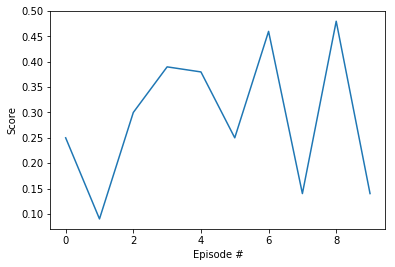

Episode 11	Average Score: 0.29Maxi 6
Episode 12	Average Score: 0.30Maxi 9
Episode 13	Average Score: 0.29Maxi 2
Episode 14	Average Score: 0.28Maxi 1
Episode 15	Average Score: 0.27Maxi 2
Episode 16	Average Score: 0.26Maxi 1
Episode 17	Average Score: 0.27Maxi 9
Episode 18	Average Score: 0.28Maxi 10
Episode 19	Average Score: 0.30Maxi 14
Episode 20	Average Score: 0.29Maxi 4
Episode 20	Average Score: 0.29


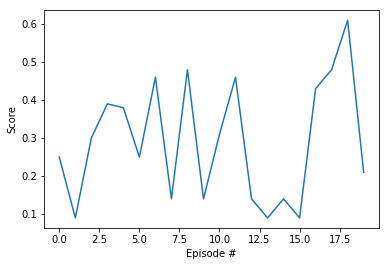

Episode 21	Average Score: 0.30Maxi 10
Episode 22	Average Score: 0.30Maxi 7
Episode 23	Average Score: 0.30Maxi 6
Episode 24	Average Score: 0.30Maxi 5
Episode 25	Average Score: 0.29Maxi 1
Episode 26	Average Score: 0.29Maxi 7
Episode 27	Average Score: 0.30Maxi 8
Episode 28	Average Score: 0.30Maxi 7
Episode 29	Average Score: 0.29Maxi 1
Episode 30	Average Score: 0.29Maxi 2
Episode 30	Average Score: 0.29


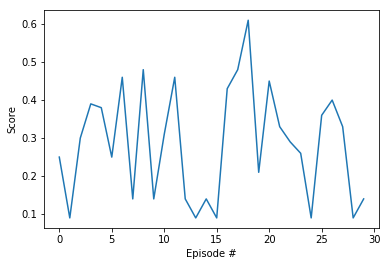

Episode 31	Average Score: 0.29Maxi 6
Episode 32	Average Score: 0.29Maxi 9
Episode 33	Average Score: 0.29Maxi 4
Episode 34	Average Score: 0.29Maxi 4
Episode 35	Average Score: 0.28Maxi 3
Episode 36	Average Score: 0.29Maxi 11
Episode 37	Average Score: 0.29Maxi 10
Episode 38	Average Score: 0.30Maxi 12
Episode 39	Average Score: 0.31Maxi 15
Episode 40	Average Score: 0.31Maxi 1
Episode 40	Average Score: 0.31


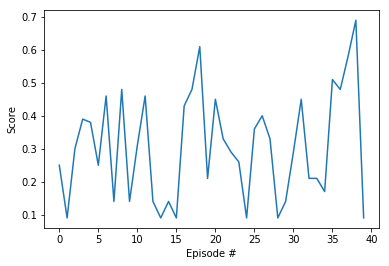

Episode 41	Average Score: 0.31Maxi 5
Episode 42	Average Score: 0.30Maxi 1
Episode 43	Average Score: 0.32Maxi 27
Episode 44	Average Score: 0.32Maxi 3
Episode 45	Average Score: 0.32Maxi 8
Episode 46	Average Score: 0.31Maxi 2
Episode 47	Average Score: 0.31Maxi 1
Episode 48	Average Score: 0.31Maxi 6
Episode 49	Average Score: 0.31Maxi 3
Episode 50	Average Score: 0.32Maxi 16
Episode 50	Average Score: 0.32


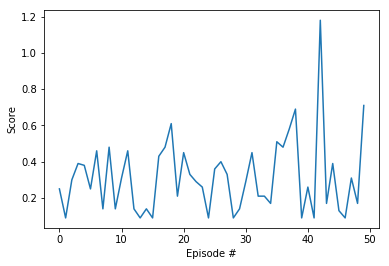

Episode 51	Average Score: 0.31Maxi 5
Episode 52	Average Score: 0.32Maxi 12
Episode 53	Average Score: 0.33Maxi 24
Episode 54	Average Score: 0.33Maxi 1
Episode 55	Average Score: 0.32Maxi 2
Episode 56	Average Score: 0.32Maxi 1
Episode 57	Average Score: 0.32Maxi 1
Episode 58	Average Score: 0.32Maxi 8
Episode 59	Average Score: 0.31Maxi 1
Episode 60	Average Score: 0.32Maxi 11
Episode 60	Average Score: 0.32


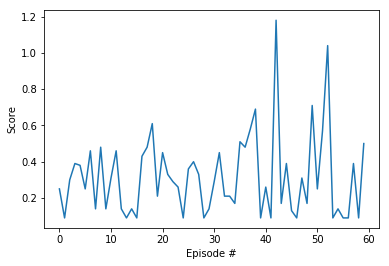

Episode 61	Average Score: 0.33Maxi 27
Episode 62	Average Score: 0.33Maxi 3
Episode 63	Average Score: 0.33Maxi 1
Episode 64	Average Score: 0.33Maxi 5
Episode 65	Average Score: 0.32Maxi 5
Episode 66	Average Score: 0.32Maxi 2
Episode 67	Average Score: 0.32Maxi 5
Episode 68	Average Score: 0.33Maxi 20
Episode 69	Average Score: 0.33Maxi 2
Episode 70	Average Score: 0.32Maxi 1
Episode 70	Average Score: 0.32


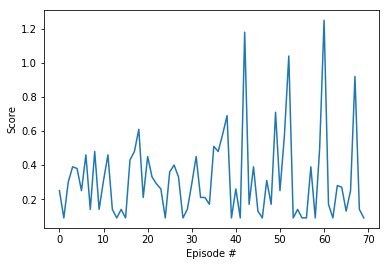

Episode 71	Average Score: 0.32Maxi 6
Episode 72	Average Score: 0.32Maxi 5
Episode 73	Average Score: 0.32Maxi 10
Episode 74	Average Score: 0.33Maxi 11
Episode 75	Average Score: 0.32Maxi 1
Episode 76	Average Score: 0.32Maxi 5
Episode 77	Average Score: 0.32Maxi 1
Episode 78	Average Score: 0.32Maxi 7
Episode 79	Average Score: 0.32Maxi 1
Episode 80	Average Score: 0.32Maxi 10
Episode 80	Average Score: 0.32


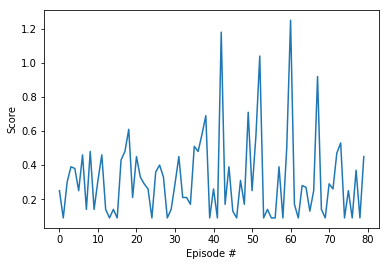

Episode 81	Average Score: 0.32Maxi 3
Episode 82	Average Score: 0.32Maxi 7
Episode 83	Average Score: 0.31Maxi 1
Episode 84	Average Score: 0.31Maxi 7
Episode 85	Average Score: 0.31Maxi 1
Episode 86	Average Score: 0.33Maxi 40
Episode 87	Average Score: 0.33Maxi 17
Episode 88	Average Score: 0.34Maxi 14
Episode 89	Average Score: 0.34Maxi 2
Episode 90	Average Score: 0.33Maxi 4
Episode 90	Average Score: 0.33


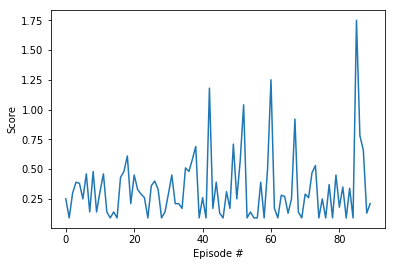

Episode 91	Average Score: 0.33Maxi 6
Episode 92	Average Score: 0.33Maxi 1
Episode 93	Average Score: 0.33Maxi 3
Episode 94	Average Score: 0.33Maxi 2
Episode 95	Average Score: 0.33Maxi 1
Episode 96	Average Score: 0.32Maxi 1
Episode 97	Average Score: 0.32Maxi 3
Episode 98	Average Score: 0.32Maxi 6
Episode 99	Average Score: 0.32Maxi 3
Episode 100	Average Score: 0.32Maxi 4
Episode 100	Average Score: 0.32


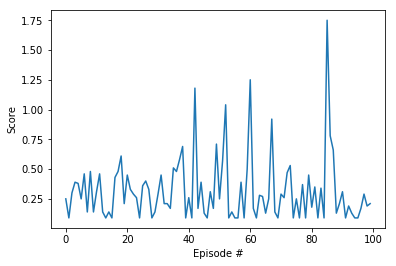

Episode 100	Average Score: 0.32


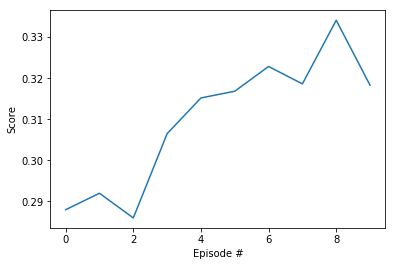

Episode 101	Average Score: 0.32Maxi 5
Episode 102	Average Score: 0.32Maxi 4
Episode 103	Average Score: 0.32Maxi 6
Episode 104	Average Score: 0.32Maxi 6
Episode 105	Average Score: 0.32Maxi 1
Episode 106	Average Score: 0.31Maxi 1
Episode 107	Average Score: 0.31Maxi 1
Episode 108	Average Score: 0.31Maxi 1
Episode 109	Average Score: 0.31Maxi 3
Episode 110	Average Score: 0.31Maxi 3
Episode 110	Average Score: 0.31


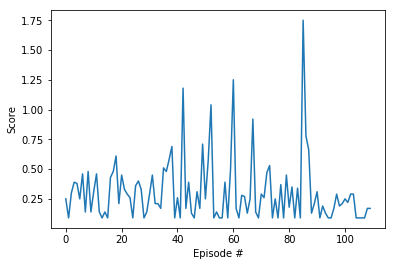

Episode 111	Average Score: 0.30Maxi 1
Episode 112	Average Score: 0.30Maxi 3
Episode 113	Average Score: 0.30Maxi 9
Episode 114	Average Score: 0.31Maxi 2
Episode 115	Average Score: 0.30Maxi 1
Episode 116	Average Score: 0.31Maxi 20
Episode 117	Average Score: 0.31Maxi 1
Episode 118	Average Score: 0.31Maxi 7
Episode 119	Average Score: 0.30Maxi 6
Episode 120	Average Score: 0.31Maxi 6
Episode 120	Average Score: 0.31


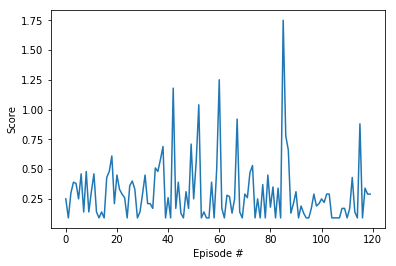

Episode 121	Average Score: 0.31Maxi 26
Episode 122	Average Score: 0.31Maxi 8
Episode 123	Average Score: 0.31Maxi 2
Episode 124	Average Score: 0.31Maxi 2
Episode 125	Average Score: 0.31Maxi 3
Episode 126	Average Score: 0.31Maxi 0
Episode 127	Average Score: 0.31Maxi 3
Episode 128	Average Score: 0.30Maxi 1
Episode 129	Average Score: 0.30Maxi 1
Episode 130	Average Score: 0.30Maxi 4
Episode 130	Average Score: 0.30


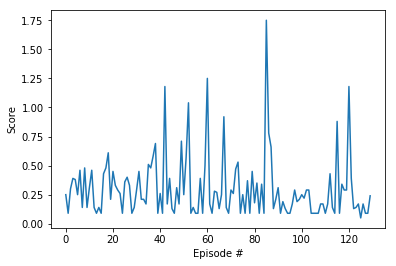

Episode 131	Average Score: 0.31Maxi 8
Episode 132	Average Score: 0.30Maxi 1
Episode 133	Average Score: 0.32Maxi 36
Episode 134	Average Score: 0.32Maxi 8
Episode 135	Average Score: 0.32Maxi 2
Episode 136	Average Score: 0.31Maxi 5
Episode 137	Average Score: 0.31Maxi 1
Episode 138	Average Score: 0.31Maxi 12
Episode 139	Average Score: 0.31Maxi 4
Episode 140	Average Score: 0.31Maxi 21
Episode 140	Average Score: 0.31


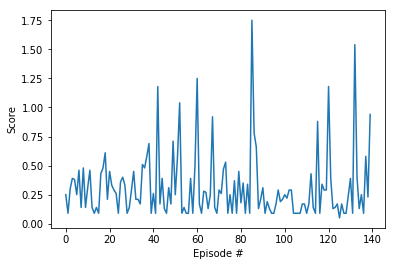

Episode 141	Average Score: 0.31Maxi 6
Episode 142	Average Score: 0.32Maxi 9
Episode 143	Average Score: 0.31Maxi 7
Episode 144	Average Score: 0.32Maxi 17
Episode 145	Average Score: 0.32Maxi 7
Episode 146	Average Score: 0.32Maxi 4
Episode 147	Average Score: 0.32Maxi 1
Episode 148	Average Score: 0.32Maxi 17
Episode 149	Average Score: 0.32Maxi 1
Episode 150	Average Score: 0.31Maxi 1
Episode 150	Average Score: 0.31


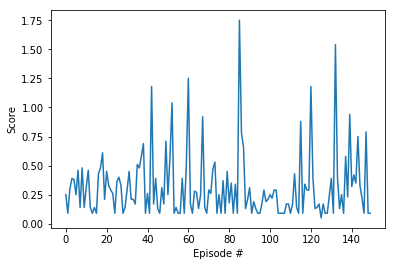

Episode 151	Average Score: 0.31Maxi 4
Episode 152	Average Score: 0.31Maxi 2
Episode 153	Average Score: 0.30Maxi 1
Episode 154	Average Score: 0.30Maxi 9
Episode 155	Average Score: 0.30Maxi 7
Episode 156	Average Score: 0.31Maxi 7
Episode 157	Average Score: 0.31Maxi 6
Episode 158	Average Score: 0.31Maxi 2
Episode 159	Average Score: 0.31Maxi 5
Episode 160	Average Score: 0.31Maxi 2
Episode 160	Average Score: 0.31


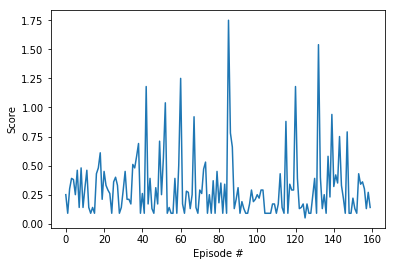

Episode 161	Average Score: 0.30Maxi 14
Episode 162	Average Score: 0.30Maxi 13
Episode 163	Average Score: 0.31Maxi 14
Episode 164	Average Score: 0.31Maxi 5
Episode 165	Average Score: 0.31Maxi 2
Episode 166	Average Score: 0.31Maxi 7
Episode 167	Average Score: 0.32Maxi 18
Episode 168	Average Score: 0.32Maxi 29
Episode 169	Average Score: 0.32Maxi 9
Episode 170	Average Score: 0.33Maxi 8
Episode 170	Average Score: 0.33


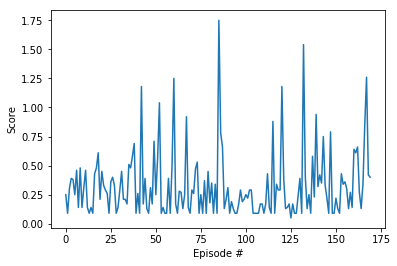

Episode 171	Average Score: 0.32Maxi 3
Episode 172	Average Score: 0.32Maxi 2
Episode 173	Average Score: 0.32Maxi 2
Episode 174	Average Score: 0.32Maxi 22
Episode 175	Average Score: 0.33Maxi 6
Episode 176	Average Score: 0.32Maxi 1
Episode 177	Average Score: 0.33Maxi 10
Episode 178	Average Score: 0.33Maxi 2
Episode 179	Average Score: 0.33Maxi 2
Episode 180	Average Score: 0.32Maxi 5
Episode 180	Average Score: 0.32


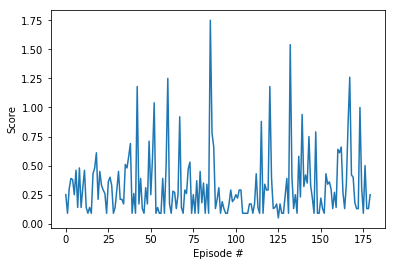

Episode 181	Average Score: 0.32Maxi 1
Episode 182	Average Score: 0.32Maxi 1
Episode 183	Average Score: 0.32Maxi 7
Episode 184	Average Score: 0.32Maxi 1
Episode 185	Average Score: 0.32Maxi 5
Episode 186	Average Score: 0.31Maxi 2
Episode 187	Average Score: 0.30Maxi 1
Episode 188	Average Score: 0.30Maxi 13
Episode 189	Average Score: 0.30Maxi 1
Episode 190	Average Score: 0.31Maxi 37
Episode 190	Average Score: 0.31


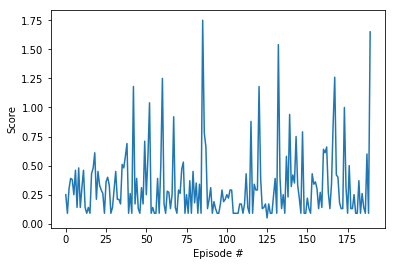

Episode 191	Average Score: 0.31Maxi 5
Episode 192	Average Score: 0.31Maxi 1
Episode 193	Average Score: 0.31Maxi 1
Episode 194	Average Score: 0.31Maxi 1
Episode 195	Average Score: 0.31Maxi 3
Episode 196	Average Score: 0.33Maxi 32
Episode 197	Average Score: 0.33Maxi 21
Episode 198	Average Score: 0.33Maxi 5
Episode 199	Average Score: 0.34Maxi 8
Episode 200	Average Score: 0.33Maxi 1
Episode 200	Average Score: 0.33


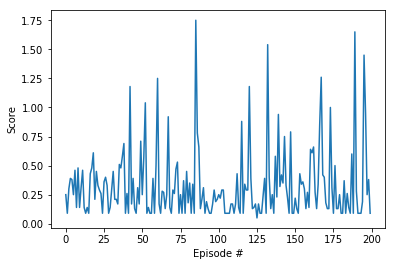

Episode 200	Average Score: 0.33


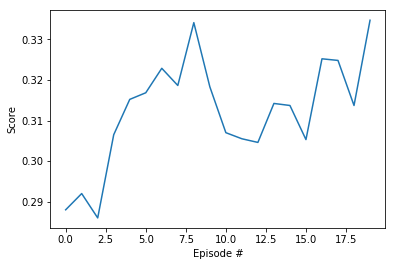

Episode 201	Average Score: 0.33Maxi 1
Episode 202	Average Score: 0.33Maxi 3
Episode 203	Average Score: 0.33Maxi 9
Episode 204	Average Score: 0.33Maxi 1
Episode 205	Average Score: 0.34Maxi 28
Episode 206	Average Score: 0.35Maxi 7
Episode 207	Average Score: 0.35Maxi 9
Episode 208	Average Score: 0.35Maxi 7
Episode 209	Average Score: 0.35Maxi 2
Episode 210	Average Score: 0.35Maxi 1
Episode 210	Average Score: 0.35


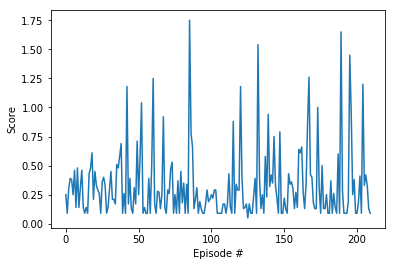

Episode 211	Average Score: 0.35Maxi 7
Episode 212	Average Score: 0.35Maxi 2
Episode 213	Average Score: 0.35Maxi 4
Episode 214	Average Score: 0.35Maxi 2
Episode 215	Average Score: 0.36Maxi 30
Episode 216	Average Score: 0.35Maxi 1
Episode 217	Average Score: 0.36Maxi 4
Episode 218	Average Score: 0.35Maxi 3
Episode 219	Average Score: 0.36Maxi 11
Episode 220	Average Score: 0.36Maxi 23
Episode 220	Average Score: 0.36


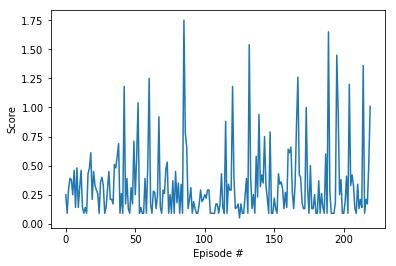

Episode 221	Average Score: 0.36Maxi 13
Episode 222	Average Score: 0.35Maxi 1
Episode 223	Average Score: 0.36Maxi 9
Episode 224	Average Score: 0.36Maxi 1
Episode 225	Average Score: 0.37Maxi 24
Episode 226	Average Score: 0.37Maxi 1
Episode 227	Average Score: 0.37Maxi 2
Episode 228	Average Score: 0.37Maxi 10
Episode 229	Average Score: 0.37Maxi 3
Episode 230	Average Score: 0.37Maxi 4
Episode 230	Average Score: 0.37


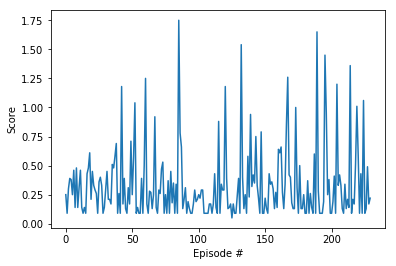

Episode 231	Average Score: 0.37Maxi 8
Episode 232	Average Score: 0.37Maxi 1
Episode 233	Average Score: 0.36Maxi 9
Episode 234	Average Score: 0.36Maxi 8
Episode 235	Average Score: 0.36Maxi 10
Episode 236	Average Score: 0.36Maxi 8
Episode 237	Average Score: 0.37Maxi 20
Episode 238	Average Score: 0.37Maxi 4
Episode 239	Average Score: 0.37Maxi 1
Episode 240	Average Score: 0.36Maxi 6
Episode 240	Average Score: 0.36


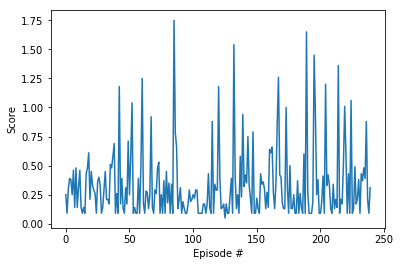

Episode 241	Average Score: 0.36Maxi 1
Episode 242	Average Score: 0.36Maxi 1
Episode 243	Average Score: 0.35Maxi 1
Episode 244	Average Score: 0.35Maxi 6
Episode 245	Average Score: 0.35Maxi 1
Episode 246	Average Score: 0.35Maxi 12
Episode 247	Average Score: 0.35Maxi 4
Episode 248	Average Score: 0.35Maxi 10
Episode 249	Average Score: 0.35Maxi 1
Episode 250	Average Score: 0.35Maxi 2
Episode 250	Average Score: 0.35


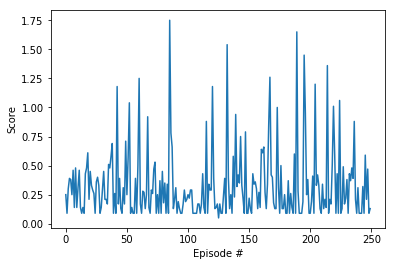

Episode 251	Average Score: 0.35Maxi 2
Episode 252	Average Score: 0.35Maxi 12
Episode 253	Average Score: 0.35Maxi 3
Episode 254	Average Score: 0.35Maxi 5
Episode 255	Average Score: 0.35Maxi 6
Episode 256	Average Score: 0.35Maxi 1
Episode 257	Average Score: 0.35Maxi 3
Episode 258	Average Score: 0.35Maxi 8
Episode 259	Average Score: 0.36Maxi 24
Episode 260	Average Score: 0.37Maxi 26
Episode 260	Average Score: 0.37


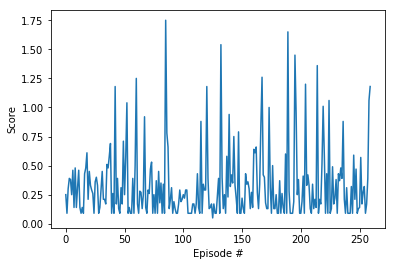

Episode 261	Average Score: 0.36Maxi 3
Episode 262	Average Score: 0.36Maxi 5
Episode 263	Average Score: 0.36Maxi 20
Episode 264	Average Score: 0.36Maxi 3
Episode 265	Average Score: 0.36Maxi 9
Episode 266	Average Score: 0.37Maxi 9
Episode 267	Average Score: 0.36Maxi 1
Episode 268	Average Score: 0.35Maxi 4
Episode 269	Average Score: 0.34Maxi 2
Episode 270	Average Score: 0.34Maxi 10
Episode 270	Average Score: 0.34


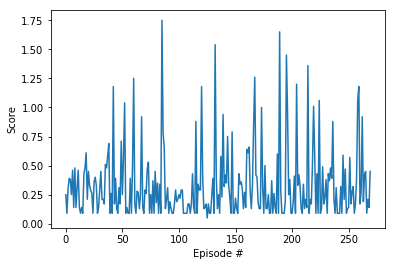

Episode 271	Average Score: 0.35Maxi 17
Episode 272	Average Score: 0.35Maxi 1
Episode 273	Average Score: 0.35Maxi 6
Episode 274	Average Score: 0.35Maxi 15
Episode 275	Average Score: 0.35Maxi 3
Episode 276	Average Score: 0.35Maxi 7
Episode 277	Average Score: 0.35Maxi 5
Episode 278	Average Score: 0.35Maxi 18
Episode 279	Average Score: 0.36Maxi 15
Episode 280	Average Score: 0.36Maxi 1
Episode 280	Average Score: 0.36


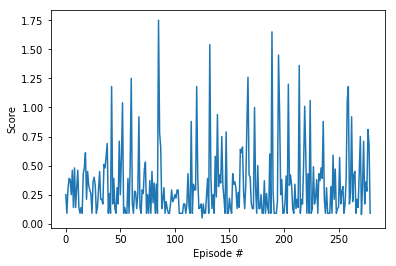

Episode 281	Average Score: 0.36Maxi 4
Episode 282	Average Score: 0.36Maxi 3
Episode 283	Average Score: 0.36Maxi 1
Episode 284	Average Score: 0.36Maxi 10
Episode 285	Average Score: 0.36Maxi 7
Episode 286	Average Score: 0.36Maxi 3
Episode 287	Average Score: 0.36Maxi 4
Episode 288	Average Score: 0.36Maxi 6
Episode 289	Average Score: 0.36Maxi 1
Episode 290	Average Score: 0.35Maxi 2
Episode 290	Average Score: 0.35


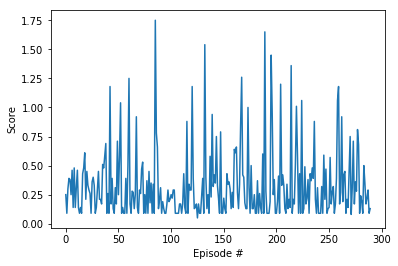

Episode 291	Average Score: 0.35Maxi 12
Episode 292	Average Score: 0.35Maxi 9
Episode 293	Average Score: 0.35Maxi 1
Episode 294	Average Score: 0.35Maxi 2
Episode 295	Average Score: 0.35Maxi 2
Episode 296	Average Score: 0.34Maxi 1
Episode 297	Average Score: 0.33Maxi 10
Episode 298	Average Score: 0.33Maxi 1
Episode 299	Average Score: 0.33Maxi 3
Episode 300	Average Score: 0.33Maxi 3
Episode 300	Average Score: 0.33


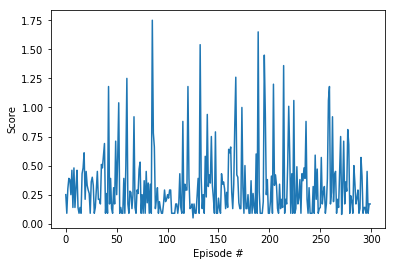

Episode 300	Average Score: 0.33


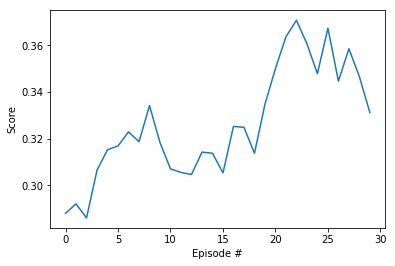

Episode 301	Average Score: 0.33Maxi 2
Episode 302	Average Score: 0.33Maxi 7
Episode 303	Average Score: 0.33Maxi 3
Episode 304	Average Score: 0.33Maxi 1
Episode 305	Average Score: 0.32Maxi 4
Episode 306	Average Score: 0.32Maxi 4
Episode 307	Average Score: 0.32Maxi 2
Episode 308	Average Score: 0.31Maxi 1
Episode 309	Average Score: 0.32Maxi 3
Episode 310	Average Score: 0.32Maxi 1
Episode 310	Average Score: 0.32


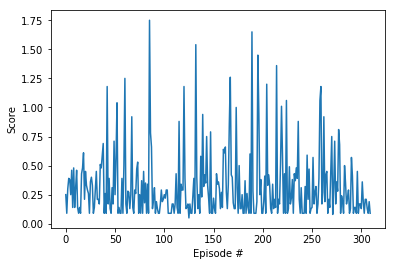

Episode 311	Average Score: 0.32Maxi 22
Episode 312	Average Score: 0.32Maxi 4
Episode 313	Average Score: 0.32Maxi 1
Episode 314	Average Score: 0.32Maxi 1
Episode 315	Average Score: 0.31Maxi 8
Episode 316	Average Score: 0.31Maxi 9
Episode 317	Average Score: 0.31Maxi 1
Episode 318	Average Score: 0.31Maxi 7
Episode 319	Average Score: 0.32Maxi 13
Episode 320	Average Score: 0.31Maxi 3
Episode 320	Average Score: 0.31


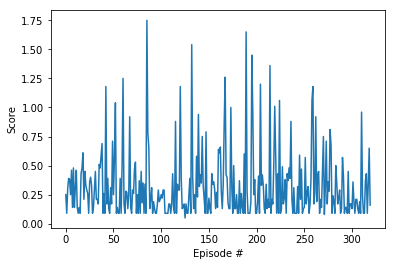

Episode 321	Average Score: 0.30Maxi 1
Episode 322	Average Score: 0.31Maxi 10
Episode 323	Average Score: 0.30Maxi 1
Episode 324	Average Score: 0.30Maxi 4
Episode 325	Average Score: 0.29Maxi 1
Episode 326	Average Score: 0.30Maxi 3
Episode 327	Average Score: 0.30Maxi 3
Episode 328	Average Score: 0.29Maxi 3
Episode 329	Average Score: 0.30Maxi 18
Episode 330	Average Score: 0.30Maxi 5
Episode 330	Average Score: 0.30


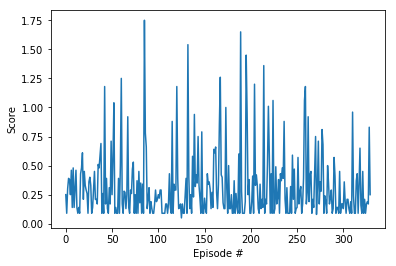

Episode 331	Average Score: 0.30Maxi 2
Episode 332	Average Score: 0.30Maxi 9
Episode 333	Average Score: 0.30Maxi 3
Episode 334	Average Score: 0.30Maxi 6
Episode 335	Average Score: 0.30Maxi 11
Episode 336	Average Score: 0.29Maxi 1
Episode 337	Average Score: 0.29Maxi 6
Episode 338	Average Score: 0.29Maxi 10
Episode 339	Average Score: 0.29Maxi 2
Episode 340	Average Score: 0.29Maxi 7
Episode 340	Average Score: 0.29


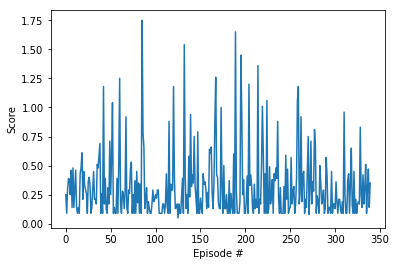

Episode 341	Average Score: 0.29Maxi 4
Episode 342	Average Score: 0.30Maxi 15
Episode 343	Average Score: 0.30Maxi 3
Episode 344	Average Score: 0.30Maxi 1
Episode 345	Average Score: 0.30Maxi 3
Episode 346	Average Score: 0.29Maxi 1
Episode 347	Average Score: 0.30Maxi 14
Episode 348	Average Score: 0.30Maxi 5
Episode 349	Average Score: 0.30Maxi 2
Episode 350	Average Score: 0.30Maxi 5
Episode 350	Average Score: 0.30


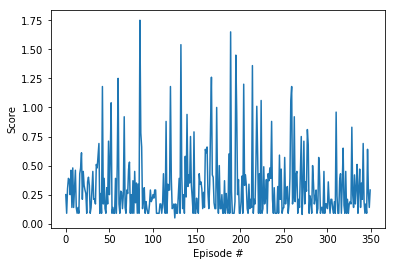

Episode 351	Average Score: 0.30Maxi 8
Episode 352	Average Score: 0.30Maxi 3
Episode 353	Average Score: 0.30Maxi 15
Episode 354	Average Score: 0.30Maxi 2
Episode 355	Average Score: 0.30Maxi 3
Episode 356	Average Score: 0.30Maxi 1
Episode 357	Average Score: 0.30Maxi 5
Episode 358	Average Score: 0.30Maxi 4
Episode 359	Average Score: 0.29Maxi 2
Episode 360	Average Score: 0.28Maxi 10
Episode 360	Average Score: 0.28


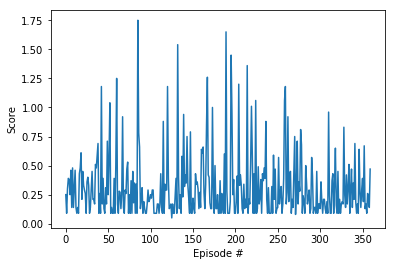

Episode 361	Average Score: 0.28Maxi 3
Episode 362	Average Score: 0.28Maxi 1
Episode 363	Average Score: 0.27Maxi 2
Episode 364	Average Score: 0.27Maxi 8
Episode 365	Average Score: 0.28Maxi 28
Episode 366	Average Score: 0.28Maxi 0
Episode 367	Average Score: 0.28Maxi 6
Episode 368	Average Score: 0.28Maxi 3
Episode 369	Average Score: 0.28Maxi 2
Episode 370	Average Score: 0.28Maxi 5
Episode 370	Average Score: 0.28


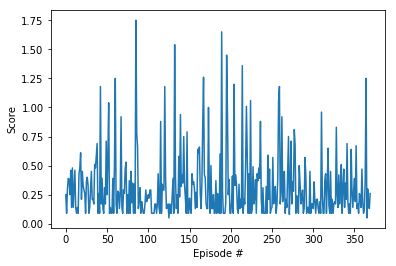

Episode 371	Average Score: 0.27Maxi 8
Episode 372	Average Score: 0.28Maxi 6
Episode 373	Average Score: 0.28Maxi 8
Episode 374	Average Score: 0.27Maxi 4
Episode 375	Average Score: 0.27Maxi 8
Episode 376	Average Score: 0.27Maxi 5
Episode 377	Average Score: 0.27Maxi 4
Episode 378	Average Score: 0.27Maxi 1
Episode 379	Average Score: 0.26Maxi 10
Episode 380	Average Score: 0.26Maxi 1
Episode 380	Average Score: 0.26


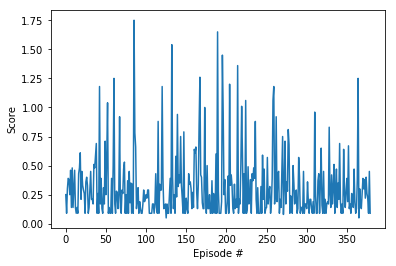

Episode 381	Average Score: 0.26Maxi 2
Episode 382	Average Score: 0.27Maxi 12
Episode 383	Average Score: 0.27Maxi 18
Episode 384	Average Score: 0.27Maxi 1
Episode 385	Average Score: 0.27Maxi 4
Episode 386	Average Score: 0.27Maxi 1
Episode 387	Average Score: 0.27Maxi 5
Episode 388	Average Score: 0.27Maxi 7
Episode 389	Average Score: 0.27Maxi 1
Episode 390	Average Score: 0.27Maxi 8
Episode 390	Average Score: 0.27


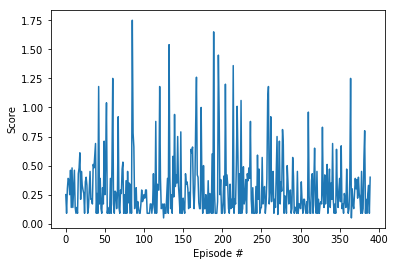

Episode 391	Average Score: 0.27Maxi 1
Episode 392	Average Score: 0.27Maxi 8
Episode 393	Average Score: 0.27Maxi 5
Episode 394	Average Score: 0.28Maxi 33
Episode 395	Average Score: 0.28Maxi 12
Episode 396	Average Score: 0.29Maxi 15
Episode 397	Average Score: 0.29Maxi 13
Episode 398	Average Score: 0.30Maxi 10
Episode 399	Average Score: 0.30Maxi 2
Episode 400	Average Score: 0.30Maxi 5
Episode 400	Average Score: 0.30


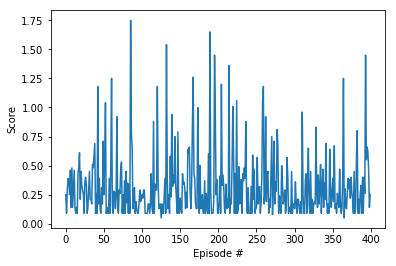

Episode 400	Average Score: 0.30


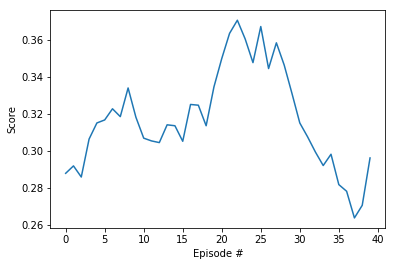

Episode 401	Average Score: 0.30Maxi 1
Episode 402	Average Score: 0.29Maxi 5
Episode 403	Average Score: 0.30Maxi 6
Episode 404	Average Score: 0.30Maxi 6
Episode 405	Average Score: 0.30Maxi 9
Episode 406	Average Score: 0.30Maxi 1
Episode 407	Average Score: 0.30Maxi 2
Episode 408	Average Score: 0.31Maxi 13
Episode 409	Average Score: 0.30Maxi 3
Episode 410	Average Score: 0.31Maxi 2
Episode 410	Average Score: 0.31


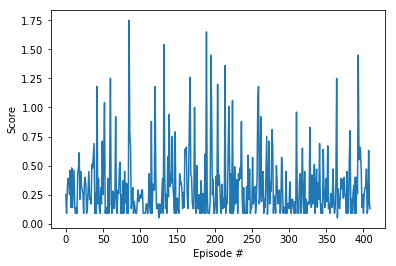

Episode 411	Average Score: 0.30Maxi 15
Episode 412	Average Score: 0.31Maxi 31
Episode 413	Average Score: 0.31Maxi 2
Episode 414	Average Score: 0.32Maxi 4
Episode 415	Average Score: 0.32Maxi 8
Episode 416	Average Score: 0.32Maxi 8
Episode 417	Average Score: 0.32Maxi 20
Episode 418	Average Score: 0.32Maxi 1
Episode 419	Average Score: 0.32Maxi 3
Episode 420	Average Score: 0.32Maxi 2
Episode 420	Average Score: 0.32


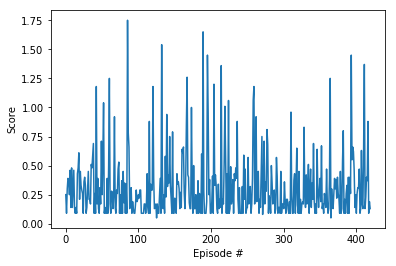

Episode 421	Average Score: 0.32Maxi 14
Episode 422	Average Score: 0.32Maxi 9
Episode 423	Average Score: 0.32Maxi 3
Episode 424	Average Score: 0.32Maxi 2
Episode 425	Average Score: 0.32Maxi 2
Episode 426	Average Score: 0.32Maxi 5
Episode 427	Average Score: 0.32Maxi 2
Episode 428	Average Score: 0.33Maxi 12
Episode 429	Average Score: 0.32Maxi 5
Episode 430	Average Score: 0.32Maxi 4
Episode 430	Average Score: 0.32


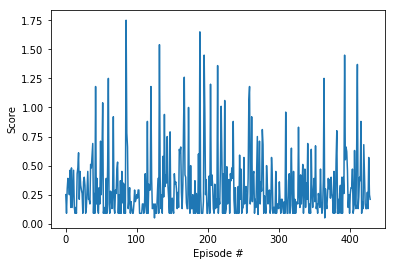

Episode 431	Average Score: 0.32Maxi 2
Episode 432	Average Score: 0.32Maxi 5
Episode 433	Average Score: 0.32Maxi 5
Episode 434	Average Score: 0.32Maxi 2
Episode 435	Average Score: 0.31Maxi 5
Episode 436	Average Score: 0.32Maxi 2
Episode 437	Average Score: 0.31Maxi 4
Episode 438	Average Score: 0.31Maxi 10
Episode 439	Average Score: 0.32Maxi 8
Episode 440	Average Score: 0.32Maxi 20
Episode 440	Average Score: 0.32


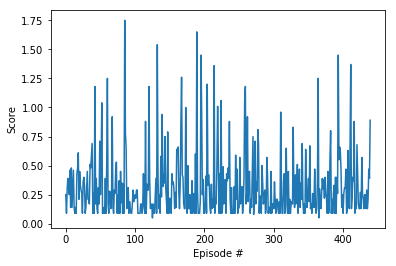

Episode 441	Average Score: 0.33Maxi 12
Episode 442	Average Score: 0.32Maxi 2
Episode 443	Average Score: 0.32Maxi 4
Episode 444	Average Score: 0.32Maxi 7
Episode 445	Average Score: 0.32Maxi 5
Episode 446	Average Score: 0.33Maxi 21
Episode 447	Average Score: 0.33Maxi 4
Episode 448	Average Score: 0.33Maxi 5
Episode 449	Average Score: 0.33Maxi 7
Episode 450	Average Score: 0.33Maxi 7
Episode 450	Average Score: 0.33


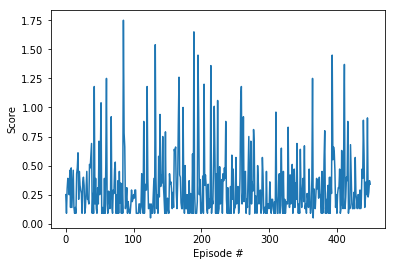

Episode 451	Average Score: 0.33Maxi 6
Episode 452	Average Score: 0.34Maxi 22
Episode 453	Average Score: 0.33Maxi 5
Episode 454	Average Score: 0.33Maxi 1
Episode 455	Average Score: 0.34Maxi 10
Episode 456	Average Score: 0.34Maxi 4
Episode 457	Average Score: 0.34Maxi 10
Episode 458	Average Score: 0.34Maxi 1
Episode 459	Average Score: 0.34Maxi 1
Episode 460	Average Score: 0.34Maxi 2
Episode 460	Average Score: 0.34


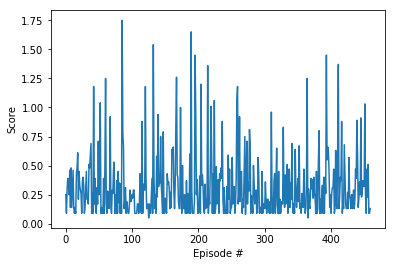

Episode 461	Average Score: 0.34Maxi 6
Episode 462	Average Score: 0.34Maxi 7
Episode 463	Average Score: 0.34Maxi 1
Episode 464	Average Score: 0.34Maxi 4
Episode 465	Average Score: 0.33Maxi 3
Episode 466	Average Score: 0.33Maxi 2
Episode 467	Average Score: 0.33Maxi 3
Episode 468	Average Score: 0.33Maxi 1
Episode 469	Average Score: 0.33Maxi 4
Episode 470	Average Score: 0.34Maxi 30
Episode 470	Average Score: 0.34


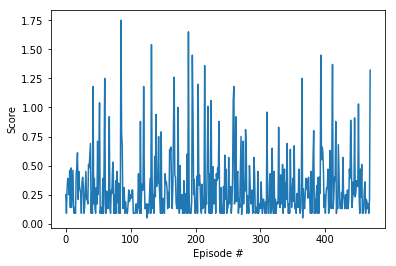

Episode 471	Average Score: 0.34Maxi 24
Episode 472	Average Score: 0.34Maxi 6
Episode 473	Average Score: 0.34Maxi 3
Episode 474	Average Score: 0.34Maxi 7
Episode 475	Average Score: 0.34Maxi 6
Episode 476	Average Score: 0.34Maxi 9
Episode 477	Average Score: 0.35Maxi 5
Episode 478	Average Score: 0.35Maxi 6
Episode 479	Average Score: 0.35Maxi 8
Episode 480	Average Score: 0.35Maxi 2
Episode 480	Average Score: 0.35


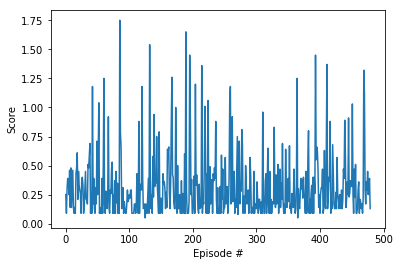

Episode 481	Average Score: 0.35Maxi 3
Episode 482	Average Score: 0.35Maxi 7
Episode 483	Average Score: 0.34Maxi 3
Episode 484	Average Score: 0.34Maxi 3
Episode 485	Average Score: 0.34Maxi 3
Episode 486	Average Score: 0.34Maxi 6
Episode 487	Average Score: 0.34Maxi 3
Episode 488	Average Score: 0.34Maxi 3
Episode 489	Average Score: 0.34Maxi 12
Episode 490	Average Score: 0.34Maxi 3
Episode 490	Average Score: 0.34


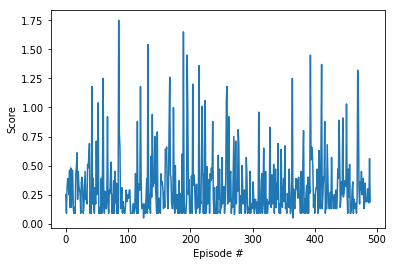

Episode 491	Average Score: 0.34Maxi 2
Episode 492	Average Score: 0.34Maxi 1
Episode 493	Average Score: 0.34Maxi 2
Episode 494	Average Score: 0.33Maxi 11
Episode 495	Average Score: 0.33Maxi 3
Episode 496	Average Score: 0.32Maxi 11
Episode 497	Average Score: 0.33Maxi 19
Episode 498	Average Score: 0.33Maxi 6
Episode 499	Average Score: 0.33Maxi 3
Episode 500	Average Score: 0.33Maxi 8
Episode 500	Average Score: 0.33


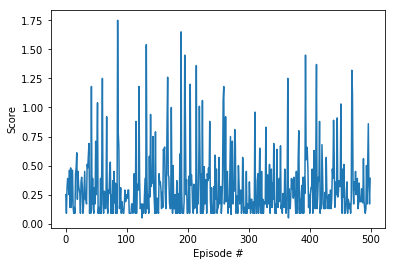

Episode 500	Average Score: 0.33


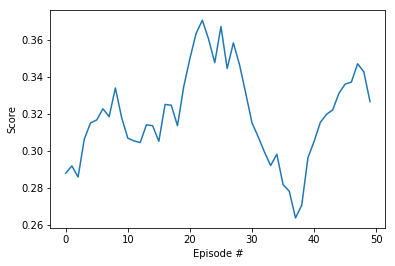

Episode 501	Average Score: 0.33Maxi 5
Episode 502	Average Score: 0.33Maxi 5
Episode 503	Average Score: 0.33Maxi 9
Episode 504	Average Score: 0.33Maxi 1
Episode 505	Average Score: 0.32Maxi 1
Episode 506	Average Score: 0.33Maxi 4
Episode 507	Average Score: 0.33Maxi 8
Episode 508	Average Score: 0.32Maxi 6
Episode 509	Average Score: 0.32Maxi 1
Episode 510	Average Score: 0.32Maxi 1
Episode 510	Average Score: 0.32


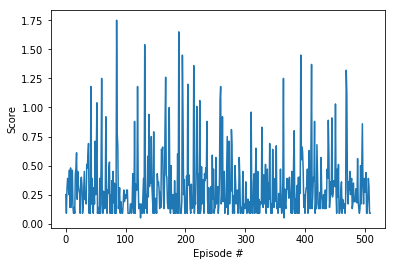

Episode 511	Average Score: 0.33Maxi 29
Episode 512	Average Score: 0.32Maxi 8
Episode 513	Average Score: 0.32Maxi 7
Episode 514	Average Score: 0.32Maxi 1
Episode 515	Average Score: 0.32Maxi 2
Episode 516	Average Score: 0.32Maxi 4
Episode 517	Average Score: 0.31Maxi 2
Episode 518	Average Score: 0.31Maxi 2
Episode 519	Average Score: 0.31Maxi 10
Episode 520	Average Score: 0.32Maxi 9
Episode 520	Average Score: 0.32


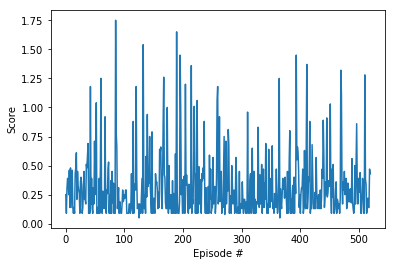

Episode 521	Average Score: 0.32Maxi 17
Episode 522	Average Score: 0.31Maxi 3
Episode 523	Average Score: 0.31Maxi 3
Episode 524	Average Score: 0.32Maxi 20
Episode 525	Average Score: 0.32Maxi 1
Episode 526	Average Score: 0.32Maxi 13
Episode 527	Average Score: 0.33Maxi 14
Episode 528	Average Score: 0.33Maxi 4
Episode 529	Average Score: 0.33Maxi 7
Episode 530	Average Score: 0.33Maxi 23
Episode 530	Average Score: 0.33


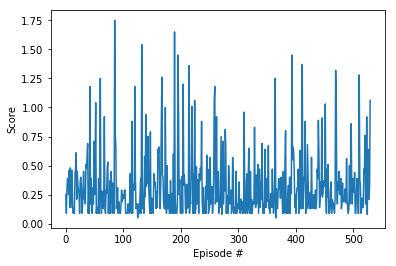

Episode 531	Average Score: 0.34Maxi 9
Episode 532	Average Score: 0.34Maxi 1
Episode 533	Average Score: 0.34Maxi 2
Episode 534	Average Score: 0.33Maxi 1
Episode 535	Average Score: 0.33Maxi 3
Episode 536	Average Score: 0.33Maxi 1
Episode 537	Average Score: 0.33Maxi 1
Episode 538	Average Score: 0.33Maxi 4
Episode 539	Average Score: 0.33Maxi 3
Episode 540	Average Score: 0.32Maxi 6
Episode 540	Average Score: 0.32


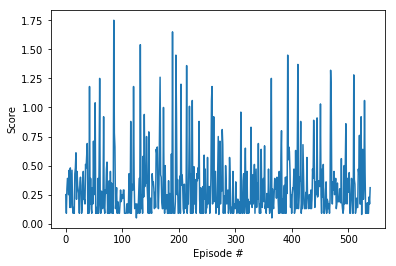

Episode 541	Average Score: 0.32Maxi 14
Episode 542	Average Score: 0.32Maxi 3
Episode 543	Average Score: 0.32Maxi 1
Episode 544	Average Score: 0.33Maxi 17
Episode 545	Average Score: 0.32Maxi 4
Episode 546	Average Score: 0.32Maxi 8
Episode 547	Average Score: 0.32Maxi 11
Episode 548	Average Score: 0.32Maxi 7
Episode 549	Average Score: 0.32Maxi 5
Episode 550	Average Score: 0.32Maxi 2
Episode 550	Average Score: 0.32


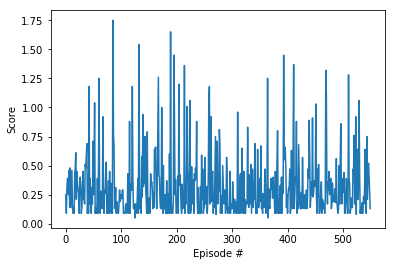

Episode 551	Average Score: 0.32Maxi 2
Episode 552	Average Score: 0.31Maxi 4
Episode 553	Average Score: 0.31Maxi 1
Episode 554	Average Score: 0.31Maxi 2
Episode 555	Average Score: 0.32Maxi 25
Episode 556	Average Score: 0.31Maxi 1
Episode 557	Average Score: 0.31Maxi 6
Episode 558	Average Score: 0.32Maxi 8
Episode 559	Average Score: 0.32Maxi 3
Episode 560	Average Score: 0.32Maxi 9
Episode 560	Average Score: 0.32


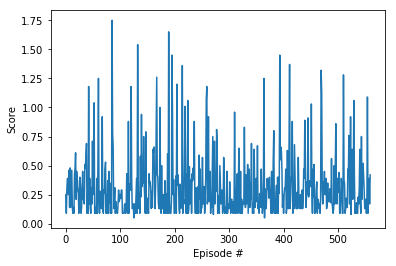

Episode 561	Average Score: 0.32Maxi 13
Episode 562	Average Score: 0.32Maxi 12
Episode 563	Average Score: 0.32Maxi 2
Episode 564	Average Score: 0.32Maxi 1
Episode 565	Average Score: 0.32Maxi 7
Episode 566	Average Score: 0.32Maxi 2
Episode 567	Average Score: 0.32Maxi 1
Episode 568	Average Score: 0.34Maxi 27
Episode 569	Average Score: 0.33Maxi 1
Episode 570	Average Score: 0.33Maxi 9
Episode 570	Average Score: 0.33


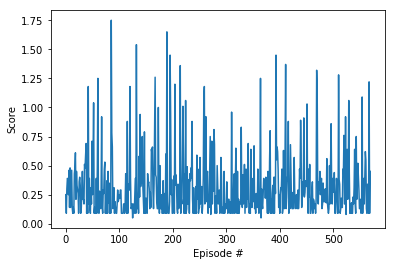

Episode 571	Average Score: 0.32Maxi 4
Episode 572	Average Score: 0.32Maxi 18
Episode 573	Average Score: 0.32Maxi 2
Episode 574	Average Score: 0.32Maxi 15
Episode 575	Average Score: 0.33Maxi 8
Episode 576	Average Score: 0.32Maxi 1
Episode 577	Average Score: 0.32Maxi 2
Episode 578	Average Score: 0.32Maxi 9
Episode 579	Average Score: 0.33Maxi 14
Episode 580	Average Score: 0.33Maxi 13
Episode 580	Average Score: 0.33


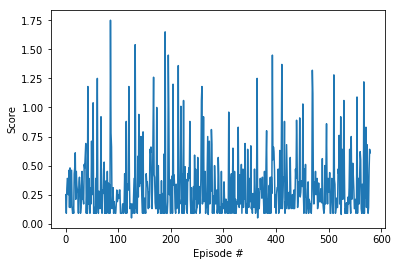

Episode 581	Average Score: 0.34Maxi 20
Episode 582	Average Score: 0.34Maxi 5
Episode 583	Average Score: 0.34Maxi 4
Episode 584	Average Score: 0.34Maxi 4
Episode 585	Average Score: 0.34Maxi 2
Episode 586	Average Score: 0.34Maxi 3
Episode 587	Average Score: 0.34Maxi 3
Episode 588	Average Score: 0.34Maxi 15
Episode 589	Average Score: 0.34Maxi 1
Episode 590	Average Score: 0.34Maxi 1
Episode 590	Average Score: 0.34


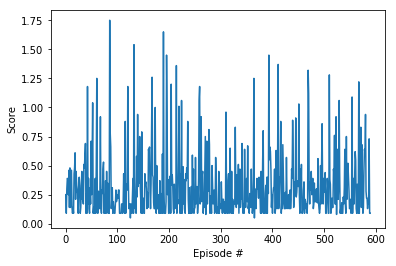

Episode 591	Average Score: 0.34Maxi 2
Episode 592	Average Score: 0.34Maxi 12
Episode 593	Average Score: 0.34Maxi 2
Episode 594	Average Score: 0.34Maxi 3
Episode 595	Average Score: 0.34Maxi 5
Episode 596	Average Score: 0.33Maxi 2
Episode 597	Average Score: 0.33Maxi 2
Episode 598	Average Score: 0.33Maxi 1
Episode 599	Average Score: 0.33Maxi 5
Episode 600	Average Score: 0.32Maxi 1
Episode 600	Average Score: 0.32


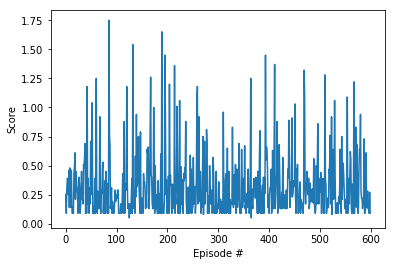

Episode 600	Average Score: 0.32


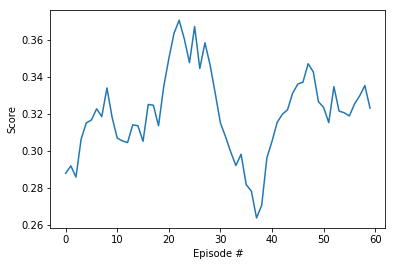

Episode 601	Average Score: 0.32Maxi 5
Episode 602	Average Score: 0.32Maxi 2
Episode 603	Average Score: 0.32Maxi 2
Episode 604	Average Score: 0.32Maxi 6
Episode 605	Average Score: 0.32Maxi 7
Episode 606	Average Score: 0.32Maxi 8
Episode 607	Average Score: 0.33Maxi 9
Episode 608	Average Score: 0.33Maxi 8
Episode 609	Average Score: 0.33Maxi 3
Episode 610	Average Score: 0.33Maxi 2
Episode 610	Average Score: 0.33


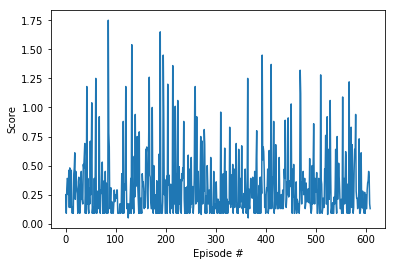

Episode 611	Average Score: 0.32Maxi 2
Episode 612	Average Score: 0.32Maxi 10
Episode 613	Average Score: 0.32Maxi 8
Episode 614	Average Score: 0.32Maxi 3
Episode 615	Average Score: 0.32Maxi 4
Episode 616	Average Score: 0.32Maxi 4
Episode 617	Average Score: 0.32Maxi 4
Episode 618	Average Score: 0.32Maxi 2
Episode 619	Average Score: 0.33Maxi 40
Episode 620	Average Score: 0.33Maxi 7
Episode 620	Average Score: 0.33


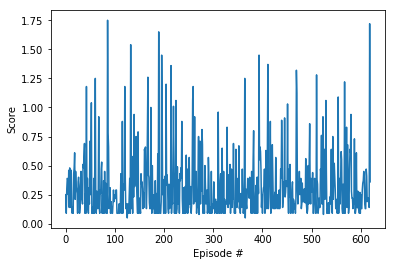

Episode 621	Average Score: 0.33Maxi 9
Episode 622	Average Score: 0.33Maxi 6
Episode 623	Average Score: 0.33Maxi 1
Episode 624	Average Score: 0.32Maxi 4
Episode 625	Average Score: 0.33Maxi 24
Episode 626	Average Score: 0.33Maxi 1
Episode 627	Average Score: 0.33Maxi 10
Episode 628	Average Score: 0.33Maxi 4
Episode 629	Average Score: 0.33Maxi 6
Episode 630	Average Score: 0.32Maxi 6
Episode 630	Average Score: 0.32


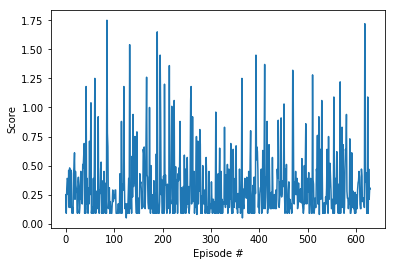

Episode 631	Average Score: 0.32Maxi 4
Episode 632	Average Score: 0.32Maxi 2
Episode 633	Average Score: 0.32Maxi 1
Episode 634	Average Score: 0.32Maxi 9
Episode 635	Average Score: 0.32Maxi 11
Episode 636	Average Score: 0.32Maxi 4
Episode 637	Average Score: 0.32Maxi 1
Episode 638	Average Score: 0.34Maxi 33
Episode 639	Average Score: 0.34Maxi 9
Episode 640	Average Score: 0.34Maxi 1
Episode 640	Average Score: 0.34


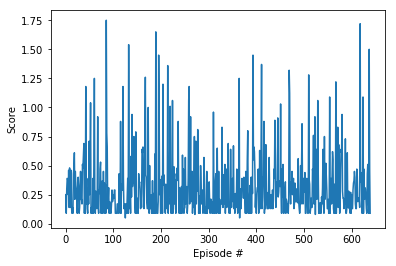

Episode 641	Average Score: 0.33Maxi 4
Episode 642	Average Score: 0.33Maxi 8
Episode 643	Average Score: 0.33Maxi 1
Episode 644	Average Score: 0.33Maxi 4
Episode 645	Average Score: 0.33Maxi 2
Episode 646	Average Score: 0.33Maxi 2
Episode 647	Average Score: 0.33Maxi 9
Episode 648	Average Score: 0.32Maxi 3
Episode 649	Average Score: 0.32Maxi 1
Episode 650	Average Score: 0.32Maxi 3
Episode 650	Average Score: 0.32


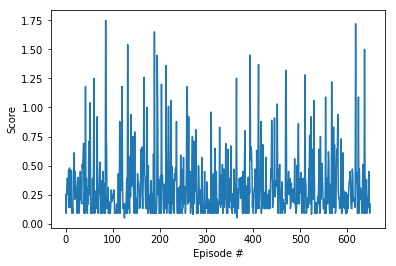

Episode 651	Average Score: 0.32Maxi 9
Episode 652	Average Score: 0.32Maxi 2
Episode 653	Average Score: 0.32Maxi 2
Episode 654	Average Score: 0.32Maxi 2
Episode 655	Average Score: 0.32Maxi 6
Episode 656	Average Score: 0.32Maxi 2
Episode 657	Average Score: 0.32Maxi 3
Episode 658	Average Score: 0.31Maxi 2
Episode 659	Average Score: 0.31Maxi 2
Episode 660	Average Score: 0.31Maxi 6
Episode 660	Average Score: 0.31


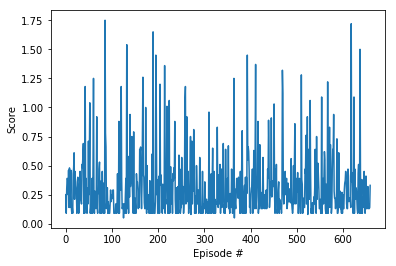

Episode 661	Average Score: 0.31Maxi 4
Episode 662	Average Score: 0.31Maxi 10
Episode 663	Average Score: 0.31Maxi 21
Episode 664	Average Score: 0.31Maxi 1
Episode 665	Average Score: 0.31Maxi 6
Episode 666	Average Score: 0.32Maxi 6
Episode 667	Average Score: 0.32Maxi 9
Episode 668	Average Score: 0.31Maxi 3
Episode 669	Average Score: 0.31Maxi 4
Episode 670	Average Score: 0.31Maxi 1
Episode 670	Average Score: 0.31


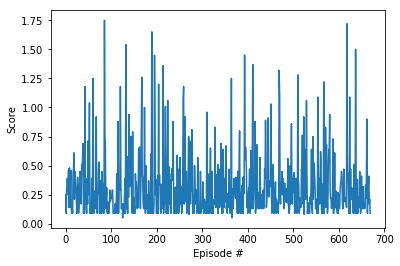

Episode 671	Average Score: 0.31Maxi 1
Episode 672	Average Score: 0.30Maxi 1
Episode 673	Average Score: 0.30Maxi 1
Episode 674	Average Score: 0.30Maxi 10
Episode 675	Average Score: 0.30Maxi 7
Episode 676	Average Score: 0.30Maxi 9
Episode 677	Average Score: 0.30Maxi 8
Episode 678	Average Score: 0.30Maxi 4
Episode 679	Average Score: 0.30Maxi 7
Episode 680	Average Score: 0.29Maxi 4
Episode 680	Average Score: 0.29


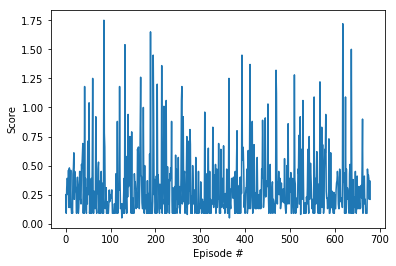

Episode 681	Average Score: 0.28Maxi 4
Episode 682	Average Score: 0.28Maxi 3
Episode 683	Average Score: 0.29Maxi 9
Episode 684	Average Score: 0.28Maxi 2
Episode 685	Average Score: 0.29Maxi 7
Episode 686	Average Score: 0.29Maxi 10
Episode 687	Average Score: 0.29Maxi 4
Episode 688	Average Score: 0.28Maxi 4
Episode 689	Average Score: 0.29Maxi 4
Episode 690	Average Score: 0.29Maxi 2
Episode 690	Average Score: 0.29


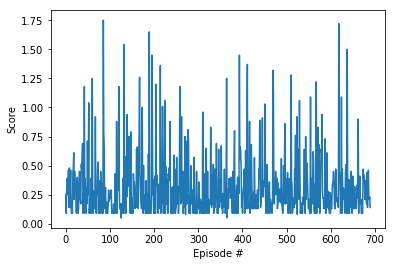

Episode 691	Average Score: 0.29Maxi 9
Episode 692	Average Score: 0.29Maxi 3
Episode 693	Average Score: 0.29Maxi 3
Episode 694	Average Score: 0.29Maxi 10
Episode 695	Average Score: 0.29Maxi 5
Episode 696	Average Score: 0.29Maxi 8
Episode 697	Average Score: 0.29Maxi 5
Episode 698	Average Score: 0.30Maxi 13
Episode 699	Average Score: 0.30Maxi 2
Episode 700	Average Score: 0.30Maxi 8
Episode 700	Average Score: 0.30


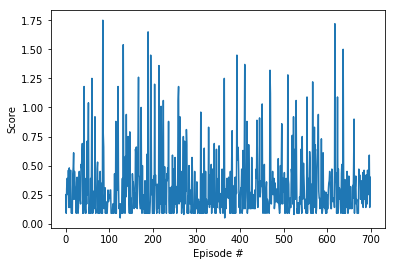

Episode 700	Average Score: 0.30


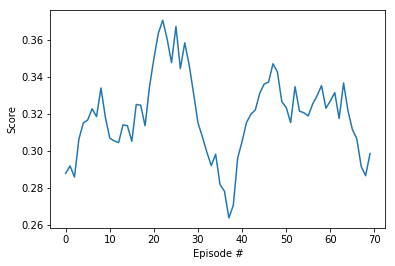

Episode 701	Average Score: 0.30Maxi 2
Episode 702	Average Score: 0.30Maxi 10
Episode 703	Average Score: 0.30Maxi 1
Episode 704	Average Score: 0.30Maxi 1
Episode 705	Average Score: 0.30Maxi 12
Episode 706	Average Score: 0.30Maxi 4
Episode 707	Average Score: 0.30Maxi 6
Episode 708	Average Score: 0.30Maxi 21
Episode 709	Average Score: 0.30Maxi 1
Episode 710	Average Score: 0.30Maxi 3
Episode 710	Average Score: 0.30


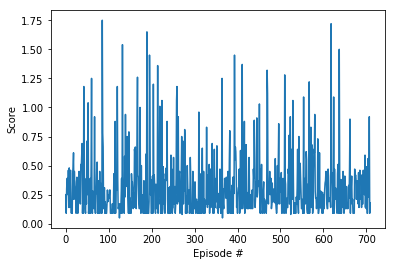

Episode 711	Average Score: 0.30Maxi 1
Episode 712	Average Score: 0.30Maxi 1
Episode 713	Average Score: 0.30Maxi 2
Episode 714	Average Score: 0.30Maxi 2
Episode 715	Average Score: 0.30Maxi 5
Episode 716	Average Score: 0.29Maxi 2
Episode 717	Average Score: 0.30Maxi 6
Episode 718	Average Score: 0.30Maxi 7
Episode 719	Average Score: 0.28Maxi 1
Episode 720	Average Score: 0.28Maxi 3
Episode 720	Average Score: 0.28


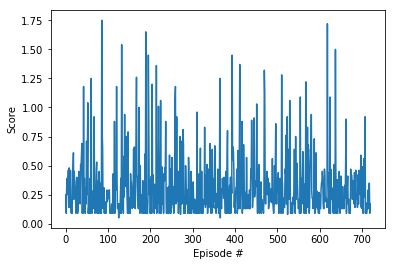

Episode 721	Average Score: 0.28Maxi 11
Episode 722	Average Score: 0.28Maxi 2
Episode 723	Average Score: 0.28Maxi 2
Episode 724	Average Score: 0.28Maxi 2
Episode 725	Average Score: 0.27Maxi 5
Episode 726	Average Score: 0.27Maxi 2
Episode 727	Average Score: 0.27Maxi 3
Episode 728	Average Score: 0.27Maxi 4
Episode 729	Average Score: 0.27Maxi 7
Episode 730	Average Score: 0.28Maxi 23
Episode 730	Average Score: 0.28


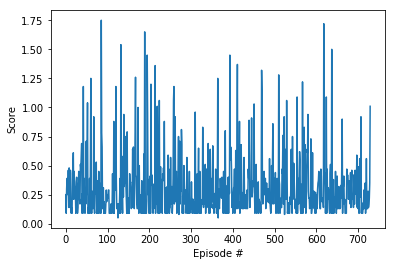

Episode 731	Average Score: 0.27Maxi 2
Episode 732	Average Score: 0.27Maxi 2
Episode 733	Average Score: 0.28Maxi 2
Episode 734	Average Score: 0.27Maxi 2
Episode 735	Average Score: 0.27Maxi 4
Episode 736	Average Score: 0.27Maxi 3
Episode 737	Average Score: 0.27Maxi 7
Episode 738	Average Score: 0.26Maxi 2
Episode 739	Average Score: 0.25Maxi 2
Episode 740	Average Score: 0.26Maxi 13
Episode 740	Average Score: 0.26


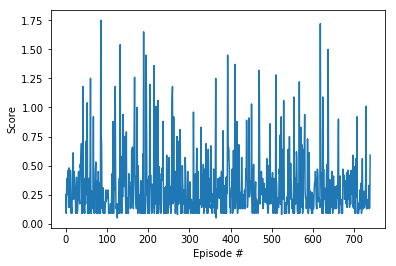

Episode 741	Average Score: 0.26Maxi 8
Episode 742	Average Score: 0.26Maxi 2
Episode 743	Average Score: 0.26Maxi 4
Episode 744	Average Score: 0.26Maxi 6
Episode 745	Average Score: 0.26Maxi 3
Episode 746	Average Score: 0.26Maxi 8
Episode 747	Average Score: 0.27Maxi 15
Episode 748	Average Score: 0.27Maxi 1
Episode 749	Average Score: 0.27Maxi 3
Episode 750	Average Score: 0.27Maxi 1
Episode 750	Average Score: 0.27


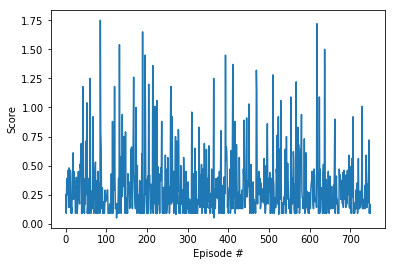

Episode 751	Average Score: 0.27Maxi 14
Episode 752	Average Score: 0.27Maxi 6
Episode 753	Average Score: 0.27Maxi 1
Episode 754	Average Score: 0.27Maxi 8
Episode 755	Average Score: 0.27Maxi 13
Episode 756	Average Score: 0.28Maxi 2
Episode 757	Average Score: 0.28Maxi 7
Episode 758	Average Score: 0.28Maxi 2
Episode 759	Average Score: 0.28Maxi 1
Episode 760	Average Score: 0.28Maxi 10
Episode 760	Average Score: 0.28


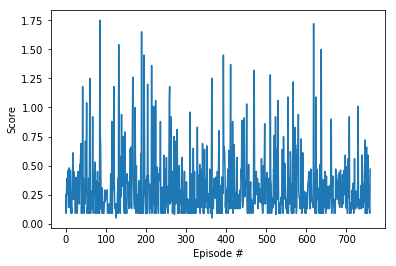

Episode 761	Average Score: 0.28Maxi 1
Episode 762	Average Score: 0.27Maxi 2
Episode 763	Average Score: 0.27Maxi 3
Episode 764	Average Score: 0.27Maxi 6
Episode 765	Average Score: 0.27Maxi 7
Episode 766	Average Score: 0.27Maxi 4
Episode 767	Average Score: 0.26Maxi 3
Episode 768	Average Score: 0.26Maxi 1
Episode 769	Average Score: 0.26Maxi 4
Episode 770	Average Score: 0.26Maxi 1
Episode 770	Average Score: 0.26


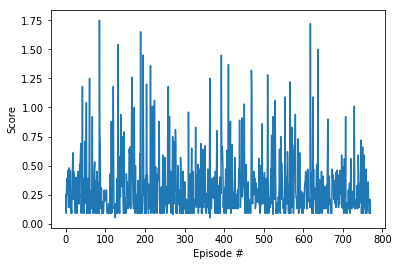

Episode 771	Average Score: 0.26Maxi 4
Episode 772	Average Score: 0.26Maxi 1
Episode 773	Average Score: 0.26Maxi 1
Episode 774	Average Score: 0.26Maxi 3
Episode 775	Average Score: 0.26Maxi 3
Episode 776	Average Score: 0.26Maxi 1
Episode 777	Average Score: 0.26Maxi 6
Episode 778	Average Score: 0.25Maxi 1
Episode 779	Average Score: 0.25Maxi 1
Episode 780	Average Score: 0.25Maxi 1
Episode 780	Average Score: 0.25


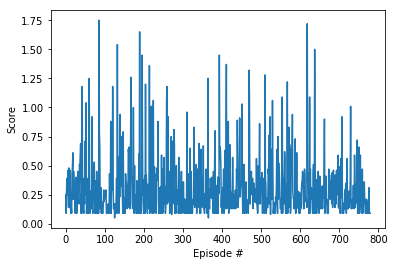

Episode 781	Average Score: 0.25Maxi 2
Episode 782	Average Score: 0.25Maxi 4
Episode 783	Average Score: 0.25Maxi 5
Episode 784	Average Score: 0.25Maxi 1
Episode 785	Average Score: 0.25Maxi 1
Episode 786	Average Score: 0.24Maxi 2
Episode 787	Average Score: 0.24Maxi 3
Episode 788	Average Score: 0.24Maxi 1
Episode 789	Average Score: 0.24Maxi 4
Episode 790	Average Score: 0.24Maxi 1
Episode 790	Average Score: 0.24


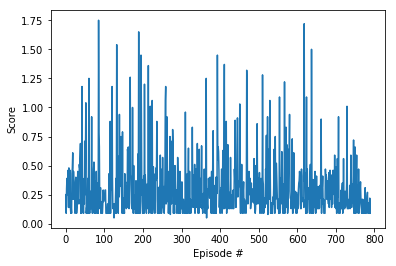

Episode 791	Average Score: 0.24Maxi 4
Episode 792	Average Score: 0.24Maxi 8
Episode 793	Average Score: 0.24Maxi 2
Episode 794	Average Score: 0.24Maxi 6
Episode 795	Average Score: 0.24Maxi 1
Episode 796	Average Score: 0.24Maxi 5
Episode 797	Average Score: 0.23Maxi 2
Episode 798	Average Score: 0.23Maxi 4
Episode 799	Average Score: 0.23Maxi 4
Episode 800	Average Score: 0.23Maxi 4
Episode 800	Average Score: 0.23


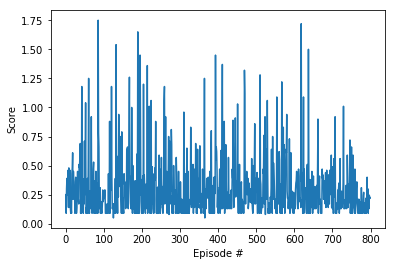

Episode 800	Average Score: 0.23


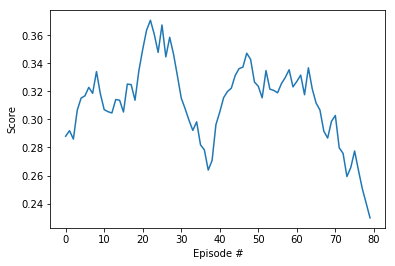

Episode 801	Average Score: 0.23Maxi 6
Episode 802	Average Score: 0.23Maxi 5
Episode 803	Average Score: 0.23Maxi 10
Episode 804	Average Score: 0.23Maxi 1
Episode 805	Average Score: 0.23Maxi 1
Episode 806	Average Score: 0.23Maxi 1
Episode 807	Average Score: 0.23Maxi 3
Episode 808	Average Score: 0.22Maxi 0
Episode 809	Average Score: 0.22Maxi 2
Episode 810	Average Score: 0.22Maxi 1
Episode 810	Average Score: 0.22


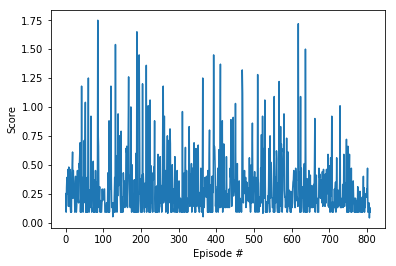

Episode 811	Average Score: 0.22Maxi 5
Episode 812	Average Score: 0.22Maxi 3
Episode 813	Average Score: 0.22Maxi 4
Episode 814	Average Score: 0.22Maxi 2
Episode 815	Average Score: 0.22Maxi 2
Episode 816	Average Score: 0.22Maxi 2
Episode 817	Average Score: 0.22Maxi 2
Episode 818	Average Score: 0.21Maxi 2
Episode 819	Average Score: 0.22Maxi 17
Episode 820	Average Score: 0.22Maxi 6
Episode 820	Average Score: 0.22


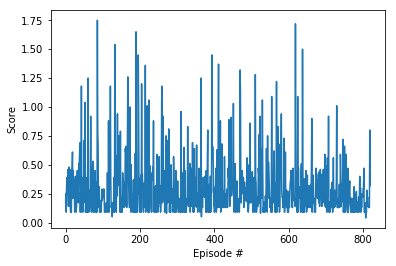

Episode 821	Average Score: 0.23Maxi 15
Episode 822	Average Score: 0.23Maxi 4
Episode 823	Average Score: 0.23Maxi 4
Episode 824	Average Score: 0.24Maxi 22
Episode 825	Average Score: 0.23Maxi 1
Episode 826	Average Score: 0.23Maxi 1
Episode 827	Average Score: 0.23Maxi 3
Episode 828	Average Score: 0.24Maxi 16
Episode 829	Average Score: 0.24Maxi 5
Episode 830	Average Score: 0.23Maxi 4
Episode 830	Average Score: 0.23


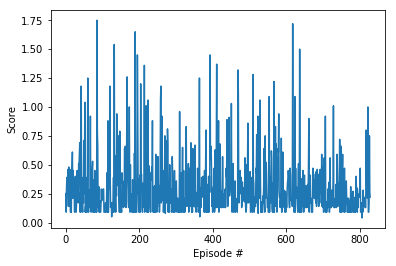

Episode 831	Average Score: 0.23Maxi 9
Episode 832	Average Score: 0.23Maxi 3
Episode 833	Average Score: 0.23Maxi 4
Episode 834	Average Score: 0.23Maxi 1
Episode 835	Average Score: 0.23Maxi 1
Episode 836	Average Score: 0.23Maxi 6
Episode 837	Average Score: 0.24Maxi 23
Episode 838	Average Score: 0.24Maxi 6
Episode 839	Average Score: 0.24Maxi 5
Episode 840	Average Score: 0.24Maxi 1
Episode 840	Average Score: 0.24


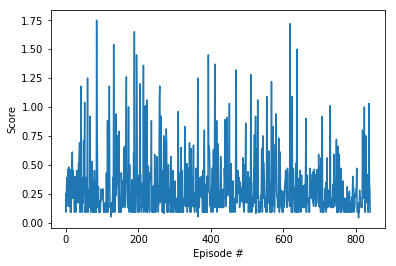

Episode 841	Average Score: 0.24Maxi 4
Episode 842	Average Score: 0.24Maxi 4
Episode 843	Average Score: 0.24Maxi 3
Episode 844	Average Score: 0.24Maxi 2
Episode 845	Average Score: 0.23Maxi 1
Episode 846	Average Score: 0.23Maxi 3
Episode 847	Average Score: 0.23Maxi 1
Episode 848	Average Score: 0.23Maxi 11
Episode 849	Average Score: 0.23Maxi 3
Episode 850	Average Score: 0.23Maxi 4
Episode 850	Average Score: 0.23


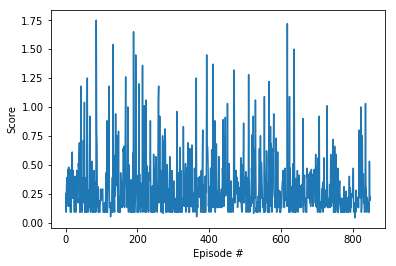

Episode 851	Average Score: 0.23Maxi 18
Episode 852	Average Score: 0.23Maxi 2
Episode 853	Average Score: 0.23Maxi 7
Episode 854	Average Score: 0.23Maxi 2
Episode 855	Average Score: 0.23Maxi 1
Episode 856	Average Score: 0.23Maxi 3
Episode 857	Average Score: 0.22Maxi 0
Episode 858	Average Score: 0.22Maxi 2
Episode 859	Average Score: 0.23Maxi 13
Episode 860	Average Score: 0.23Maxi 4
Episode 860	Average Score: 0.23


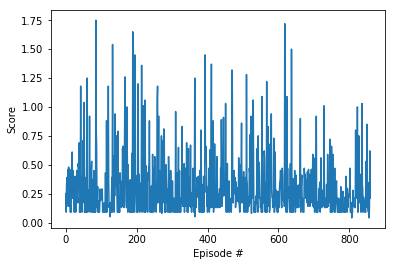

Episode 861	Average Score: 0.23Maxi 6
Episode 862	Average Score: 0.23Maxi 7
Episode 863	Average Score: 0.24Maxi 14
Episode 864	Average Score: 0.24Maxi 4
Episode 865	Average Score: 0.23Maxi 1
Episode 866	Average Score: 0.23Maxi 2
Episode 867	Average Score: 0.23Maxi 3
Episode 868	Average Score: 0.23Maxi 4
Episode 869	Average Score: 0.23Maxi 6
Episode 870	Average Score: 0.24Maxi 4
Episode 870	Average Score: 0.24


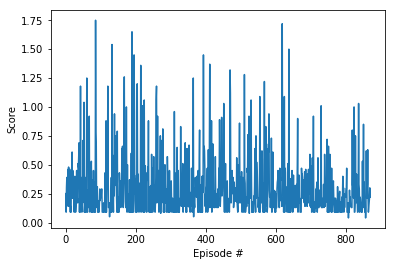

Episode 871	Average Score: 0.23Maxi 4
Episode 872	Average Score: 0.23Maxi 1
Episode 873	Average Score: 0.24Maxi 5
Episode 874	Average Score: 0.24Maxi 1
Episode 875	Average Score: 0.24Maxi 3
Episode 876	Average Score: 0.24Maxi 3
Episode 877	Average Score: 0.24Maxi 3
Episode 878	Average Score: 0.24Maxi 3
Episode 879	Average Score: 0.24Maxi 1
Episode 880	Average Score: 0.24Maxi 4
Episode 880	Average Score: 0.24


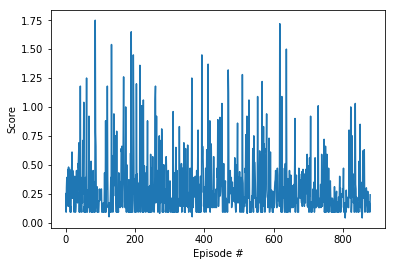

Episode 881	Average Score: 0.24Maxi 2
Episode 882	Average Score: 0.24Maxi 6
Episode 883	Average Score: 0.24Maxi 6
Episode 884	Average Score: 0.24Maxi 12
Episode 885	Average Score: 0.25Maxi 24
Episode 886	Average Score: 0.25Maxi 3
Episode 887	Average Score: 0.25Maxi 6
Episode 888	Average Score: 0.26Maxi 8
Episode 889	Average Score: 0.26Maxi 4
Episode 890	Average Score: 0.26Maxi 3
Episode 890	Average Score: 0.26


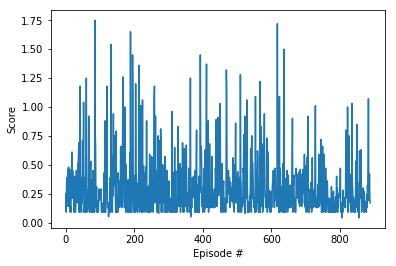

Episode 891	Average Score: 0.26Maxi 5
Episode 892	Average Score: 0.26Maxi 1
Episode 893	Average Score: 0.26Maxi 6
Episode 894	Average Score: 0.26Maxi 1
Episode 895	Average Score: 0.26Maxi 2
Episode 896	Average Score: 0.26Maxi 4
Episode 897	Average Score: 0.26Maxi 2
Episode 898	Average Score: 0.25Maxi 2
Episode 899	Average Score: 0.25Maxi 1
Episode 900	Average Score: 0.25Maxi 5
Episode 900	Average Score: 0.25


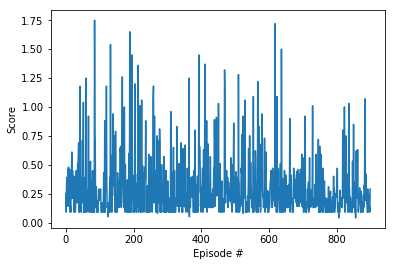

Episode 900	Average Score: 0.25


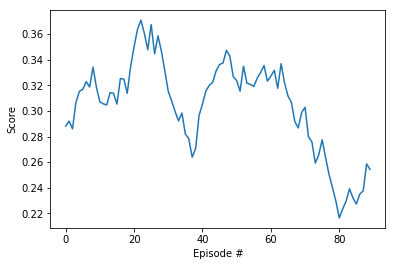

Episode 901	Average Score: 0.25Maxi 2
Episode 902	Average Score: 0.25Maxi 5
Episode 903	Average Score: 0.25Maxi 4
Episode 904	Average Score: 0.25Maxi 3
Episode 905	Average Score: 0.25Maxi 3
Episode 906	Average Score: 0.25Maxi 5
Episode 907	Average Score: 0.25Maxi 6
Episode 908	Average Score: 0.26Maxi 3
Episode 909	Average Score: 0.26Maxi 9
Episode 910	Average Score: 0.26Maxi 3
Episode 910	Average Score: 0.26


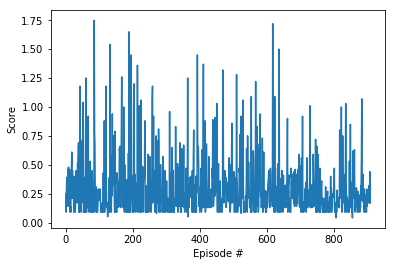

Episode 911	Average Score: 0.26Maxi 2
Episode 912	Average Score: 0.26Maxi 5
Episode 913	Average Score: 0.26Maxi 8
Episode 914	Average Score: 0.26Maxi 3
Episode 915	Average Score: 0.26Maxi 3
Episode 916	Average Score: 0.26Maxi 2
Episode 917	Average Score: 0.26Maxi 2
Episode 918	Average Score: 0.26Maxi 2
Episode 919	Average Score: 0.26Maxi 6
Episode 920	Average Score: 0.26Maxi 3
Episode 920	Average Score: 0.26


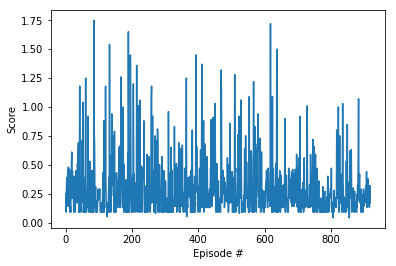

Episode 921	Average Score: 0.25Maxi 4
Episode 922	Average Score: 0.25Maxi 1
Episode 923	Average Score: 0.25Maxi 7
Episode 924	Average Score: 0.24Maxi 1
Episode 925	Average Score: 0.25Maxi 10
Episode 926	Average Score: 0.25Maxi 5
Episode 927	Average Score: 0.25Maxi 3
Episode 928	Average Score: 0.25Maxi 12
Episode 929	Average Score: 0.25Maxi 4
Episode 930	Average Score: 0.24Maxi 1
Episode 930	Average Score: 0.24


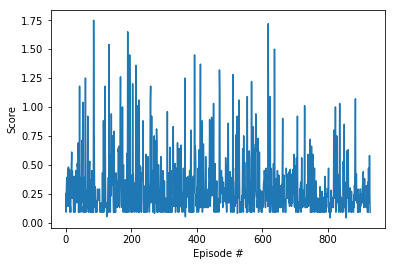

Episode 931	Average Score: 0.24Maxi 4
Episode 932	Average Score: 0.24Maxi 7
Episode 933	Average Score: 0.24Maxi 3
Episode 934	Average Score: 0.25Maxi 21
Episode 935	Average Score: 0.25Maxi 4
Episode 936	Average Score: 0.25Maxi 5
Episode 937	Average Score: 0.24Maxi 2
Episode 938	Average Score: 0.24Maxi 1
Episode 939	Average Score: 0.24Maxi 6
Episode 940	Average Score: 0.24Maxi 2
Episode 940	Average Score: 0.24


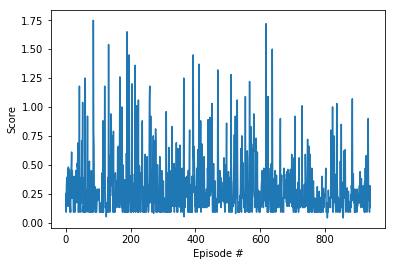

Episode 941	Average Score: 0.24Maxi 4
Episode 942	Average Score: 0.24Maxi 1
Episode 943	Average Score: 0.24Maxi 6
Episode 944	Average Score: 0.24Maxi 1
Episode 945	Average Score: 0.25Maxi 16
Episode 946	Average Score: 0.25Maxi 8
Episode 947	Average Score: 0.26Maxi 16
Episode 948	Average Score: 0.25Maxi 3
Episode 949	Average Score: 0.26Maxi 12
Episode 950	Average Score: 0.26Maxi 15
Episode 950	Average Score: 0.26


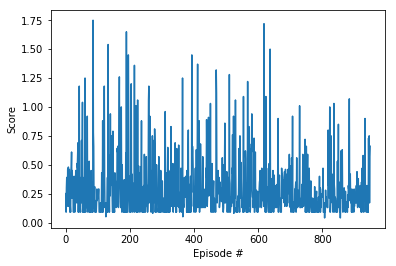

Episode 951	Average Score: 0.25Maxi 2
Episode 952	Average Score: 0.25Maxi 1
Episode 953	Average Score: 0.26Maxi 10
Episode 954	Average Score: 0.26Maxi 10
Episode 955	Average Score: 0.26Maxi 1
Episode 956	Average Score: 0.26Maxi 2
Episode 957	Average Score: 0.26Maxi 4
Episode 958	Average Score: 0.26Maxi 2
Episode 959	Average Score: 0.25Maxi 1
Episode 960	Average Score: 0.25Maxi 3
Episode 960	Average Score: 0.25


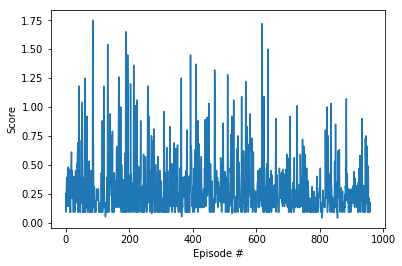

Episode 961	Average Score: 0.25Maxi 4
Episode 962	Average Score: 0.25Maxi 3
Episode 963	Average Score: 0.25Maxi 7
Episode 964	Average Score: 0.25Maxi 4
Episode 965	Average Score: 0.26Maxi 23
Episode 966	Average Score: 0.26Maxi 1
Episode 967	Average Score: 0.26Maxi 2
Episode 968	Average Score: 0.26Maxi 1
Episode 969	Average Score: 0.26Maxi 3
Episode 970	Average Score: 0.26Maxi 4
Episode 970	Average Score: 0.26


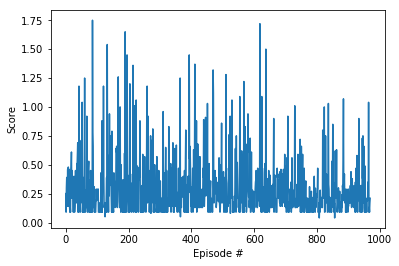

Episode 971	Average Score: 0.26Maxi 3
Episode 972	Average Score: 0.26Maxi 11
Episode 973	Average Score: 0.26Maxi 2
Episode 974	Average Score: 0.26Maxi 4
Episode 975	Average Score: 0.26Maxi 1
Episode 976	Average Score: 0.26Maxi 1
Episode 977	Average Score: 0.26Maxi 2
Episode 978	Average Score: 0.26Maxi 9
Episode 979	Average Score: 0.27Maxi 19
Episode 980	Average Score: 0.27Maxi 2
Episode 980	Average Score: 0.27


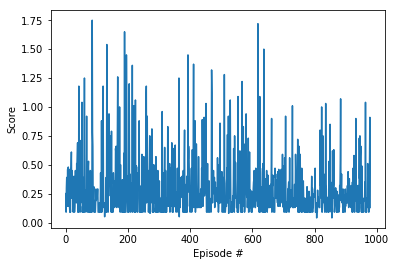

Episode 981	Average Score: 0.27Maxi 1
Episode 982	Average Score: 0.26Maxi 2
Episode 983	Average Score: 0.26Maxi 1
Episode 984	Average Score: 0.26Maxi 3
Episode 985	Average Score: 0.25Maxi 6
Episode 986	Average Score: 0.25Maxi 3
Episode 987	Average Score: 0.25Maxi 2
Episode 988	Average Score: 0.25Maxi 2
Episode 989	Average Score: 0.25Maxi 2
Episode 990	Average Score: 0.25Maxi 2
Episode 990	Average Score: 0.25


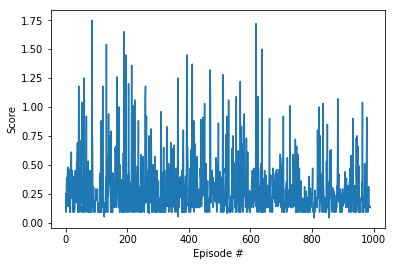

Episode 991	Average Score: 0.25Maxi 7
Episode 992	Average Score: 0.25Maxi 4
Episode 993	Average Score: 0.25Maxi 11
Episode 994	Average Score: 0.25Maxi 1
Episode 995	Average Score: 0.25Maxi 3
Episode 996	Average Score: 0.25Maxi 1
Episode 997	Average Score: 0.25Maxi 2
Episode 998	Average Score: 0.25Maxi 2
Episode 999	Average Score: 0.25Maxi 2
Episode 1000	Average Score: 0.25Maxi 8
Episode 1000	Average Score: 0.25


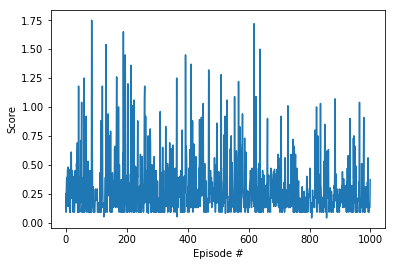

Episode 1000	Average Score: 0.25


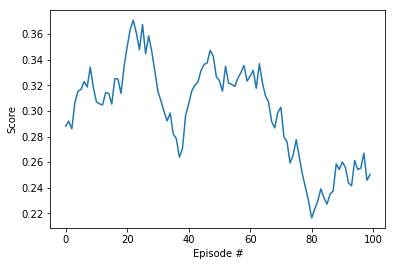

Episode 1001	Average Score: 0.25Maxi 6
Episode 1002	Average Score: 0.25Maxi 4
Episode 1003	Average Score: 0.26Maxi 11
Episode 1004	Average Score: 0.25Maxi 1
Episode 1005	Average Score: 0.26Maxi 8
Episode 1006	Average Score: 0.26Maxi 3
Episode 1007	Average Score: 0.25Maxi 3
Episode 1008	Average Score: 0.25Maxi 3
Episode 1009	Average Score: 0.25Maxi 2
Episode 1010	Average Score: 0.25Maxi 3
Episode 1010	Average Score: 0.25


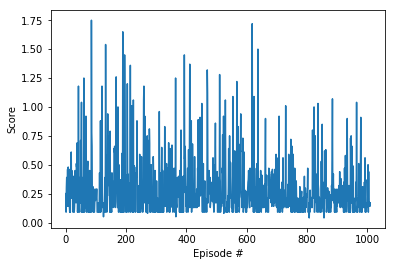

Episode 1011	Average Score: 0.25Maxi 4
Episode 1012	Average Score: 0.25Maxi 2
Episode 1013	Average Score: 0.25Maxi 6
Episode 1014	Average Score: 0.25Maxi 10
Episode 1015	Average Score: 0.25Maxi 1
Episode 1016	Average Score: 0.25Maxi 2
Episode 1017	Average Score: 0.25Maxi 2
Episode 1018	Average Score: 0.25Maxi 1
Episode 1019	Average Score: 0.25Maxi 8
Episode 1020	Average Score: 0.26Maxi 12
Episode 1020	Average Score: 0.26


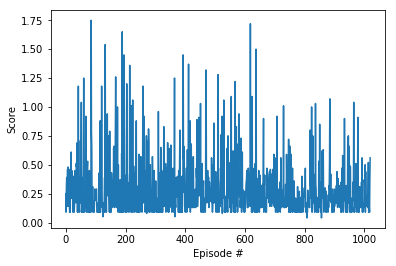

Episode 1021	Average Score: 0.26Maxi 11
Episode 1022	Average Score: 0.26Maxi 2
Episode 1023	Average Score: 0.26Maxi 1
Episode 1024	Average Score: 0.26Maxi 1
Episode 1025	Average Score: 0.26Maxi 10
Episode 1026	Average Score: 0.26Maxi 1
Episode 1027	Average Score: 0.26Maxi 2
Episode 1028	Average Score: 0.25Maxi 1
Episode 1029	Average Score: 0.25Maxi 1
Episode 1030	Average Score: 0.25Maxi 1
Episode 1030	Average Score: 0.25


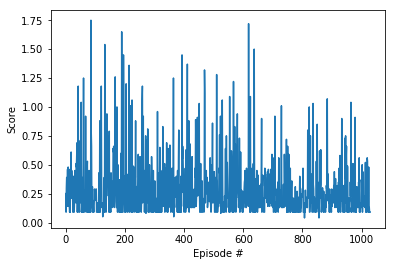

Episode 1031	Average Score: 0.25Maxi 2
Episode 1032	Average Score: 0.25Maxi 1
Episode 1033	Average Score: 0.25Maxi 5
Episode 1034	Average Score: 0.24Maxi 4
Episode 1035	Average Score: 0.24Maxi 1
Episode 1036	Average Score: 0.24Maxi 8
Episode 1037	Average Score: 0.24Maxi 1
Episode 1038	Average Score: 0.24Maxi 3
Episode 1039	Average Score: 0.24Maxi 3
Episode 1040	Average Score: 0.24Maxi 1
Episode 1040	Average Score: 0.24


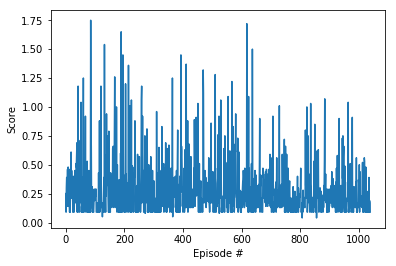

Episode 1041	Average Score: 0.24Maxi 5
Episode 1042	Average Score: 0.24Maxi 4
Episode 1043	Average Score: 0.24Maxi 3
Episode 1044	Average Score: 0.24Maxi 1
Episode 1045	Average Score: 0.24Maxi 9
Episode 1046	Average Score: 0.24Maxi 9
Episode 1047	Average Score: 0.23Maxi 3
Episode 1048	Average Score: 0.23Maxi 1
Episode 1049	Average Score: 0.23Maxi 1
Episode 1050	Average Score: 0.22Maxi 4
Episode 1050	Average Score: 0.22


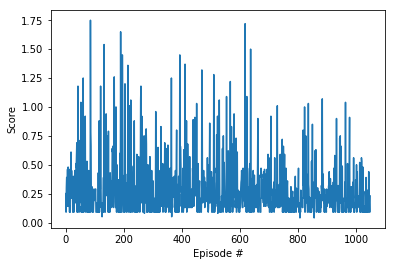

Episode 1051	Average Score: 0.22Maxi 6
Episode 1052	Average Score: 0.22Maxi 5
Episode 1053	Average Score: 0.23Maxi 15
Episode 1054	Average Score: 0.22Maxi 3
Episode 1055	Average Score: 0.23Maxi 9
Episode 1056	Average Score: 0.24Maxi 25
Episode 1057	Average Score: 0.24Maxi 1
Episode 1058	Average Score: 0.24Maxi 1
Episode 1059	Average Score: 0.24Maxi 7
Episode 1060	Average Score: 0.24Maxi 7
Episode 1060	Average Score: 0.24


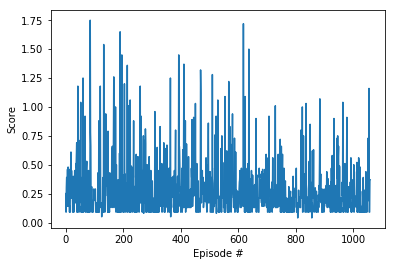

Episode 1061	Average Score: 0.24Maxi 5
Episode 1062	Average Score: 0.24Maxi 1
Episode 1063	Average Score: 0.24Maxi 1
Episode 1064	Average Score: 0.24Maxi 4
Episode 1065	Average Score: 0.23Maxi 3
Episode 1066	Average Score: 0.23Maxi 3
Episode 1067	Average Score: 0.23Maxi 6
Episode 1068	Average Score: 0.24Maxi 16
Episode 1069	Average Score: 0.24Maxi 3
Episode 1070	Average Score: 0.24Maxi 2
Episode 1070	Average Score: 0.24


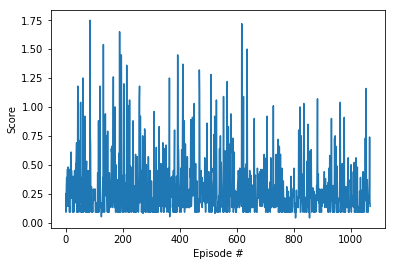

Episode 1071	Average Score: 0.24Maxi 3
Episode 1072	Average Score: 0.23Maxi 2
Episode 1073	Average Score: 0.24Maxi 9
Episode 1074	Average Score: 0.24Maxi 7
Episode 1075	Average Score: 0.24Maxi 2
Episode 1076	Average Score: 0.24Maxi 3
Episode 1077	Average Score: 0.24Maxi 3
Episode 1078	Average Score: 0.24Maxi 1
Episode 1079	Average Score: 0.23Maxi 2
Episode 1080	Average Score: 0.23Maxi 1
Episode 1080	Average Score: 0.23


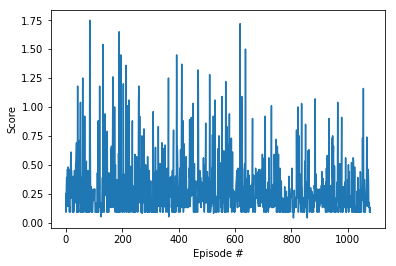

Episode 1081	Average Score: 0.23Maxi 3
Episode 1082	Average Score: 0.23Maxi 6
Episode 1083	Average Score: 0.23Maxi 5
Episode 1084	Average Score: 0.23Maxi 2
Episode 1085	Average Score: 0.23Maxi 1
Episode 1086	Average Score: 0.23Maxi 6
Episode 1087	Average Score: 0.23Maxi 3
Episode 1088	Average Score: 0.23Maxi 3
Episode 1089	Average Score: 0.23Maxi 5
Episode 1090	Average Score: 0.24Maxi 13
Episode 1090	Average Score: 0.24


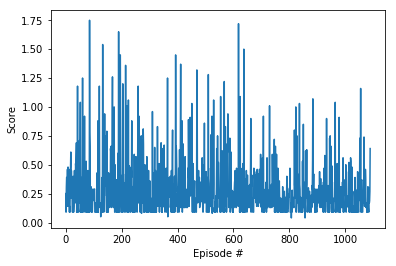

Episode 1091	Average Score: 0.24Maxi 2
Episode 1092	Average Score: 0.24Maxi 1
Episode 1093	Average Score: 0.23Maxi 3
Episode 1094	Average Score: 0.23Maxi 2
Episode 1095	Average Score: 0.24Maxi 10
Episode 1096	Average Score: 0.24Maxi 13
Episode 1097	Average Score: 0.24Maxi 1
Episode 1098	Average Score: 0.24Maxi 1
Episode 1099	Average Score: 0.24Maxi 3
Episode 1100	Average Score: 0.24Maxi 6
Episode 1100	Average Score: 0.24


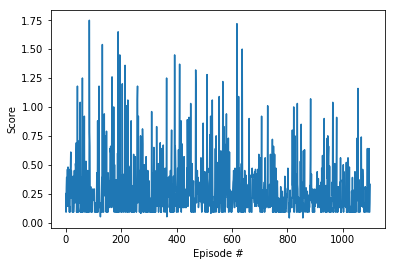

Episode 1100	Average Score: 0.24


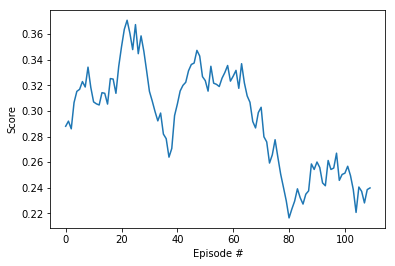

Episode 1101	Average Score: 0.24Maxi 4
Episode 1102	Average Score: 0.24Maxi 1
Episode 1103	Average Score: 0.24Maxi 11
Episode 1104	Average Score: 0.24Maxi 2
Episode 1105	Average Score: 0.23Maxi 1
Episode 1106	Average Score: 0.24Maxi 4
Episode 1107	Average Score: 0.24Maxi 4
Episode 1108	Average Score: 0.24Maxi 3
Episode 1109	Average Score: 0.24Maxi 5
Episode 1110	Average Score: 0.24Maxi 7
Episode 1110	Average Score: 0.24


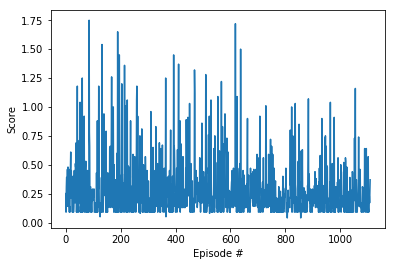

Episode 1111	Average Score: 0.24Maxi 1
Episode 1112	Average Score: 0.24Maxi 4
Episode 1113	Average Score: 0.24Maxi 5
Episode 1114	Average Score: 0.24Maxi 5
Episode 1115	Average Score: 0.24Maxi 3
Episode 1116	Average Score: 0.24Maxi 3
Episode 1117	Average Score: 0.24Maxi 7
Episode 1118	Average Score: 0.24Maxi 1
Episode 1119	Average Score: 0.24Maxi 4
Episode 1120	Average Score: 0.23Maxi 4
Episode 1120	Average Score: 0.23


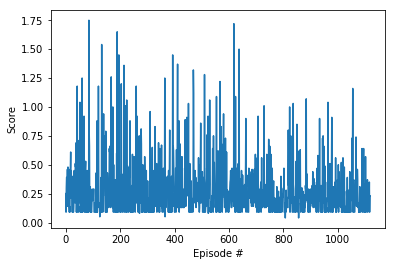

Episode 1121	Average Score: 0.23Maxi 4
Episode 1122	Average Score: 0.23Maxi 3
Episode 1123	Average Score: 0.23Maxi 1
Episode 1124	Average Score: 0.23Maxi 5
Episode 1125	Average Score: 0.23Maxi 4
Episode 1126	Average Score: 0.23Maxi 1
Episode 1127	Average Score: 0.23Maxi 6
Episode 1128	Average Score: 0.23Maxi 2
Episode 1129	Average Score: 0.24Maxi 8
Episode 1130	Average Score: 0.24Maxi 2
Episode 1130	Average Score: 0.24


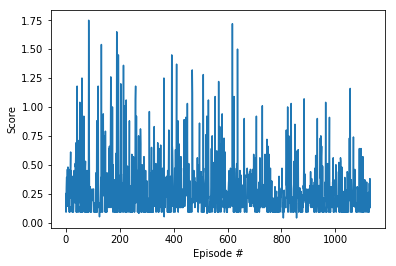

Episode 1131	Average Score: 0.24Maxi 2
Episode 1132	Average Score: 0.24Maxi 4
Episode 1133	Average Score: 0.24Maxi 8
Episode 1134	Average Score: 0.24Maxi 2
Episode 1135	Average Score: 0.24Maxi 2
Episode 1136	Average Score: 0.24Maxi 7
Episode 1137	Average Score: 0.24Maxi 4
Episode 1138	Average Score: 0.24Maxi 2
Episode 1139	Average Score: 0.24Maxi 1
Episode 1140	Average Score: 0.24Maxi 7
Episode 1140	Average Score: 0.24


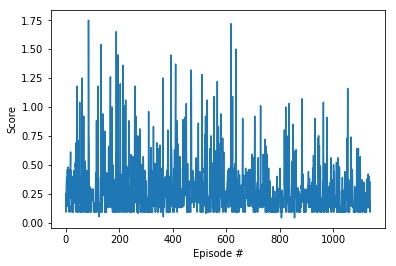

Episode 1141	Average Score: 0.24Maxi 4
Episode 1142	Average Score: 0.24Maxi 6
Episode 1143	Average Score: 0.24Maxi 9
Episode 1144	Average Score: 0.25Maxi 9
Episode 1145	Average Score: 0.24Maxi 2
Episode 1146	Average Score: 0.24Maxi 2
Episode 1147	Average Score: 0.24Maxi 3
Episode 1148	Average Score: 0.24Maxi 3
Episode 1149	Average Score: 0.24Maxi 3
Episode 1150	Average Score: 0.25Maxi 11
Episode 1150	Average Score: 0.25


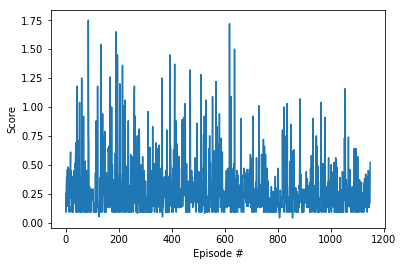

Episode 1151	Average Score: 0.24Maxi 1
Episode 1152	Average Score: 0.24Maxi 3
Episode 1153	Average Score: 0.24Maxi 6
Episode 1154	Average Score: 0.24Maxi 2
Episode 1155	Average Score: 0.24Maxi 3
Episode 1156	Average Score: 0.23Maxi 1
Episode 1157	Average Score: 0.23Maxi 5
Episode 1158	Average Score: 0.23Maxi 2
Episode 1159	Average Score: 0.23Maxi 2
Episode 1160	Average Score: 0.22Maxi 3
Episode 1160	Average Score: 0.22


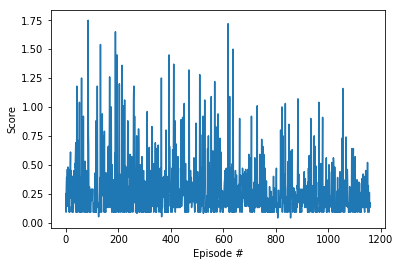

Episode 1161	Average Score: 0.22Maxi 2
Episode 1162	Average Score: 0.22Maxi 4
Episode 1163	Average Score: 0.22Maxi 2
Episode 1164	Average Score: 0.23Maxi 9
Episode 1165	Average Score: 0.23Maxi 2
Episode 1166	Average Score: 0.23Maxi 8
Episode 1167	Average Score: 0.23Maxi 1
Episode 1168	Average Score: 0.22Maxi 2
Episode 1169	Average Score: 0.22Maxi 4
Episode 1170	Average Score: 0.22Maxi 2
Episode 1170	Average Score: 0.22


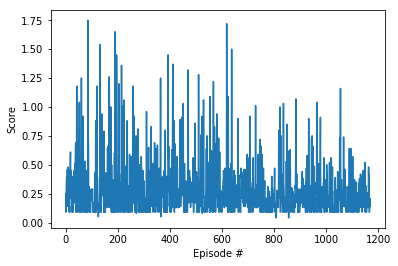

Episode 1171	Average Score: 0.22Maxi 2
Episode 1172	Average Score: 0.22Maxi 2
Episode 1173	Average Score: 0.22Maxi 3
Episode 1174	Average Score: 0.22Maxi 12
Episode 1175	Average Score: 0.22Maxi 4
Episode 1176	Average Score: 0.22Maxi 3
Episode 1177	Average Score: 0.22Maxi 3
Episode 1178	Average Score: 0.22Maxi 5
Episode 1179	Average Score: 0.22Maxi 1
Episode 1180	Average Score: 0.22Maxi 3
Episode 1180	Average Score: 0.22


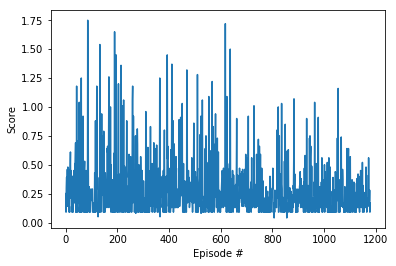

Episode 1181	Average Score: 0.22Maxi 2
Episode 1182	Average Score: 0.22Maxi 1
Episode 1183	Average Score: 0.22Maxi 3
Episode 1184	Average Score: 0.22Maxi 8
Episode 1185	Average Score: 0.22Maxi 4
Episode 1186	Average Score: 0.22Maxi 8
Episode 1187	Average Score: 0.23Maxi 10
Episode 1188	Average Score: 0.23Maxi 1
Episode 1189	Average Score: 0.23Maxi 2
Episode 1190	Average Score: 0.22Maxi 5
Episode 1190	Average Score: 0.22


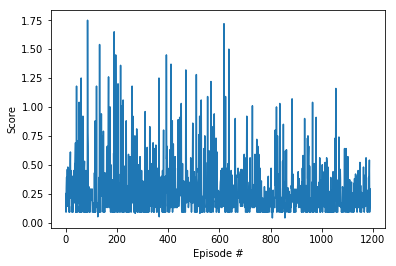

Episode 1191	Average Score: 0.22Maxi 5
Episode 1192	Average Score: 0.23Maxi 10
Episode 1193	Average Score: 0.23Maxi 2
Episode 1194	Average Score: 0.23Maxi 1
Episode 1195	Average Score: 0.22Maxi 1
Episode 1196	Average Score: 0.22Maxi 1
Episode 1197	Average Score: 0.22Maxi 2
Episode 1198	Average Score: 0.22Maxi 3
Episode 1199	Average Score: 0.22Maxi 1
Episode 1200	Average Score: 0.22Maxi 4
Episode 1200	Average Score: 0.22


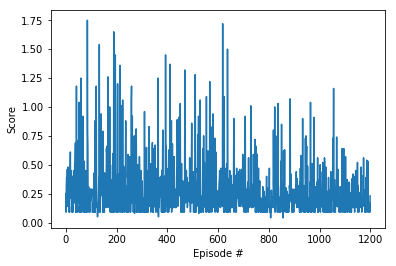

Episode 1200	Average Score: 0.22


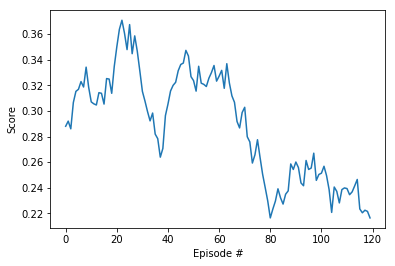

Episode 1201	Average Score: 0.22Maxi 12
Episode 1202	Average Score: 0.22Maxi 1
Episode 1203	Average Score: 0.22Maxi 11
Episode 1204	Average Score: 0.22Maxi 4
Episode 1205	Average Score: 0.22Maxi 1
Episode 1206	Average Score: 0.22Maxi 5
Episode 1207	Average Score: 0.22Maxi 2
Episode 1208	Average Score: 0.22Maxi 1
Episode 1209	Average Score: 0.22Maxi 1
Episode 1210	Average Score: 0.22Maxi 2
Episode 1210	Average Score: 0.22


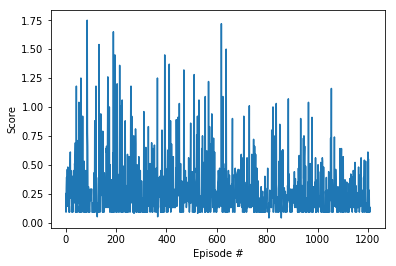

Episode 1211	Average Score: 0.22Maxi 4
Episode 1212	Average Score: 0.22Maxi 8
Episode 1213	Average Score: 0.22Maxi 13
Episode 1214	Average Score: 0.22Maxi 10
Episode 1215	Average Score: 0.22Maxi 2
Episode 1216	Average Score: 0.22Maxi 1
Episode 1217	Average Score: 0.22Maxi 1
Episode 1218	Average Score: 0.22Maxi 3
Episode 1219	Average Score: 0.22Maxi 2
Episode 1220	Average Score: 0.22Maxi 7
Episode 1220	Average Score: 0.22


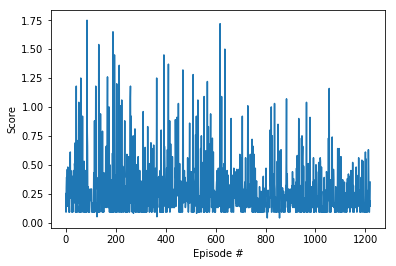

Episode 1221	Average Score: 0.22Maxi 8
Episode 1222	Average Score: 0.23Maxi 9
Episode 1223	Average Score: 0.23Maxi 1
Episode 1224	Average Score: 0.23Maxi 5
Episode 1225	Average Score: 0.23Maxi 7
Episode 1226	Average Score: 0.23Maxi 7
Episode 1227	Average Score: 0.23Maxi 5
Episode 1228	Average Score: 0.24Maxi 15
Episode 1229	Average Score: 0.23Maxi 4
Episode 1230	Average Score: 0.24Maxi 3
Episode 1230	Average Score: 0.24


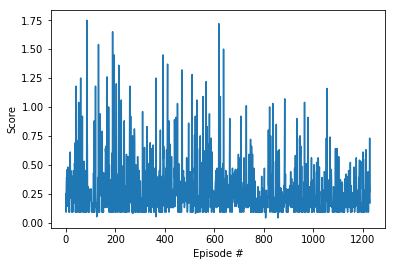

Episode 1231	Average Score: 0.23Maxi 1
Episode 1232	Average Score: 0.24Maxi 9
Episode 1233	Average Score: 0.24Maxi 5
Episode 1234	Average Score: 0.24Maxi 5
Episode 1235	Average Score: 0.24Maxi 7
Episode 1236	Average Score: 0.24Maxi 7
Episode 1237	Average Score: 0.24Maxi 3
Episode 1238	Average Score: 0.24Maxi 4
Episode 1239	Average Score: 0.24Maxi 2
Episode 1240	Average Score: 0.24Maxi 1
Episode 1240	Average Score: 0.24


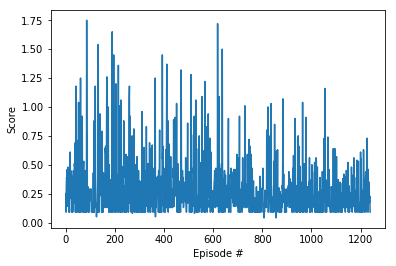

Episode 1241	Average Score: 0.24Maxi 1
Episode 1242	Average Score: 0.24Maxi 13
Episode 1243	Average Score: 0.24Maxi 9
Episode 1244	Average Score: 0.24Maxi 0
Episode 1245	Average Score: 0.23Maxi 1
Episode 1246	Average Score: 0.23Maxi 1
Episode 1247	Average Score: 0.24Maxi 6
Episode 1248	Average Score: 0.24Maxi 2
Episode 1249	Average Score: 0.23Maxi 1
Episode 1250	Average Score: 0.23Maxi 2
Episode 1250	Average Score: 0.23


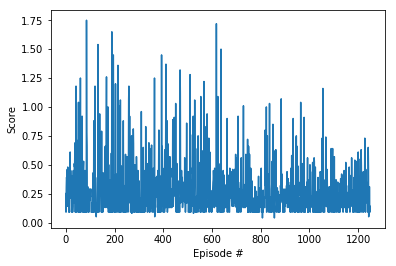

Episode 1251	Average Score: 0.23Maxi 5
Episode 1252	Average Score: 0.23Maxi 2
Episode 1253	Average Score: 0.23Maxi 2
Episode 1254	Average Score: 0.23Maxi 7
Episode 1255	Average Score: 0.23Maxi 2
Episode 1256	Average Score: 0.23Maxi 2
Episode 1257	Average Score: 0.23Maxi 3
Episode 1258	Average Score: 0.23Maxi 2
Episode 1259	Average Score: 0.23Maxi 2
Episode 1260	Average Score: 0.23Maxi 2
Episode 1260	Average Score: 0.23


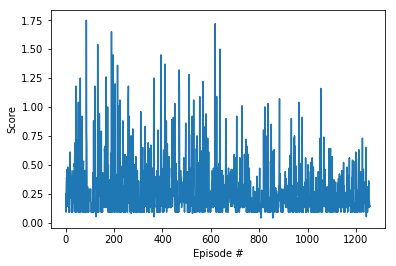

Episode 1261	Average Score: 0.23Maxi 2
Episode 1262	Average Score: 0.23Maxi 4
Episode 1263	Average Score: 0.23Maxi 1
Episode 1264	Average Score: 0.23Maxi 2
Episode 1265	Average Score: 0.23Maxi 4
Episode 1266	Average Score: 0.23Maxi 2
Episode 1267	Average Score: 0.23Maxi 1
Episode 1268	Average Score: 0.23Maxi 2
Episode 1269	Average Score: 0.23Maxi 6
Episode 1270	Average Score: 0.23Maxi 4
Episode 1270	Average Score: 0.23


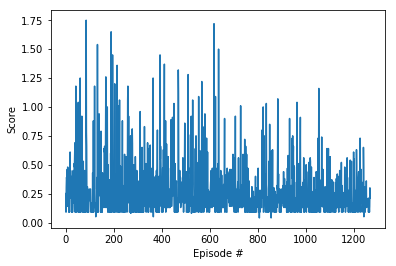

Episode 1271	Average Score: 0.23Maxi 7
Episode 1272	Average Score: 0.23Maxi 3
Episode 1273	Average Score: 0.23Maxi 3
Episode 1274	Average Score: 0.23Maxi 2
Episode 1275	Average Score: 0.23Maxi 6
Episode 1276	Average Score: 0.23Maxi 6
Episode 1277	Average Score: 0.23Maxi 1
Episode 1278	Average Score: 0.23Maxi 2
Episode 1279	Average Score: 0.23Maxi 3
Episode 1280	Average Score: 0.23Maxi 3
Episode 1280	Average Score: 0.23


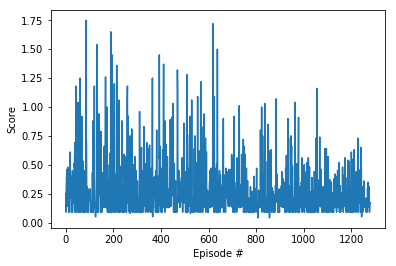

Episode 1281	Average Score: 0.23Maxi 2
Episode 1282	Average Score: 0.23Maxi 4
Episode 1283	Average Score: 0.23Maxi 7
Episode 1284	Average Score: 0.23Maxi 3
Episode 1285	Average Score: 0.23Maxi 13
Episode 1286	Average Score: 0.23Maxi 1
Episode 1287	Average Score: 0.22Maxi 4
Episode 1288	Average Score: 0.23Maxi 3
Episode 1289	Average Score: 0.23Maxi 4
Episode 1290	Average Score: 0.22Maxi 1
Episode 1290	Average Score: 0.22


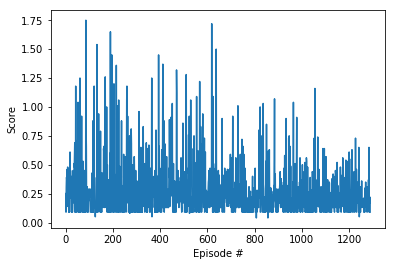

Episode 1291	Average Score: 0.22Maxi 3
Episode 1292	Average Score: 0.22Maxi 5
Episode 1293	Average Score: 0.22Maxi 1
Episode 1294	Average Score: 0.22Maxi 3
Episode 1295	Average Score: 0.22Maxi 2
Episode 1296	Average Score: 0.22Maxi 2
Episode 1297	Average Score: 0.22Maxi 3
Episode 1298	Average Score: 0.22Maxi 2
Episode 1299	Average Score: 0.22Maxi 1
Episode 1300	Average Score: 0.22Maxi 7
Episode 1300	Average Score: 0.22


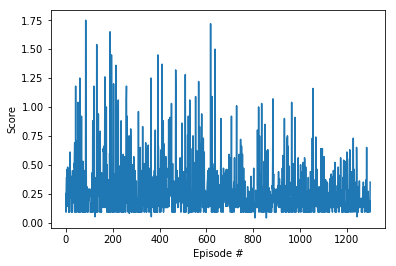

Episode 1300	Average Score: 0.22


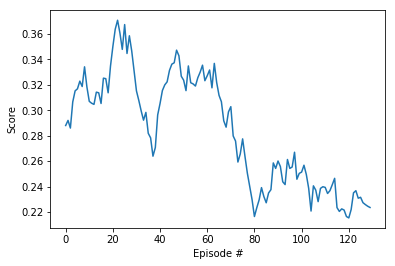

Episode 1301	Average Score: 0.22Maxi 15
Episode 1302	Average Score: 0.23Maxi 2
Episode 1303	Average Score: 0.22Maxi 6
Episode 1304	Average Score: 0.22Maxi 3
Episode 1305	Average Score: 0.22Maxi 2
Episode 1306	Average Score: 0.22Maxi 1
Episode 1307	Average Score: 0.22Maxi 2
Episode 1308	Average Score: 0.22Maxi 3
Episode 1309	Average Score: 0.22Maxi 2
Episode 1310	Average Score: 0.22Maxi 1
Episode 1310	Average Score: 0.22


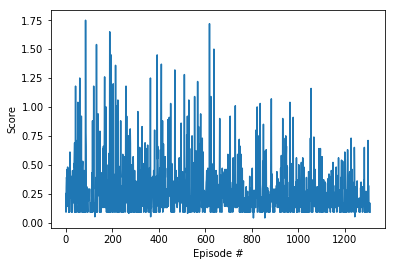

Episode 1311	Average Score: 0.22Maxi 2
Episode 1312	Average Score: 0.22Maxi 1
Episode 1313	Average Score: 0.21Maxi 2
Episode 1314	Average Score: 0.21Maxi 2
Episode 1315	Average Score: 0.21Maxi 4
Episode 1316	Average Score: 0.21Maxi 3
Episode 1317	Average Score: 0.21Maxi 2
Episode 1318	Average Score: 0.21Maxi 5
Episode 1319	Average Score: 0.22Maxi 11
Episode 1320	Average Score: 0.22Maxi 14
Episode 1320	Average Score: 0.22


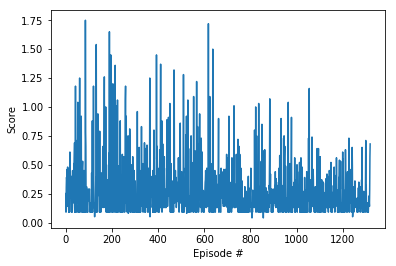

Episode 1321	Average Score: 0.22Maxi 1
Episode 1322	Average Score: 0.21Maxi 3
Episode 1323	Average Score: 0.22Maxi 12
Episode 1324	Average Score: 0.22Maxi 1
Episode 1325	Average Score: 0.22Maxi 6
Episode 1326	Average Score: 0.21Maxi 1
Episode 1327	Average Score: 0.21Maxi 3
Episode 1328	Average Score: 0.21Maxi 3
Episode 1329	Average Score: 0.21Maxi 2
Episode 1330	Average Score: 0.21Maxi 9
Episode 1330	Average Score: 0.21


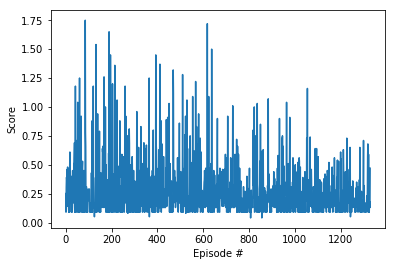

Episode 1331	Average Score: 0.21Maxi 7
Episode 1332	Average Score: 0.21Maxi 2
Episode 1333	Average Score: 0.21Maxi 3
Episode 1334	Average Score: 0.21Maxi 5
Episode 1335	Average Score: 0.21Maxi 3
Episode 1336	Average Score: 0.20Maxi 1
Episode 1337	Average Score: 0.20Maxi 1
Episode 1338	Average Score: 0.20Maxi 5
Episode 1339	Average Score: 0.20Maxi 2
Episode 1340	Average Score: 0.20Maxi 4
Episode 1340	Average Score: 0.20


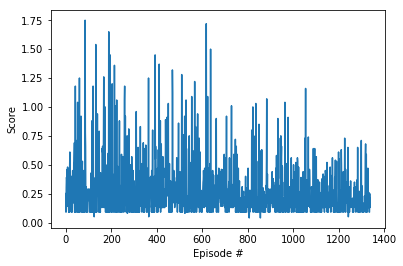

Episode 1341	Average Score: 0.21Maxi 5
Episode 1342	Average Score: 0.20Maxi 3
Episode 1343	Average Score: 0.20Maxi 10
Episode 1344	Average Score: 0.20Maxi 2
Episode 1345	Average Score: 0.21Maxi 6
Episode 1346	Average Score: 0.21Maxi 4
Episode 1347	Average Score: 0.20Maxi 2
Episode 1348	Average Score: 0.20Maxi 1
Episode 1349	Average Score: 0.20Maxi 2
Episode 1350	Average Score: 0.21Maxi 9
Episode 1350	Average Score: 0.21


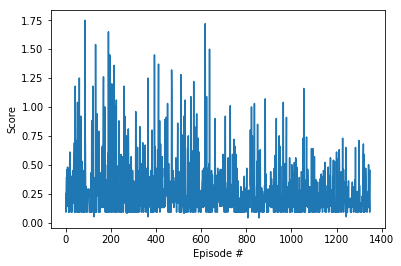

Episode 1351	Average Score: 0.21Maxi 1
Episode 1352	Average Score: 0.21Maxi 10
Episode 1353	Average Score: 0.21Maxi 1
Episode 1354	Average Score: 0.21Maxi 12
Episode 1355	Average Score: 0.21Maxi 8
Episode 1356	Average Score: 0.22Maxi 7
Episode 1357	Average Score: 0.22Maxi 3
Episode 1358	Average Score: 0.22Maxi 2
Episode 1359	Average Score: 0.22Maxi 2
Episode 1360	Average Score: 0.22Maxi 7
Episode 1360	Average Score: 0.22


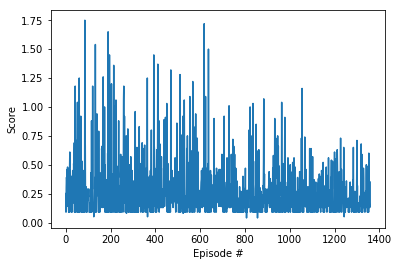

Episode 1361	Average Score: 0.22Maxi 6
Episode 1362	Average Score: 0.22Maxi 3
Episode 1363	Average Score: 0.22Maxi 1
Episode 1364	Average Score: 0.22Maxi 6
Episode 1365	Average Score: 0.22Maxi 11
Episode 1366	Average Score: 0.22Maxi 4
Episode 1367	Average Score: 0.23Maxi 6
Episode 1368	Average Score: 0.23Maxi 2
Episode 1369	Average Score: 0.23Maxi 3
Episode 1370	Average Score: 0.22Maxi 1
Episode 1370	Average Score: 0.22


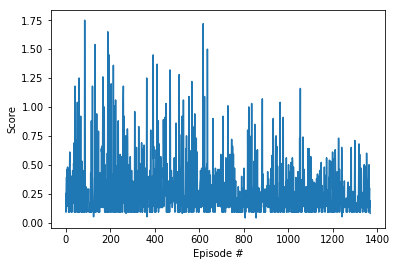

Episode 1371	Average Score: 0.22Maxi 3
Episode 1372	Average Score: 0.22Maxi 4
Episode 1373	Average Score: 0.22Maxi 3
Episode 1374	Average Score: 0.23Maxi 6
Episode 1375	Average Score: 0.22Maxi 1
Episode 1376	Average Score: 0.22Maxi 5
Episode 1377	Average Score: 0.22Maxi 1
Episode 1378	Average Score: 0.22Maxi 4
Episode 1379	Average Score: 0.22Maxi 6
Episode 1380	Average Score: 0.23Maxi 5
Episode 1380	Average Score: 0.23


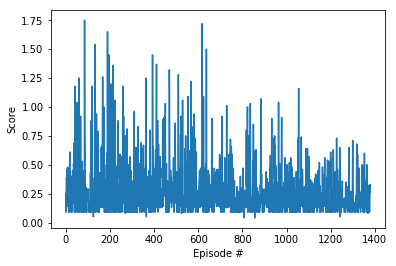

Episode 1381	Average Score: 0.23Maxi 1
Episode 1382	Average Score: 0.22Maxi 1
Episode 1383	Average Score: 0.22Maxi 3
Episode 1384	Average Score: 0.22Maxi 1
Episode 1385	Average Score: 0.22Maxi 1
Episode 1386	Average Score: 0.22Maxi 6
Episode 1387	Average Score: 0.22Maxi 1
Episode 1388	Average Score: 0.22Maxi 9
Episode 1389	Average Score: 0.22Maxi 6
Episode 1390	Average Score: 0.22Maxi 9
Episode 1390	Average Score: 0.22


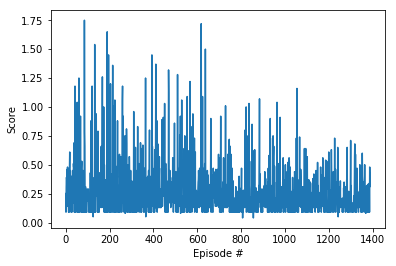

Episode 1391	Average Score: 0.23Maxi 9
Episode 1392	Average Score: 0.23Maxi 2
Episode 1393	Average Score: 0.23Maxi 9
Episode 1394	Average Score: 0.23Maxi 5
Episode 1395	Average Score: 0.23Maxi 2
Episode 1396	Average Score: 0.23Maxi 3
Episode 1397	Average Score: 0.23Maxi 4
Episode 1398	Average Score: 0.23Maxi 1
Episode 1399	Average Score: 0.23Maxi 5
Episode 1400	Average Score: 0.23Maxi 4
Episode 1400	Average Score: 0.23


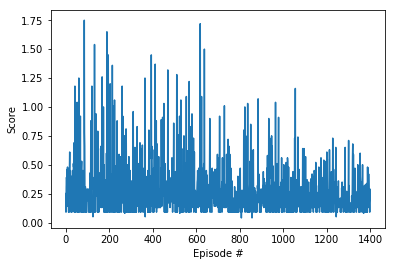

Episode 1400	Average Score: 0.23


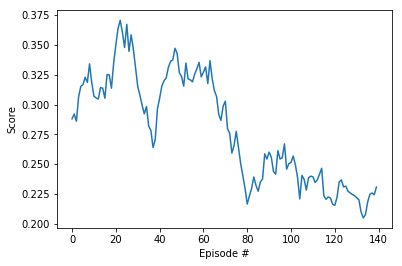

Episode 1401	Average Score: 0.23Maxi 9
Episode 1402	Average Score: 0.23Maxi 1
Episode 1403	Average Score: 0.23Maxi 5
Episode 1404	Average Score: 0.23Maxi 1
Episode 1405	Average Score: 0.23Maxi 10
Episode 1406	Average Score: 0.23Maxi 1
Episode 1407	Average Score: 0.23Maxi 3
Episode 1408	Average Score: 0.23Maxi 2
Episode 1409	Average Score: 0.23Maxi 5
Episode 1410	Average Score: 0.23Maxi 3
Episode 1410	Average Score: 0.23


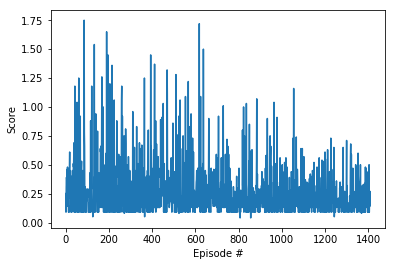

Episode 1411	Average Score: 0.23Maxi 2
Episode 1412	Average Score: 0.23Maxi 1
Episode 1413	Average Score: 0.23Maxi 2
Episode 1414	Average Score: 0.23Maxi 1
Episode 1415	Average Score: 0.23Maxi 5
Episode 1416	Average Score: 0.23Maxi 1
Episode 1417	Average Score: 0.23Maxi 2
Episode 1418	Average Score: 0.23Maxi 1
Episode 1419	Average Score: 0.23Maxi 2
Episode 1420	Average Score: 0.22Maxi 6
Episode 1420	Average Score: 0.22


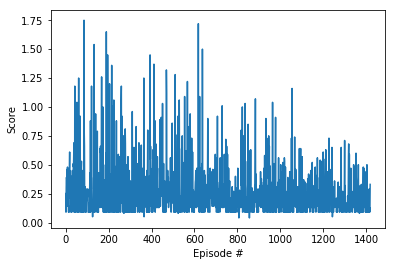

Episode 1421	Average Score: 0.22Maxi 1
Episode 1422	Average Score: 0.23Maxi 16
Episode 1423	Average Score: 0.23Maxi 12
Episode 1424	Average Score: 0.23Maxi 1
Episode 1425	Average Score: 0.23Maxi 5
Episode 1426	Average Score: 0.23Maxi 3
Episode 1427	Average Score: 0.23Maxi 1
Episode 1428	Average Score: 0.23Maxi 2
Episode 1429	Average Score: 0.23Maxi 4
Episode 1430	Average Score: 0.23Maxi 5
Episode 1430	Average Score: 0.23


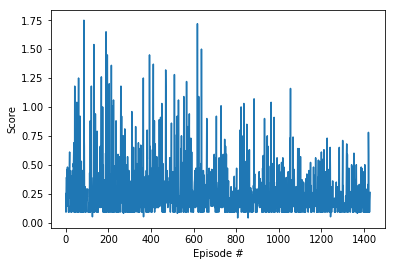

Episode 1431	Average Score: 0.22Maxi 6
Episode 1432	Average Score: 0.23Maxi 11
Episode 1433	Average Score: 0.23Maxi 3
Episode 1434	Average Score: 0.23Maxi 4
Episode 1435	Average Score: 0.23Maxi 3
Episode 1436	Average Score: 0.23Maxi 7
Episode 1437	Average Score: 0.23Maxi 7
Episode 1438	Average Score: 0.23Maxi 6
Episode 1439	Average Score: 0.24Maxi 3
Episode 1440	Average Score: 0.24Maxi 21
Episode 1440	Average Score: 0.24


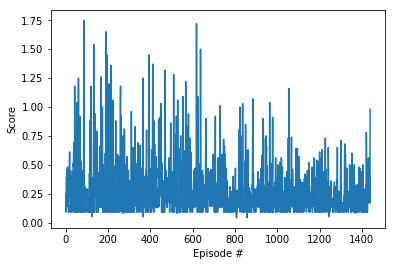

Episode 1441	Average Score: 0.24Maxi 1
Episode 1442	Average Score: 0.24Maxi 2
Episode 1443	Average Score: 0.24Maxi 2
Episode 1444	Average Score: 0.24Maxi 3
Episode 1445	Average Score: 0.24Maxi 2
Episode 1446	Average Score: 0.24Maxi 2
Episode 1447	Average Score: 0.24Maxi 4
Episode 1448	Average Score: 0.24Maxi 7
Episode 1449	Average Score: 0.24Maxi 1
Episode 1450	Average Score: 0.24Maxi 8
Episode 1450	Average Score: 0.24


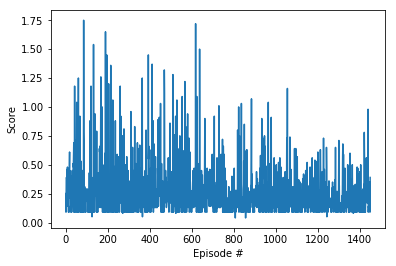

Episode 1451	Average Score: 0.24Maxi 2
Episode 1452	Average Score: 0.23Maxi 2
Episode 1453	Average Score: 0.24Maxi 5
Episode 1454	Average Score: 0.23Maxi 1
Episode 1455	Average Score: 0.23Maxi 3
Episode 1456	Average Score: 0.23Maxi 5
Episode 1457	Average Score: 0.23Maxi 3
Episode 1458	Average Score: 0.23Maxi 3
Episode 1459	Average Score: 0.23Maxi 4
Episode 1460	Average Score: 0.23Maxi 7
Episode 1460	Average Score: 0.23


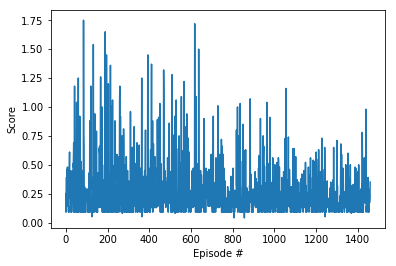

Episode 1461	Average Score: 0.24Maxi 24
Episode 1462	Average Score: 0.24Maxi 1
Episode 1463	Average Score: 0.24Maxi 1
Episode 1464	Average Score: 0.24Maxi 10
Episode 1465	Average Score: 0.23Maxi 2
Episode 1466	Average Score: 0.23Maxi 2
Episode 1467	Average Score: 0.23Maxi 3
Episode 1468	Average Score: 0.23Maxi 4
Episode 1469	Average Score: 0.23Maxi 2
Episode 1470	Average Score: 0.23Maxi 3
Episode 1470	Average Score: 0.23


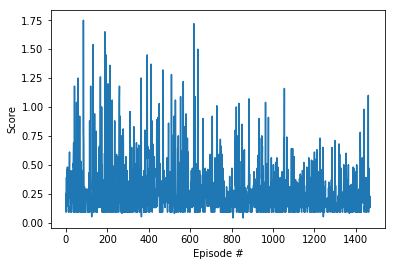

Episode 1471	Average Score: 0.23Maxi 2
Episode 1472	Average Score: 0.23Maxi 2
Episode 1473	Average Score: 0.24Maxi 14
Episode 1474	Average Score: 0.24Maxi 1
Episode 1475	Average Score: 0.24Maxi 20
Episode 1476	Average Score: 0.24Maxi 1
Episode 1477	Average Score: 0.24Maxi 3
Episode 1478	Average Score: 0.24Maxi 2
Episode 1479	Average Score: 0.24Maxi 7
Episode 1480	Average Score: 0.25Maxi 11
Episode 1480	Average Score: 0.25


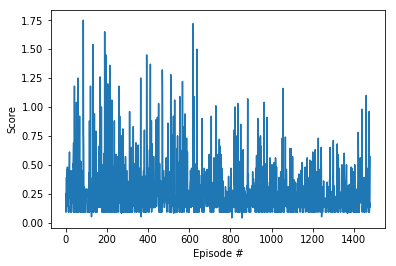

Episode 1481	Average Score: 0.25Maxi 3
Episode 1482	Average Score: 0.25Maxi 7
Episode 1483	Average Score: 0.25Maxi 1
Episode 1484	Average Score: 0.25Maxi 2
Episode 1485	Average Score: 0.25Maxi 2
Episode 1486	Average Score: 0.25Maxi 3
Episode 1487	Average Score: 0.25Maxi 2
Episode 1488	Average Score: 0.25Maxi 4
Episode 1489	Average Score: 0.24Maxi 1
Episode 1490	Average Score: 0.24Maxi 7
Episode 1490	Average Score: 0.24


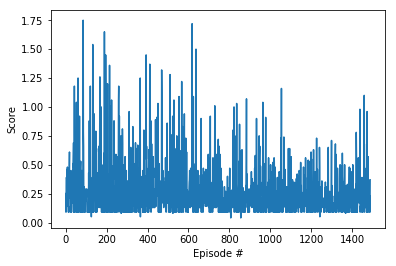

Episode 1491	Average Score: 0.24Maxi 2
Episode 1492	Average Score: 0.24Maxi 2
Episode 1493	Average Score: 0.24Maxi 9
Episode 1494	Average Score: 0.24Maxi 7
Episode 1495	Average Score: 0.24Maxi 4
Episode 1496	Average Score: 0.25Maxi 8
Episode 1497	Average Score: 0.24Maxi 2
Episode 1498	Average Score: 0.24Maxi 1
Episode 1499	Average Score: 0.24Maxi 2
Episode 1500	Average Score: 0.24Maxi 5
Episode 1500	Average Score: 0.24


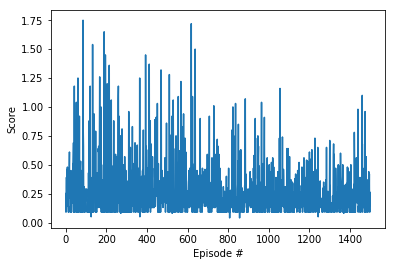

Episode 1500	Average Score: 0.24


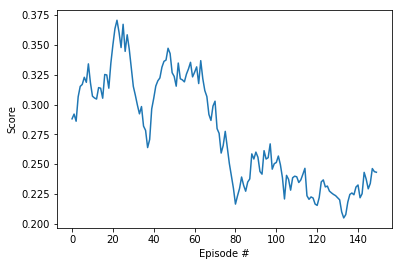

Episode 1501	Average Score: 0.24Maxi 1
Episode 1502	Average Score: 0.24Maxi 1
Episode 1503	Average Score: 0.24Maxi 10
Episode 1504	Average Score: 0.24Maxi 1
Episode 1505	Average Score: 0.24Maxi 2
Episode 1506	Average Score: 0.24Maxi 2
Episode 1507	Average Score: 0.24Maxi 12
Episode 1508	Average Score: 0.24Maxi 1
Episode 1509	Average Score: 0.24Maxi 2
Episode 1510	Average Score: 0.24Maxi 9
Episode 1510	Average Score: 0.24


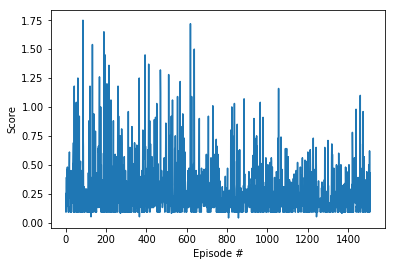

Episode 1511	Average Score: 0.25Maxi 14
Episode 1512	Average Score: 0.25Maxi 9
Episode 1513	Average Score: 0.25Maxi 2
Episode 1514	Average Score: 0.26Maxi 12
Episode 1515	Average Score: 0.26Maxi 1
Episode 1516	Average Score: 0.26Maxi 2
Episode 1517	Average Score: 0.26Maxi 1
Episode 1518	Average Score: 0.26Maxi 1
Episode 1519	Average Score: 0.26Maxi 4
Episode 1520	Average Score: 0.25Maxi 2
Episode 1520	Average Score: 0.25


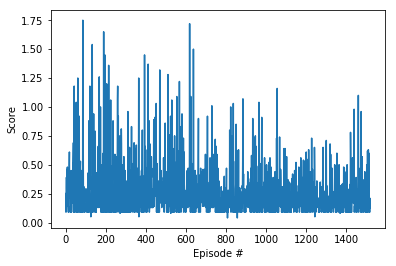

Episode 1521	Average Score: 0.25Maxi 2
Episode 1522	Average Score: 0.25Maxi 2
Episode 1523	Average Score: 0.24Maxi 3
Episode 1524	Average Score: 0.25Maxi 5
Episode 1525	Average Score: 0.25Maxi 3
Episode 1526	Average Score: 0.25Maxi 3
Episode 1527	Average Score: 0.25Maxi 3
Episode 1528	Average Score: 0.25Maxi 3
Episode 1529	Average Score: 0.25Maxi 2
Episode 1530	Average Score: 0.25Maxi 4
Episode 1530	Average Score: 0.25


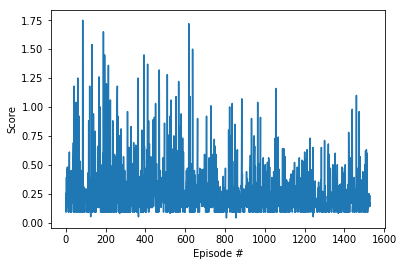

Episode 1531	Average Score: 0.24Maxi 4
Episode 1532	Average Score: 0.24Maxi 2
Episode 1533	Average Score: 0.24Maxi 5
Episode 1534	Average Score: 0.24Maxi 1
Episode 1535	Average Score: 0.24Maxi 5
Episode 1536	Average Score: 0.24Maxi 2
Episode 1537	Average Score: 0.24Maxi 6
Episode 1538	Average Score: 0.24Maxi 4
Episode 1539	Average Score: 0.24Maxi 10
Episode 1540	Average Score: 0.23Maxi 3
Episode 1540	Average Score: 0.23


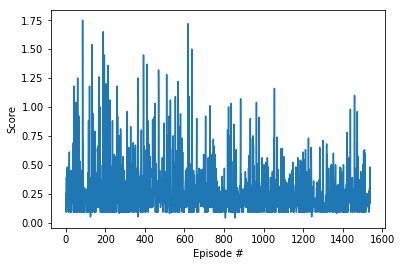

Episode 1541	Average Score: 0.23Maxi 2
Episode 1542	Average Score: 0.23Maxi 5
Episode 1543	Average Score: 0.23Maxi 2
Episode 1544	Average Score: 0.23Maxi 2
Episode 1545	Average Score: 0.23Maxi 2
Episode 1546	Average Score: 0.23Maxi 1
Episode 1547	Average Score: 0.24Maxi 12
Episode 1548	Average Score: 0.24Maxi 6
Episode 1549	Average Score: 0.24Maxi 4
Episode 1550	Average Score: 0.23Maxi 2
Episode 1550	Average Score: 0.23


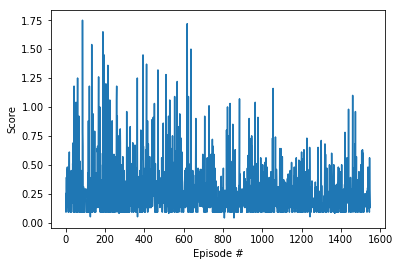

Episode 1551	Average Score: 0.23Maxi 3
Episode 1552	Average Score: 0.23Maxi 2
Episode 1553	Average Score: 0.23Maxi 1
Episode 1554	Average Score: 0.23Maxi 3
Episode 1555	Average Score: 0.23Maxi 4
Episode 1556	Average Score: 0.23Maxi 2
Episode 1557	Average Score: 0.23Maxi 5
Episode 1558	Average Score: 0.23Maxi 6
Episode 1559	Average Score: 0.23Maxi 2
Episode 1560	Average Score: 0.23Maxi 4
Episode 1560	Average Score: 0.23


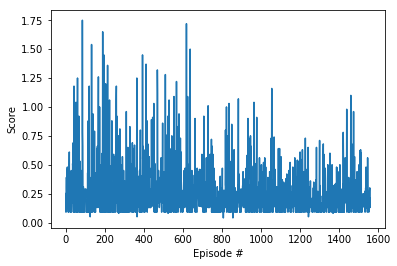

Episode 1561	Average Score: 0.22Maxi 2
Episode 1562	Average Score: 0.22Maxi 4
Episode 1563	Average Score: 0.22Maxi 3
Episode 1564	Average Score: 0.22Maxi 1
Episode 1565	Average Score: 0.22Maxi 4
Episode 1566	Average Score: 0.22Maxi 1
Episode 1567	Average Score: 0.22Maxi 2
Episode 1568	Average Score: 0.22Maxi 1
Episode 1569	Average Score: 0.22Maxi 2
Episode 1570	Average Score: 0.22Maxi 13
Episode 1570	Average Score: 0.22


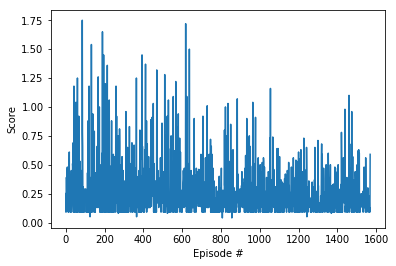

Episode 1571	Average Score: 0.22Maxi 1
Episode 1572	Average Score: 0.22Maxi 1
Episode 1573	Average Score: 0.22Maxi 6
Episode 1574	Average Score: 0.22Maxi 2
Episode 1575	Average Score: 0.21Maxi 4
Episode 1576	Average Score: 0.21Maxi 1
Episode 1577	Average Score: 0.21Maxi 4
Episode 1578	Average Score: 0.22Maxi 7
Episode 1579	Average Score: 0.22Maxi 9
Episode 1580	Average Score: 0.21Maxi 1
Episode 1580	Average Score: 0.21


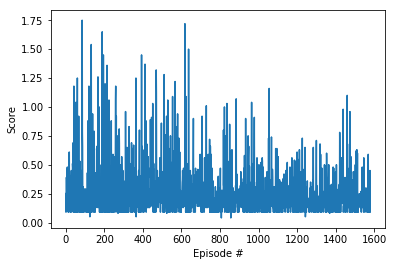

Episode 1581	Average Score: 0.21Maxi 4
Episode 1582	Average Score: 0.21Maxi 10
Episode 1583	Average Score: 0.21Maxi 1
Episode 1584	Average Score: 0.21Maxi 1
Episode 1585	Average Score: 0.21Maxi 2
Episode 1586	Average Score: 0.21Maxi 5
Episode 1587	Average Score: 0.21Maxi 2
Episode 1588	Average Score: 0.21Maxi 5
Episode 1589	Average Score: 0.21Maxi 2
Episode 1590	Average Score: 0.21Maxi 2
Episode 1590	Average Score: 0.21


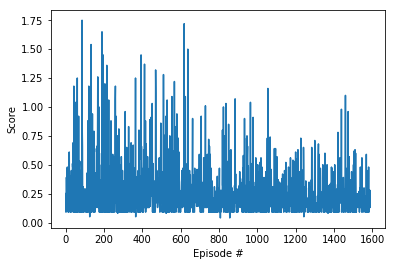

Episode 1591	Average Score: 0.21Maxi 7
Episode 1592	Average Score: 0.21Maxi 1
Episode 1593	Average Score: 0.21Maxi 2
Episode 1594	Average Score: 0.21Maxi 8
Episode 1595	Average Score: 0.21Maxi 6
Episode 1596	Average Score: 0.21Maxi 6
Episode 1597	Average Score: 0.21Maxi 3
Episode 1598	Average Score: 0.22Maxi 12
Episode 1599	Average Score: 0.22Maxi 14
Episode 1600	Average Score: 0.22Maxi 2
Episode 1600	Average Score: 0.22


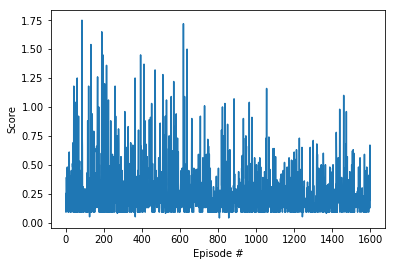

Episode 1600	Average Score: 0.22


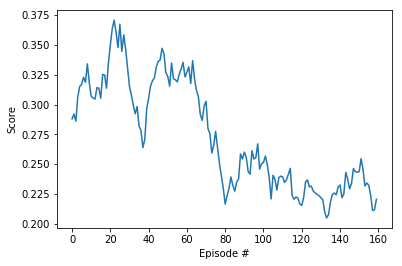

Episode 1601	Average Score: 0.22Maxi 1
Episode 1602	Average Score: 0.22Maxi 9
Episode 1603	Average Score: 0.22Maxi 2
Episode 1604	Average Score: 0.22Maxi 4
Episode 1605	Average Score: 0.22Maxi 10
Episode 1606	Average Score: 0.22Maxi 1
Episode 1607	Average Score: 0.22Maxi 3
Episode 1608	Average Score: 0.22Maxi 1
Episode 1609	Average Score: 0.22Maxi 4
Episode 1610	Average Score: 0.22Maxi 1
Episode 1610	Average Score: 0.22


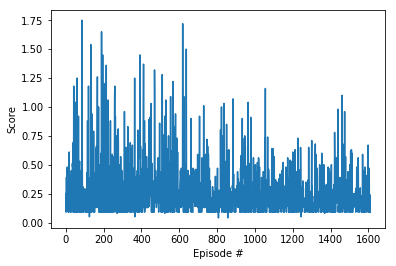

Episode 1611	Average Score: 0.21Maxi 3
Episode 1612	Average Score: 0.21Maxi 3
Episode 1613	Average Score: 0.21Maxi 5
Episode 1614	Average Score: 0.21Maxi 1
Episode 1615	Average Score: 0.21Maxi 1
Episode 1616	Average Score: 0.21Maxi 18
Episode 1617	Average Score: 0.21Maxi 3
Episode 1618	Average Score: 0.21Maxi 2
Episode 1619	Average Score: 0.22Maxi 6
Episode 1620	Average Score: 0.22Maxi 3
Episode 1620	Average Score: 0.22


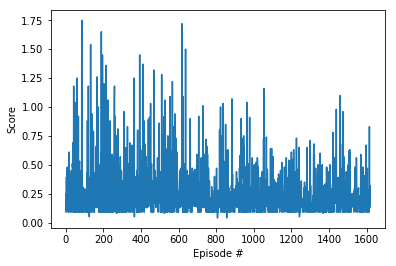

Episode 1621	Average Score: 0.22Maxi 2
Episode 1622	Average Score: 0.22Maxi 3
Episode 1623	Average Score: 0.22Maxi 5
Episode 1624	Average Score: 0.22Maxi 2
Episode 1625	Average Score: 0.22Maxi 2
Episode 1626	Average Score: 0.22Maxi 2
Episode 1627	Average Score: 0.21Maxi 2
Episode 1628	Average Score: 0.21Maxi 2
Episode 1629	Average Score: 0.22Maxi 14
Episode 1630	Average Score: 0.22Maxi 3
Episode 1630	Average Score: 0.22


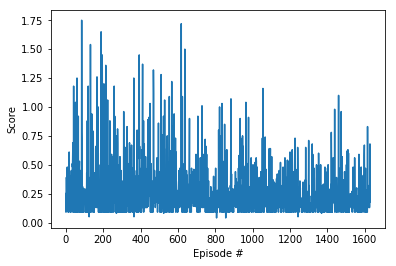

Episode 1631	Average Score: 0.22Maxi 2
Episode 1632	Average Score: 0.22Maxi 1
Episode 1633	Average Score: 0.22Maxi 2
Episode 1634	Average Score: 0.22Maxi 2
Episode 1635	Average Score: 0.22Maxi 1
Episode 1636	Average Score: 0.22Maxi 4
Episode 1637	Average Score: 0.22Maxi 7
Episode 1638	Average Score: 0.22Maxi 4
Episode 1639	Average Score: 0.21Maxi 2
Episode 1640	Average Score: 0.21Maxi 6
Episode 1640	Average Score: 0.21


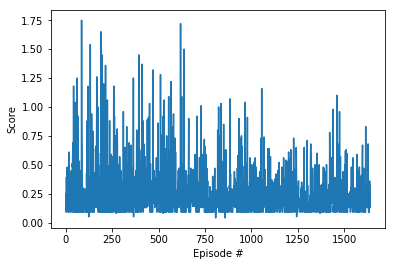

Episode 1641	Average Score: 0.22Maxi 3
Episode 1642	Average Score: 0.21Maxi 2
Episode 1643	Average Score: 0.22Maxi 7
Episode 1644	Average Score: 0.22Maxi 2
Episode 1645	Average Score: 0.22Maxi 3
Episode 1646	Average Score: 0.22Maxi 2
Episode 1647	Average Score: 0.21Maxi 6
Episode 1648	Average Score: 0.21Maxi 2
Episode 1649	Average Score: 0.21Maxi 1
Episode 1650	Average Score: 0.21Maxi 2
Episode 1650	Average Score: 0.21


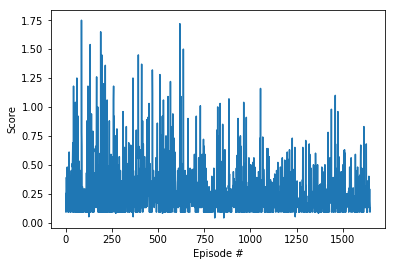

Episode 1651	Average Score: 0.21Maxi 5
Episode 1652	Average Score: 0.21Maxi 2
Episode 1653	Average Score: 0.22Maxi 9
Episode 1654	Average Score: 0.22Maxi 1
Episode 1655	Average Score: 0.22Maxi 2
Episode 1656	Average Score: 0.22Maxi 4
Episode 1657	Average Score: 0.21Maxi 2
Episode 1658	Average Score: 0.21Maxi 6
Episode 1659	Average Score: 0.22Maxi 5
Episode 1660	Average Score: 0.22Maxi 5
Episode 1660	Average Score: 0.22


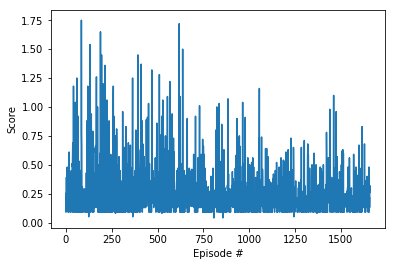

Episode 1661	Average Score: 0.22Maxi 10
Episode 1662	Average Score: 0.22Maxi 2
Episode 1663	Average Score: 0.22Maxi 13
Episode 1664	Average Score: 0.23Maxi 4
Episode 1665	Average Score: 0.22Maxi 1
Episode 1666	Average Score: 0.22Maxi 1
Episode 1667	Average Score: 0.23Maxi 16
Episode 1668	Average Score: 0.23Maxi 2
Episode 1669	Average Score: 0.23Maxi 2
Episode 1670	Average Score: 0.23Maxi 3
Episode 1670	Average Score: 0.23


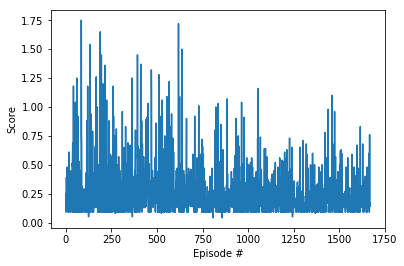

Episode 1671	Average Score: 0.23Maxi 2
Episode 1672	Average Score: 0.23Maxi 2
Episode 1673	Average Score: 0.23Maxi 3
Episode 1674	Average Score: 0.23Maxi 10
Episode 1675	Average Score: 0.23Maxi 2
Episode 1676	Average Score: 0.23Maxi 7
Episode 1677	Average Score: 0.23Maxi 7
Episode 1678	Average Score: 0.23Maxi 2
Episode 1679	Average Score: 0.23Maxi 3
Episode 1680	Average Score: 0.23Maxi 7
Episode 1680	Average Score: 0.23


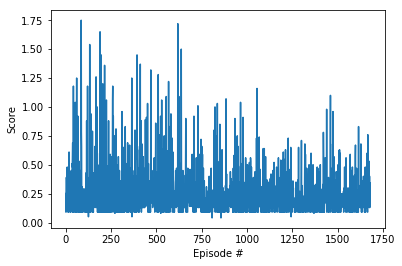

Episode 1681	Average Score: 0.23Maxi 12
Episode 1682	Average Score: 0.23Maxi 2
Episode 1683	Average Score: 0.23Maxi 1
Episode 1684	Average Score: 0.24Maxi 15
Episode 1685	Average Score: 0.24Maxi 1
Episode 1686	Average Score: 0.24Maxi 4
Episode 1687	Average Score: 0.24Maxi 2
Episode 1688	Average Score: 0.24Maxi 4
Episode 1689	Average Score: 0.24Maxi 7
Episode 1690	Average Score: 0.24Maxi 1
Episode 1690	Average Score: 0.24


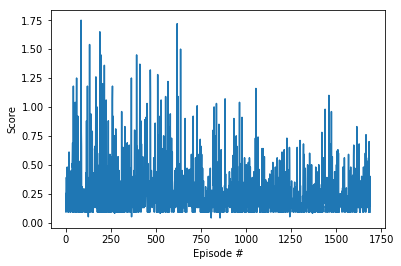

Episode 1691	Average Score: 0.23Maxi 2
Episode 1692	Average Score: 0.24Maxi 2
Episode 1693	Average Score: 0.24Maxi 4
Episode 1694	Average Score: 0.24Maxi 15
Episode 1695	Average Score: 0.24Maxi 6
Episode 1696	Average Score: 0.24Maxi 2
Episode 1697	Average Score: 0.24Maxi 6
Episode 1698	Average Score: 0.24Maxi 6
Episode 1699	Average Score: 0.23Maxi 2
Episode 1700	Average Score: 0.23Maxi 3
Episode 1700	Average Score: 0.23


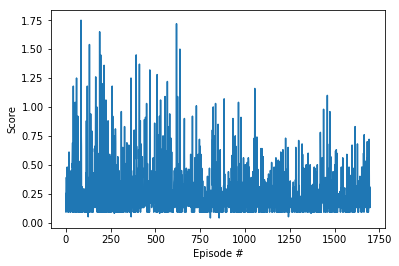

Episode 1700	Average Score: 0.23


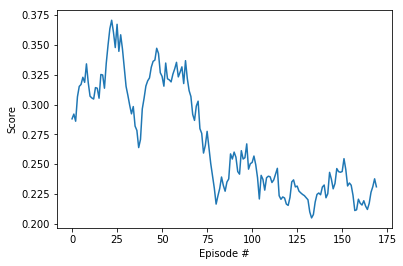

Episode 1701	Average Score: 0.23Maxi 2
Episode 1702	Average Score: 0.23Maxi 2
Episode 1703	Average Score: 0.24Maxi 17
Episode 1704	Average Score: 0.24Maxi 8
Episode 1705	Average Score: 0.24Maxi 8
Episode 1706	Average Score: 0.24Maxi 2
Episode 1707	Average Score: 0.24Maxi 1
Episode 1708	Average Score: 0.24Maxi 6
Episode 1709	Average Score: 0.24Maxi 1
Episode 1710	Average Score: 0.24Maxi 4
Episode 1710	Average Score: 0.24


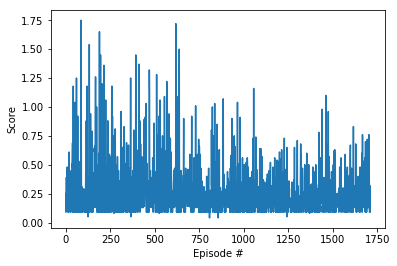

Episode 1711	Average Score: 0.24Maxi 4
Episode 1712	Average Score: 0.24Maxi 1
Episode 1713	Average Score: 0.24Maxi 5
Episode 1714	Average Score: 0.24Maxi 1
Episode 1715	Average Score: 0.24Maxi 4
Episode 1716	Average Score: 0.23Maxi 4
Episode 1717	Average Score: 0.23Maxi 2
Episode 1718	Average Score: 0.23Maxi 4
Episode 1719	Average Score: 0.23Maxi 4
Episode 1720	Average Score: 0.24Maxi 10
Episode 1720	Average Score: 0.24


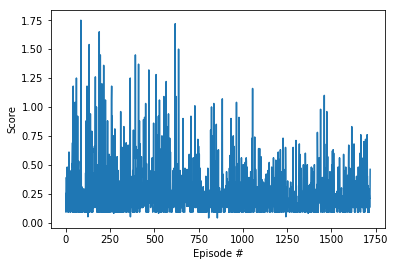

Episode 1721	Average Score: 0.24Maxi 4
Episode 1722	Average Score: 0.24Maxi 10
Episode 1723	Average Score: 0.24Maxi 8
Episode 1724	Average Score: 0.24Maxi 1
Episode 1725	Average Score: 0.24Maxi 1
Episode 1726	Average Score: 0.24Maxi 3
Episode 1727	Average Score: 0.24Maxi 3
Episode 1728	Average Score: 0.24Maxi 3
Episode 1729	Average Score: 0.24Maxi 4
Episode 1730	Average Score: 0.24Maxi 11
Episode 1730	Average Score: 0.24


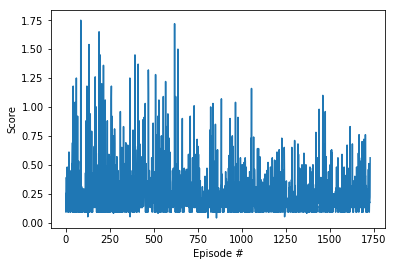

Episode 1731	Average Score: 0.24Maxi 12
Episode 1732	Average Score: 0.25Maxi 11
Episode 1733	Average Score: 0.25Maxi 8
Episode 1734	Average Score: 0.25Maxi 3
Episode 1735	Average Score: 0.25Maxi 2
Episode 1736	Average Score: 0.25Maxi 3
Episode 1737	Average Score: 0.25Maxi 2
Episode 1738	Average Score: 0.25Maxi 5
Episode 1739	Average Score: 0.25Maxi 1
Episode 1740	Average Score: 0.25Maxi 6
Episode 1740	Average Score: 0.25


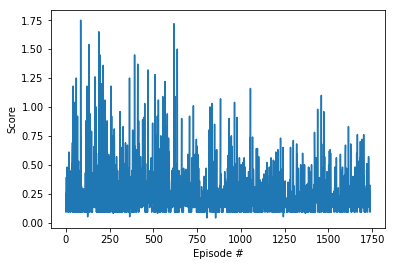

Episode 1741	Average Score: 0.25Maxi 4
Episode 1742	Average Score: 0.25Maxi 1
Episode 1743	Average Score: 0.25Maxi 1
Episode 1744	Average Score: 0.25Maxi 2
Episode 1745	Average Score: 0.25Maxi 1
Episode 1746	Average Score: 0.25Maxi 1
Episode 1747	Average Score: 0.25Maxi 9
Episode 1748	Average Score: 0.25Maxi 5
Episode 1749	Average Score: 0.26Maxi 25
Episode 1750	Average Score: 0.26Maxi 4
Episode 1750	Average Score: 0.26


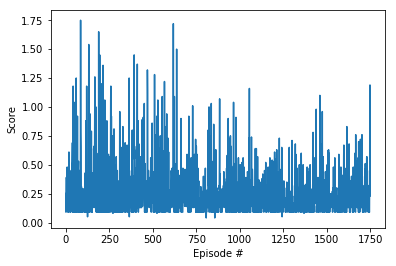

Episode 1751	Average Score: 0.26Maxi 3
Episode 1752	Average Score: 0.26Maxi 1
Episode 1753	Average Score: 0.26Maxi 3
Episode 1754	Average Score: 0.26Maxi 1
Episode 1755	Average Score: 0.26Maxi 5
Episode 1756	Average Score: 0.26Maxi 5
Episode 1757	Average Score: 0.26Maxi 1
Episode 1758	Average Score: 0.26Maxi 1
Episode 1759	Average Score: 0.26Maxi 14
Episode 1760	Average Score: 0.26Maxi 2
Episode 1760	Average Score: 0.26


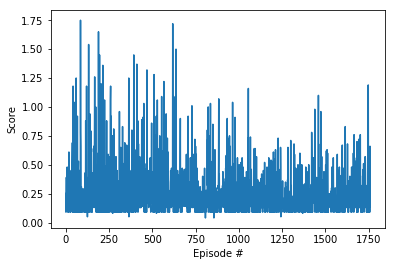

Episode 1761	Average Score: 0.25Maxi 1
Episode 1762	Average Score: 0.25Maxi 2
Episode 1763	Average Score: 0.25Maxi 4
Episode 1764	Average Score: 0.25Maxi 2
Episode 1765	Average Score: 0.25Maxi 7
Episode 1766	Average Score: 0.25Maxi 3
Episode 1767	Average Score: 0.25Maxi 5
Episode 1768	Average Score: 0.25Maxi 4
Episode 1769	Average Score: 0.25Maxi 2
Episode 1770	Average Score: 0.25Maxi 4
Episode 1770	Average Score: 0.25


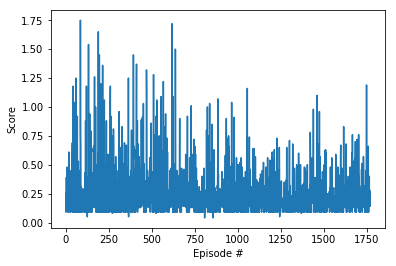

Episode 1771	Average Score: 0.25Maxi 5
Episode 1772	Average Score: 0.25Maxi 5
Episode 1773	Average Score: 0.25Maxi 1
Episode 1774	Average Score: 0.25Maxi 0
Episode 1775	Average Score: 0.25Maxi 5
Episode 1776	Average Score: 0.25Maxi 5
Episode 1777	Average Score: 0.25Maxi 14
Episode 1778	Average Score: 0.25Maxi 2
Episode 1779	Average Score: 0.25Maxi 8
Episode 1780	Average Score: 0.25Maxi 2
Episode 1780	Average Score: 0.25


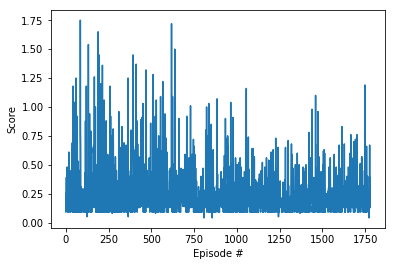

Episode 1781	Average Score: 0.25Maxi 6
Episode 1782	Average Score: 0.25Maxi 5
Episode 1783	Average Score: 0.25Maxi 2
Episode 1784	Average Score: 0.25Maxi 13
Episode 1785	Average Score: 0.25Maxi 6
Episode 1786	Average Score: 0.25Maxi 1
Episode 1787	Average Score: 0.25Maxi 5
Episode 1788	Average Score: 0.25Maxi 2
Episode 1789	Average Score: 0.25Maxi 9
Episode 1790	Average Score: 0.25Maxi 4
Episode 1790	Average Score: 0.25


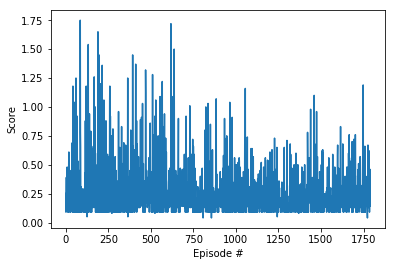

Episode 1791	Average Score: 0.26Maxi 9
Episode 1792	Average Score: 0.25Maxi 1
Episode 1793	Average Score: 0.25Maxi 2
Episode 1794	Average Score: 0.25Maxi 4
Episode 1795	Average Score: 0.25Maxi 5
Episode 1796	Average Score: 0.25Maxi 1
Episode 1797	Average Score: 0.25Maxi 2
Episode 1798	Average Score: 0.24Maxi 2
Episode 1799	Average Score: 0.24Maxi 2
Episode 1800	Average Score: 0.24Maxi 2
Episode 1800	Average Score: 0.24


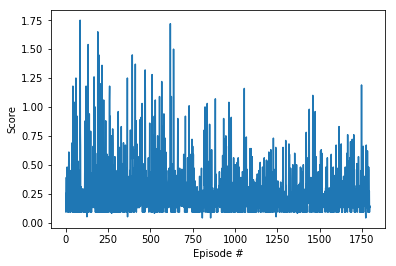

Episode 1800	Average Score: 0.24


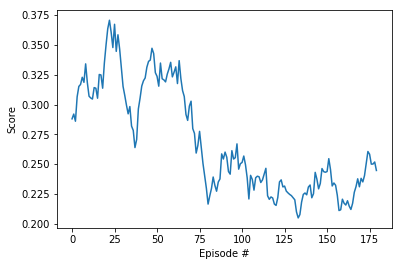

Episode 1801	Average Score: 0.25Maxi 4
Episode 1802	Average Score: 0.25Maxi 2
Episode 1803	Average Score: 0.24Maxi 6
Episode 1804	Average Score: 0.24Maxi 1
Episode 1805	Average Score: 0.23Maxi 1
Episode 1806	Average Score: 0.24Maxi 4
Episode 1807	Average Score: 0.24Maxi 2
Episode 1808	Average Score: 0.24Maxi 5
Episode 1809	Average Score: 0.24Maxi 3
Episode 1810	Average Score: 0.24Maxi 5
Episode 1810	Average Score: 0.24


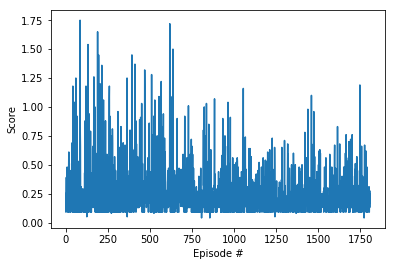

Episode 1811	Average Score: 0.24Maxi 1
Episode 1812	Average Score: 0.24Maxi 9
Episode 1813	Average Score: 0.24Maxi 1
Episode 1814	Average Score: 0.24Maxi 1
Episode 1815	Average Score: 0.24Maxi 2
Episode 1816	Average Score: 0.24Maxi 2
Episode 1817	Average Score: 0.24Maxi 10
Episode 1818	Average Score: 0.24Maxi 2
Episode 1819	Average Score: 0.24Maxi 1
Episode 1820	Average Score: 0.23Maxi 4
Episode 1820	Average Score: 0.23


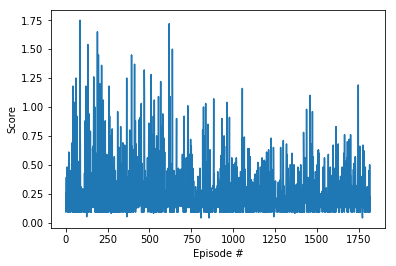

Episode 1821	Average Score: 0.23Maxi 2
Episode 1822	Average Score: 0.23Maxi 2
Episode 1823	Average Score: 0.23Maxi 5
Episode 1824	Average Score: 0.23Maxi 8
Episode 1825	Average Score: 0.24Maxi 10
Episode 1826	Average Score: 0.24Maxi 6
Episode 1827	Average Score: 0.24Maxi 1
Episode 1828	Average Score: 0.24Maxi 7
Episode 1829	Average Score: 0.24Maxi 3
Episode 1830	Average Score: 0.23Maxi 1
Episode 1830	Average Score: 0.23


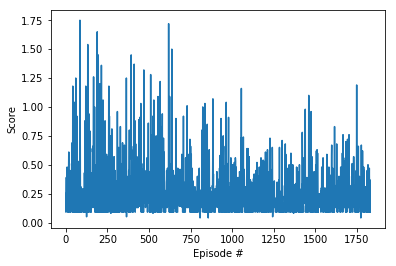

Episode 1831	Average Score: 0.23Maxi 13
Episode 1832	Average Score: 0.23Maxi 3
Episode 1833	Average Score: 0.23Maxi 4
Episode 1834	Average Score: 0.23Maxi 2
Episode 1835	Average Score: 0.23Maxi 7
Episode 1836	Average Score: 0.23Maxi 1
Episode 1837	Average Score: 0.23Maxi 6
Episode 1838	Average Score: 0.23Maxi 1
Episode 1839	Average Score: 0.23Maxi 7
Episode 1840	Average Score: 0.23Maxi 2
Episode 1840	Average Score: 0.23


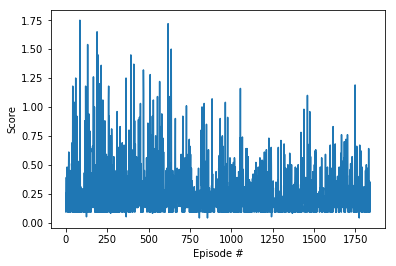

Episode 1841	Average Score: 0.23Maxi 2
Episode 1842	Average Score: 0.23Maxi 2
Episode 1843	Average Score: 0.24Maxi 16
Episode 1844	Average Score: 0.24Maxi 7
Episode 1845	Average Score: 0.24Maxi 1
Episode 1846	Average Score: 0.24Maxi 1
Episode 1847	Average Score: 0.24Maxi 11
Episode 1848	Average Score: 0.24Maxi 8
Episode 1849	Average Score: 0.23Maxi 4
Episode 1850	Average Score: 0.23Maxi 1
Episode 1850	Average Score: 0.23


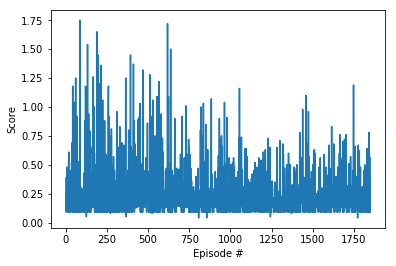

Episode 1851	Average Score: 0.23Maxi 4
Episode 1852	Average Score: 0.23Maxi 6
Episode 1853	Average Score: 0.23Maxi 1
Episode 1854	Average Score: 0.23Maxi 5
Episode 1855	Average Score: 0.23Maxi 2
Episode 1856	Average Score: 0.24Maxi 10
Episode 1857	Average Score: 0.24Maxi 3
Episode 1858	Average Score: 0.24Maxi 1
Episode 1859	Average Score: 0.23Maxi 2
Episode 1860	Average Score: 0.23Maxi 4
Episode 1860	Average Score: 0.23


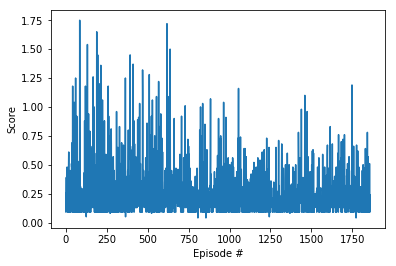

Episode 1861	Average Score: 0.23Maxi 2
Episode 1862	Average Score: 0.23Maxi 5
Episode 1863	Average Score: 0.23Maxi 1
Episode 1864	Average Score: 0.23Maxi 2
Episode 1865	Average Score: 0.23Maxi 3
Episode 1866	Average Score: 0.23Maxi 1
Episode 1867	Average Score: 0.23Maxi 3
Episode 1868	Average Score: 0.23Maxi 3
Episode 1869	Average Score: 0.23Maxi 11
Episode 1870	Average Score: 0.23Maxi 4
Episode 1870	Average Score: 0.23


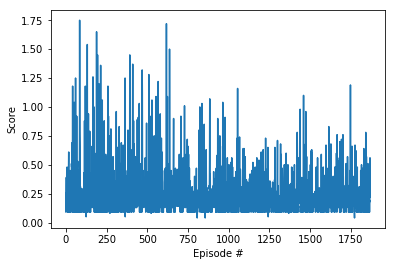

Episode 1871	Average Score: 0.23Maxi 5
Episode 1872	Average Score: 0.23Maxi 1
Episode 1873	Average Score: 0.24Maxi 15
Episode 1874	Average Score: 0.24Maxi 2
Episode 1875	Average Score: 0.24Maxi 1
Episode 1876	Average Score: 0.23Maxi 2
Episode 1877	Average Score: 0.23Maxi 1
Episode 1878	Average Score: 0.23Maxi 16
Episode 1879	Average Score: 0.24Maxi 7
Episode 1880	Average Score: 0.24Maxi 2
Episode 1880	Average Score: 0.24


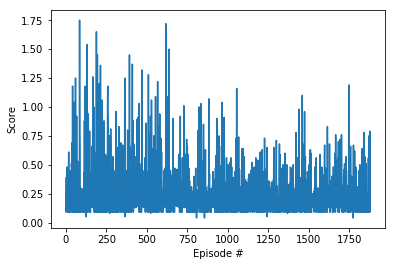

Episode 1881	Average Score: 0.24Maxi 5
Episode 1882	Average Score: 0.23Maxi 2
Episode 1883	Average Score: 0.23Maxi 1
Episode 1884	Average Score: 0.23Maxi 2
Episode 1885	Average Score: 0.23Maxi 2
Episode 1886	Average Score: 0.23Maxi 1
Episode 1887	Average Score: 0.23Maxi 1
Episode 1888	Average Score: 0.22Maxi 2
Episode 1889	Average Score: 0.22Maxi 1
Episode 1890	Average Score: 0.22Maxi 1
Episode 1890	Average Score: 0.22


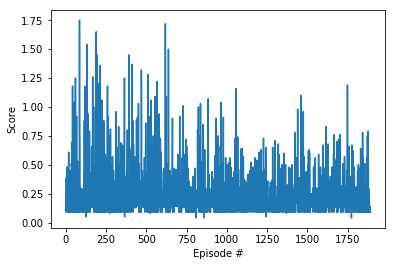

Episode 1891	Average Score: 0.22Maxi 1
Episode 1892	Average Score: 0.22Maxi 2
Episode 1893	Average Score: 0.22Maxi 3
Episode 1894	Average Score: 0.22Maxi 2
Episode 1895	Average Score: 0.22Maxi 7
Episode 1896	Average Score: 0.22Maxi 6
Episode 1897	Average Score: 0.22Maxi 2
Episode 1898	Average Score: 0.22Maxi 2
Episode 1899	Average Score: 0.22Maxi 1
Episode 1900	Average Score: 0.22Maxi 7
Episode 1900	Average Score: 0.22


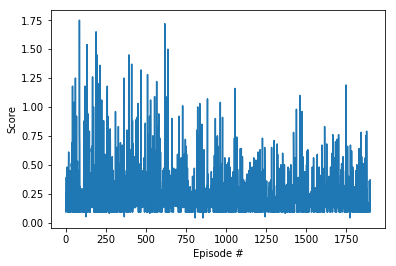

Episode 1900	Average Score: 0.22


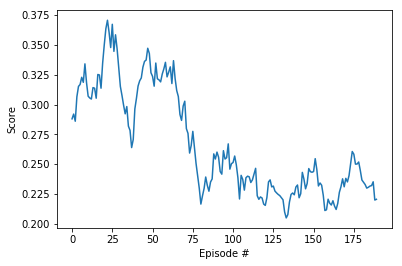

Episode 1901	Average Score: 0.22Maxi 1
Episode 1902	Average Score: 0.22Maxi 4
Episode 1903	Average Score: 0.22Maxi 4
Episode 1904	Average Score: 0.22Maxi 1
Episode 1905	Average Score: 0.22Maxi 4
Episode 1906	Average Score: 0.22Maxi 1
Episode 1907	Average Score: 0.23Maxi 16
Episode 1908	Average Score: 0.22Maxi 1
Episode 1909	Average Score: 0.22Maxi 2
Episode 1910	Average Score: 0.22Maxi 7
Episode 1910	Average Score: 0.22


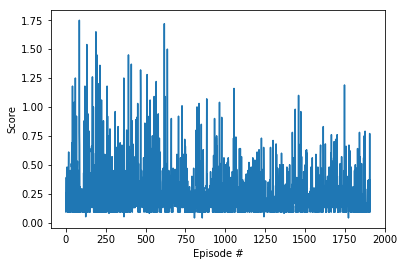

Episode 1911	Average Score: 0.23Maxi 2
Episode 1912	Average Score: 0.22Maxi 8
Episode 1913	Average Score: 0.22Maxi 1
Episode 1914	Average Score: 0.23Maxi 2
Episode 1915	Average Score: 0.23Maxi 16
Episode 1916	Average Score: 0.23Maxi 2
Episode 1917	Average Score: 0.24Maxi 25
Episode 1918	Average Score: 0.24Maxi 8
Episode 1919	Average Score: 0.24Maxi 4
Episode 1920	Average Score: 0.25Maxi 11
Episode 1920	Average Score: 0.25


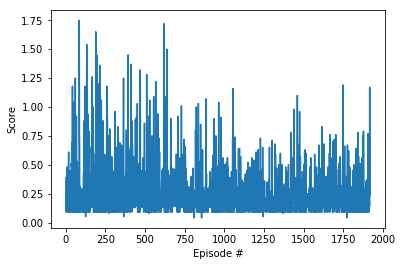

Episode 1921	Average Score: 0.25Maxi 4
Episode 1922	Average Score: 0.25Maxi 2
Episode 1923	Average Score: 0.25Maxi 2
Episode 1924	Average Score: 0.24Maxi 2
Episode 1925	Average Score: 0.24Maxi 2
Episode 1926	Average Score: 0.24Maxi 1
Episode 1927	Average Score: 0.24Maxi 6
Episode 1928	Average Score: 0.24Maxi 4
Episode 1929	Average Score: 0.24Maxi 5
Episode 1930	Average Score: 0.24Maxi 2
Episode 1930	Average Score: 0.24


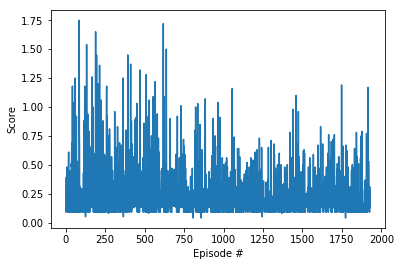

Episode 1931	Average Score: 0.23Maxi 2
Episode 1932	Average Score: 0.24Maxi 8
Episode 1933	Average Score: 0.24Maxi 13
Episode 1934	Average Score: 0.24Maxi 8
Episode 1935	Average Score: 0.24Maxi 2
Episode 1936	Average Score: 0.24Maxi 2
Episode 1937	Average Score: 0.24Maxi 4
Episode 1938	Average Score: 0.24Maxi 6
Episode 1939	Average Score: 0.24Maxi 6
Episode 1940	Average Score: 0.24Maxi 3
Episode 1940	Average Score: 0.24


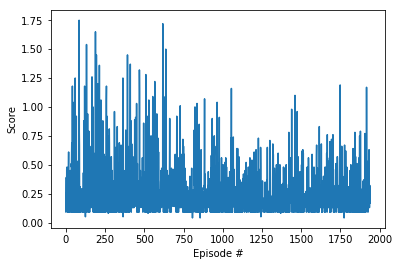

Episode 1941	Average Score: 0.25Maxi 21
Episode 1942	Average Score: 0.25Maxi 2
Episode 1943	Average Score: 0.24Maxi 1
Episode 1944	Average Score: 0.24Maxi 4
Episode 1945	Average Score: 0.24Maxi 4
Episode 1946	Average Score: 0.25Maxi 14
Episode 1947	Average Score: 0.24Maxi 2
Episode 1948	Average Score: 0.24Maxi 4
Episode 1949	Average Score: 0.24Maxi 5
Episode 1950	Average Score: 0.24Maxi 2
Episode 1950	Average Score: 0.24


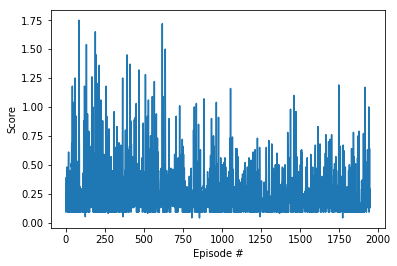

Episode 1951	Average Score: 0.25Maxi 8
Episode 1952	Average Score: 0.24Maxi 2
Episode 1953	Average Score: 0.25Maxi 6
Episode 1954	Average Score: 0.25Maxi 5
Episode 1955	Average Score: 0.25Maxi 1
Episode 1956	Average Score: 0.24Maxi 7
Episode 1957	Average Score: 0.25Maxi 4
Episode 1958	Average Score: 0.25Maxi 1
Episode 1959	Average Score: 0.25Maxi 3
Episode 1960	Average Score: 0.25Maxi 4
Episode 1960	Average Score: 0.25


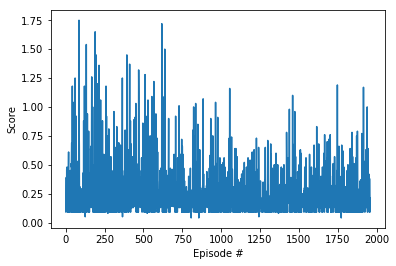

Episode 1961	Average Score: 0.25Maxi 1
Episode 1962	Average Score: 0.24Maxi 2
Episode 1963	Average Score: 0.24Maxi 1
Episode 1964	Average Score: 0.24Maxi 1
Episode 1965	Average Score: 0.25Maxi 7
Episode 1966	Average Score: 0.25Maxi 13
Episode 1967	Average Score: 0.25Maxi 1
Episode 1968	Average Score: 0.25Maxi 3
Episode 1969	Average Score: 0.25Maxi 2
Episode 1970	Average Score: 0.25Maxi 8
Episode 1970	Average Score: 0.25


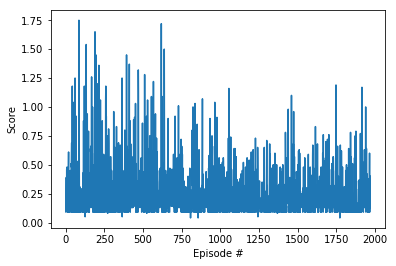

Episode 1971	Average Score: 0.25Maxi 2
Episode 1972	Average Score: 0.25Maxi 6
Episode 1973	Average Score: 0.24Maxi 2
Episode 1974	Average Score: 0.24Maxi 4
Episode 1975	Average Score: 0.24Maxi 4
Episode 1976	Average Score: 0.25Maxi 6
Episode 1977	Average Score: 0.25Maxi 4
Episode 1978	Average Score: 0.24Maxi 8
Episode 1979	Average Score: 0.24Maxi 3
Episode 1980	Average Score: 0.24Maxi 4
Episode 1980	Average Score: 0.24


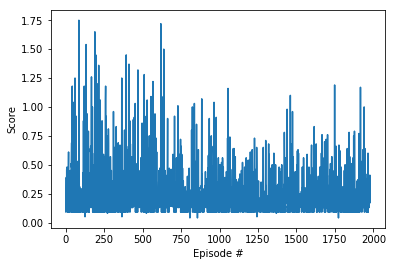

Episode 1981	Average Score: 0.24Maxi 12
Episode 1982	Average Score: 0.24Maxi 2
Episode 1983	Average Score: 0.24Maxi 1
Episode 1984	Average Score: 0.24Maxi 1
Episode 1985	Average Score: 0.24Maxi 2
Episode 1986	Average Score: 0.24Maxi 1
Episode 1987	Average Score: 0.24Maxi 1
Episode 1988	Average Score: 0.24Maxi 4
Episode 1989	Average Score: 0.25Maxi 5
Episode 1990	Average Score: 0.25Maxi 6
Episode 1990	Average Score: 0.25


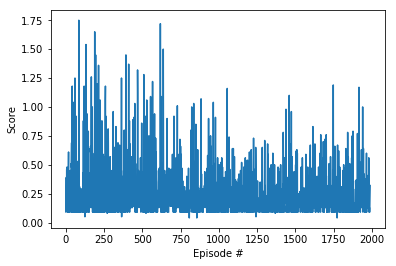

Episode 1991	Average Score: 0.25Maxi 3
Episode 1992	Average Score: 0.25Maxi 1
Episode 1993	Average Score: 0.25Maxi 7
Episode 1994	Average Score: 0.25Maxi 4
Episode 1995	Average Score: 0.25Maxi 1
Episode 1996	Average Score: 0.25Maxi 5
Episode 1997	Average Score: 0.25Maxi 3
Episode 1998	Average Score: 0.25Maxi 12
Episode 1999	Average Score: 0.25Maxi 2

Environment solved in 1900 episodes!	Average Score: 0.25
Episode 2000	Average Score: 0.25Maxi 1
Episode 2000	Average Score: 0.25


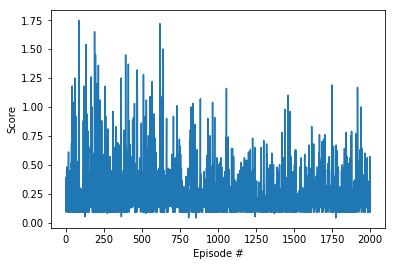

Episode 2000	Average Score: 0.25


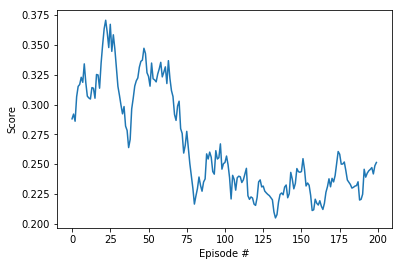

Episode 2001	Average Score: 0.25Maxi 2
Episode 2002	Average Score: 0.25Maxi 5
Episode 2003	Average Score: 0.25Maxi 8
Episode 2004	Average Score: 0.26Maxi 5
Episode 2005	Average Score: 0.26Maxi 3
Episode 2006	Average Score: 0.26Maxi 1
Episode 2007	Average Score: 0.25Maxi 5
Episode 2008	Average Score: 0.25Maxi 2
Episode 2009	Average Score: 0.25Maxi 2
Episode 2010	Average Score: 0.25Maxi 4
Episode 2010	Average Score: 0.25


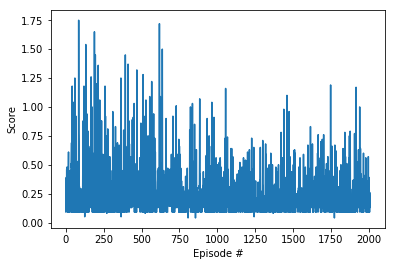

Episode 2011	Average Score: 0.25Maxi 7
Episode 2012	Average Score: 0.25Maxi 2
Episode 2013	Average Score: 0.25Maxi 5
Episode 2014	Average Score: 0.25Maxi 4
Episode 2015	Average Score: 0.25Maxi 10
Episode 2016	Average Score: 0.25Maxi 3
Episode 2017	Average Score: 0.24Maxi 5
Episode 2018	Average Score: 0.24Maxi 4
Episode 2019	Average Score: 0.24Maxi 6
Episode 2020	Average Score: 0.24Maxi 1
Episode 2020	Average Score: 0.24


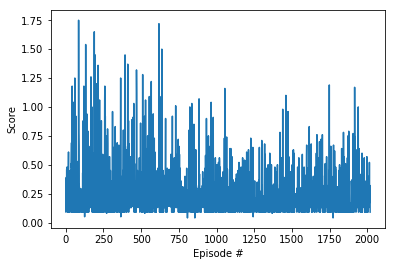

Episode 2021	Average Score: 0.23Maxi 3
Episode 2022	Average Score: 0.24Maxi 19
Episode 2023	Average Score: 0.24Maxi 3
Episode 2024	Average Score: 0.24Maxi 3
Episode 2025	Average Score: 0.24Maxi 3
Episode 2026	Average Score: 0.24Maxi 1
Episode 2027	Average Score: 0.24Maxi 5
Episode 2028	Average Score: 0.25Maxi 10
Episode 2029	Average Score: 0.25Maxi 4
Episode 2030	Average Score: 0.25Maxi 6
Episode 2030	Average Score: 0.25


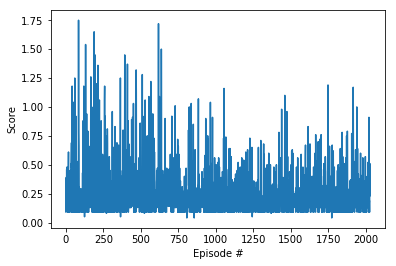

Episode 2031	Average Score: 0.25Maxi 3
Episode 2032	Average Score: 0.24Maxi 1
Episode 2033	Average Score: 0.24Maxi 6
Episode 2034	Average Score: 0.24Maxi 5
Episode 2035	Average Score: 0.24Maxi 2
Episode 2036	Average Score: 0.24Maxi 9
Episode 2037	Average Score: 0.24Maxi 3
Episode 2038	Average Score: 0.24Maxi 6
Episode 2039	Average Score: 0.24Maxi 2
Episode 2040	Average Score: 0.24Maxi 3
Episode 2040	Average Score: 0.24


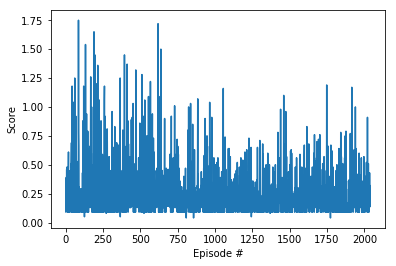

Episode 2041	Average Score: 0.23Maxi 2
Episode 2042	Average Score: 0.23Maxi 3
Episode 2043	Average Score: 0.23Maxi 2
Episode 2044	Average Score: 0.23Maxi 5
Episode 2045	Average Score: 0.24Maxi 10
Episode 2046	Average Score: 0.23Maxi 4
Episode 2047	Average Score: 0.23Maxi 2
Episode 2048	Average Score: 0.23Maxi 6
Episode 2049	Average Score: 0.23Maxi 1
Episode 2050	Average Score: 0.23Maxi 7
Episode 2050	Average Score: 0.23


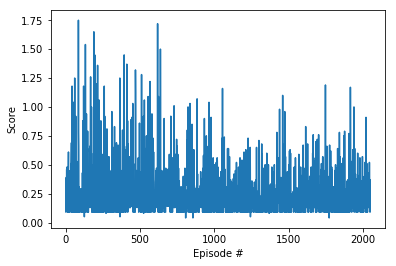

Episode 2051	Average Score: 0.23Maxi 1
Episode 2052	Average Score: 0.24Maxi 12
Episode 2053	Average Score: 0.23Maxi 1
Episode 2054	Average Score: 0.23Maxi 5
Episode 2055	Average Score: 0.23Maxi 2
Episode 2056	Average Score: 0.23Maxi 5
Episode 2057	Average Score: 0.23Maxi 1
Episode 2058	Average Score: 0.23Maxi 1
Episode 2059	Average Score: 0.24Maxi 11
Episode 2060	Average Score: 0.23Maxi 2
Episode 2060	Average Score: 0.23


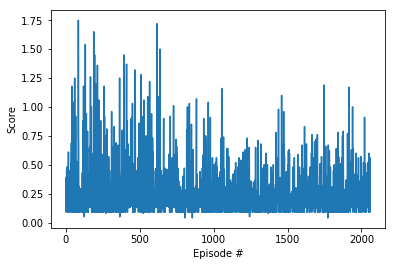

Episode 2061	Average Score: 0.23Maxi 1
Episode 2062	Average Score: 0.23Maxi 2
Episode 2063	Average Score: 0.24Maxi 2
Episode 2064	Average Score: 0.24Maxi 3
Episode 2065	Average Score: 0.23Maxi 2
Episode 2066	Average Score: 0.23Maxi 1
Episode 2067	Average Score: 0.23Maxi 7
Episode 2068	Average Score: 0.23Maxi 2
Episode 2069	Average Score: 0.23Maxi 2
Episode 2070	Average Score: 0.23Maxi 4
Episode 2070	Average Score: 0.23


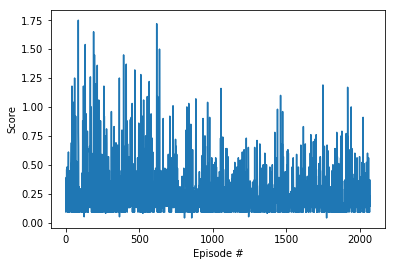

Episode 2071	Average Score: 0.23Maxi 7
Episode 2072	Average Score: 0.23Maxi 1
Episode 2073	Average Score: 0.23Maxi 6
Episode 2074	Average Score: 0.23Maxi 4
Episode 2075	Average Score: 0.23Maxi 9
Episode 2076	Average Score: 0.23Maxi 2
Episode 2077	Average Score: 0.23Maxi 7
Episode 2078	Average Score: 0.23Maxi 1
Episode 2079	Average Score: 0.23Maxi 5
Episode 2080	Average Score: 0.23Maxi 1
Episode 2080	Average Score: 0.23


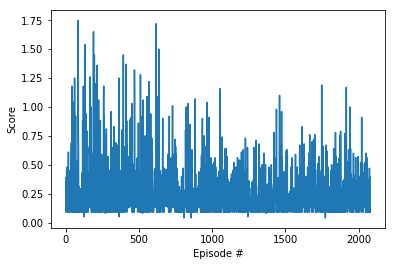

Episode 2081	Average Score: 0.23Maxi 6
Episode 2082	Average Score: 0.23Maxi 1
Episode 2083	Average Score: 0.24Maxi 21
Episode 2084	Average Score: 0.24Maxi 5
Episode 2085	Average Score: 0.24Maxi 4
Episode 2086	Average Score: 0.24Maxi 4
Episode 2087	Average Score: 0.24Maxi 5
Episode 2088	Average Score: 0.24Maxi 1
Episode 2089	Average Score: 0.24Maxi 7
Episode 2090	Average Score: 0.24Maxi 4
Episode 2090	Average Score: 0.24


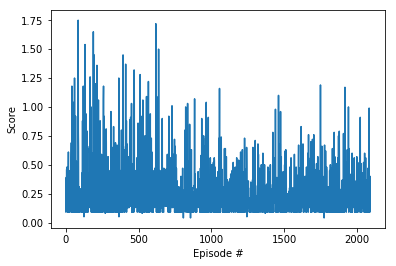

Episode 2091	Average Score: 0.24Maxi 1
Episode 2092	Average Score: 0.24Maxi 9
Episode 2093	Average Score: 0.24Maxi 2
Episode 2094	Average Score: 0.24Maxi 5
Episode 2095	Average Score: 0.25Maxi 7
Episode 2096	Average Score: 0.24Maxi 2
Episode 2097	Average Score: 0.24Maxi 3
Episode 2098	Average Score: 0.24Maxi 9
Episode 2099	Average Score: 0.25Maxi 12
Episode 2100	Average Score: 0.25Maxi 2
Episode 2100	Average Score: 0.25


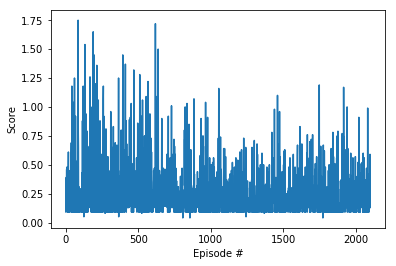

Episode 2100	Average Score: 0.25


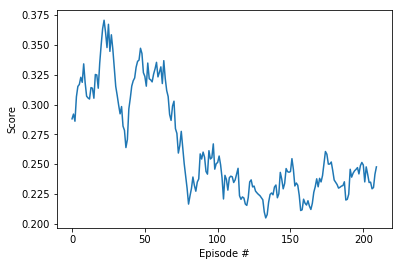

Episode 2101	Average Score: 0.25Maxi 1
Episode 2102	Average Score: 0.25Maxi 2
Episode 2103	Average Score: 0.25Maxi 14
Episode 2104	Average Score: 0.25Maxi 2
Episode 2105	Average Score: 0.25Maxi 6
Episode 2106	Average Score: 0.26Maxi 14
Episode 2107	Average Score: 0.26Maxi 4
Episode 2108	Average Score: 0.26Maxi 2
Episode 2109	Average Score: 0.26Maxi 12
Episode 2110	Average Score: 0.26Maxi 9
Episode 2110	Average Score: 0.26


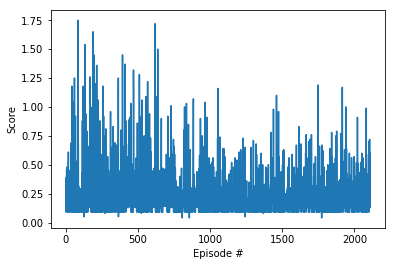

Episode 2111	Average Score: 0.26Maxi 4
Episode 2112	Average Score: 0.26Maxi 4
Episode 2113	Average Score: 0.26Maxi 2
Episode 2114	Average Score: 0.26Maxi 2
Episode 2115	Average Score: 0.26Maxi 6
Episode 2116	Average Score: 0.26Maxi 2
Episode 2117	Average Score: 0.25Maxi 1
Episode 2118	Average Score: 0.25Maxi 1
Episode 2119	Average Score: 0.26Maxi 12
Episode 2120	Average Score: 0.26Maxi 2
Episode 2120	Average Score: 0.26


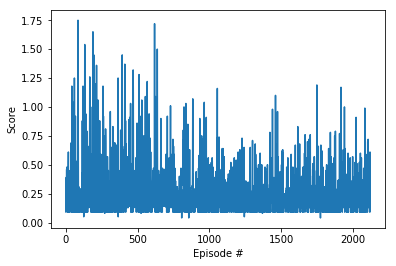

Episode 2121	Average Score: 0.26Maxi 1
Episode 2122	Average Score: 0.25Maxi 1
Episode 2123	Average Score: 0.25Maxi 2
Episode 2124	Average Score: 0.25Maxi 1
Episode 2125	Average Score: 0.25Maxi 8
Episode 2126	Average Score: 0.25Maxi 1
Episode 2127	Average Score: 0.25Maxi 2
Episode 2128	Average Score: 0.24Maxi 1
Episode 2129	Average Score: 0.24Maxi 6
Episode 2130	Average Score: 0.24Maxi 1
Episode 2130	Average Score: 0.24


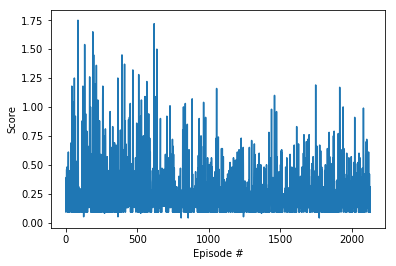

Episode 2131	Average Score: 0.24Maxi 2
Episode 2132	Average Score: 0.24Maxi 5
Episode 2133	Average Score: 0.24Maxi 2
Episode 2134	Average Score: 0.25Maxi 14
Episode 2135	Average Score: 0.24Maxi 1
Episode 2136	Average Score: 0.24Maxi 1
Episode 2137	Average Score: 0.24Maxi 1
Episode 2138	Average Score: 0.24Maxi 2
Episode 2139	Average Score: 0.24Maxi 2
Episode 2140	Average Score: 0.24Maxi 4
Episode 2140	Average Score: 0.24


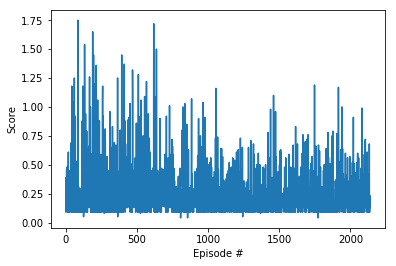

Episode 2141	Average Score: 0.24Maxi 11
Episode 2142	Average Score: 0.24Maxi 5
Episode 2143	Average Score: 0.25Maxi 5
Episode 2144	Average Score: 0.25Maxi 6
Episode 2145	Average Score: 0.25Maxi 9
Episode 2146	Average Score: 0.25Maxi 4
Episode 2147	Average Score: 0.25Maxi 2
Episode 2148	Average Score: 0.24Maxi 4
Episode 2149	Average Score: 0.25Maxi 10
Episode 2150	Average Score: 0.25Maxi 1
Episode 2150	Average Score: 0.25


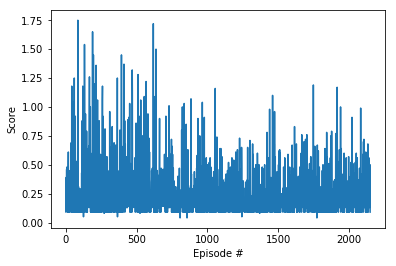

Episode 2151	Average Score: 0.25Maxi 19
Episode 2152	Average Score: 0.25Maxi 3
Episode 2153	Average Score: 0.25Maxi 1
Episode 2154	Average Score: 0.25Maxi 15
Episode 2155	Average Score: 0.25Maxi 4
Episode 2156	Average Score: 0.26Maxi 8
Episode 2157	Average Score: 0.26Maxi 10
Episode 2158	Average Score: 0.26Maxi 9
Episode 2159	Average Score: 0.26Maxi 9
Episode 2160	Average Score: 0.26Maxi 2
Episode 2160	Average Score: 0.26


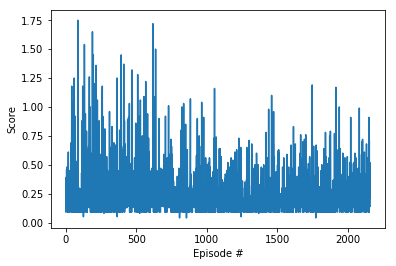

Episode 2161	Average Score: 0.27Maxi 8
Episode 2162	Average Score: 0.27Maxi 2
Episode 2163	Average Score: 0.27Maxi 1
Episode 2164	Average Score: 0.27Maxi 1
Episode 2165	Average Score: 0.27Maxi 7
Episode 2166	Average Score: 0.27Maxi 3
Episode 2167	Average Score: 0.27Maxi 7
Episode 2168	Average Score: 0.27Maxi 3
Episode 2169	Average Score: 0.27Maxi 7
Episode 2170	Average Score: 0.27Maxi 4
Episode 2170	Average Score: 0.27


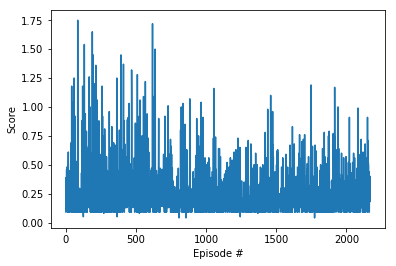

Episode 2171	Average Score: 0.27Maxi 1
Episode 2172	Average Score: 0.27Maxi 1
Episode 2173	Average Score: 0.27Maxi 4
Episode 2174	Average Score: 0.27Maxi 1
Episode 2175	Average Score: 0.26Maxi 1
Episode 2176	Average Score: 0.26Maxi 5
Episode 2177	Average Score: 0.26Maxi 6
Episode 2178	Average Score: 0.27Maxi 8
Episode 2179	Average Score: 0.26Maxi 1
Episode 2180	Average Score: 0.27Maxi 10
Episode 2180	Average Score: 0.27


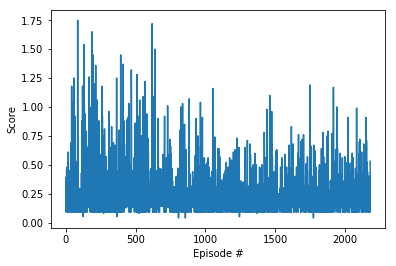

Episode 2181	Average Score: 0.27Maxi 1
Episode 2182	Average Score: 0.27Maxi 3
Episode 2183	Average Score: 0.26Maxi 1
Episode 2184	Average Score: 0.26Maxi 2
Episode 2185	Average Score: 0.26Maxi 3
Episode 2186	Average Score: 0.26Maxi 4
Episode 2187	Average Score: 0.26Maxi 3
Episode 2188	Average Score: 0.26Maxi 13
Episode 2189	Average Score: 0.26Maxi 6
Episode 2190	Average Score: 0.26Maxi 5
Episode 2190	Average Score: 0.26


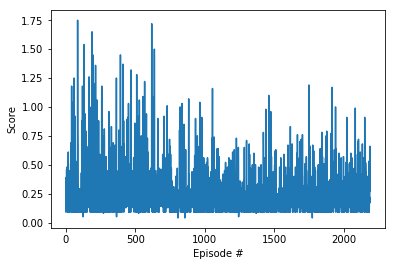

Episode 2191	Average Score: 0.26Maxi 6
Episode 2192	Average Score: 0.26Maxi 9
Episode 2193	Average Score: 0.26Maxi 3
Episode 2194	Average Score: 0.26Maxi 3
Episode 2195	Average Score: 0.26Maxi 2
Episode 2196	Average Score: 0.26Maxi 6
Episode 2197	Average Score: 0.26Maxi 3
Episode 2198	Average Score: 0.26Maxi 2
Episode 2199	Average Score: 0.25Maxi 3
Episode 2200	Average Score: 0.25Maxi 2
Episode 2200	Average Score: 0.25


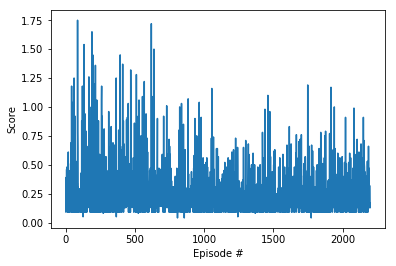

Episode 2200	Average Score: 0.25


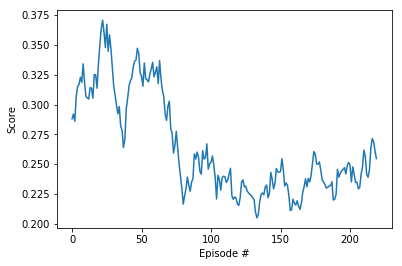

Episode 2201	Average Score: 0.26Maxi 9
Episode 2202	Average Score: 0.26Maxi 1
Episode 2203	Average Score: 0.25Maxi 2
Episode 2204	Average Score: 0.25Maxi 1
Episode 2205	Average Score: 0.25Maxi 9
Episode 2206	Average Score: 0.25Maxi 2
Episode 2207	Average Score: 0.25Maxi 7
Episode 2208	Average Score: 0.25Maxi 3
Episode 2209	Average Score: 0.24Maxi 2
Episode 2210	Average Score: 0.24Maxi 8
Episode 2210	Average Score: 0.24


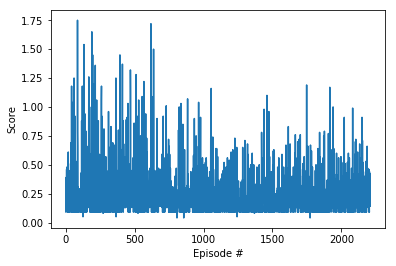

Episode 2211	Average Score: 0.24Maxi 3
Episode 2212	Average Score: 0.24Maxi 3
Episode 2213	Average Score: 0.24Maxi 1
Episode 2214	Average Score: 0.24Maxi 1
Episode 2215	Average Score: 0.24Maxi 1
Episode 2216	Average Score: 0.24Maxi 6
Episode 2217	Average Score: 0.25Maxi 11
Episode 2218	Average Score: 0.25Maxi 9
Episode 2219	Average Score: 0.25Maxi 4
Episode 2220	Average Score: 0.25Maxi 1
Episode 2220	Average Score: 0.25


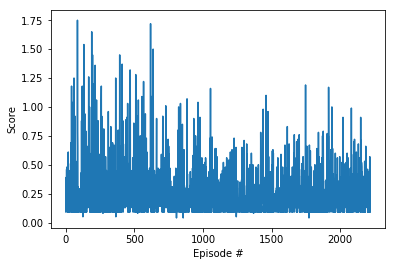

Episode 2221	Average Score: 0.25Maxi 3
Episode 2222	Average Score: 0.25Maxi 2
Episode 2223	Average Score: 0.25Maxi 1
Episode 2224	Average Score: 0.25Maxi 5
Episode 2225	Average Score: 0.25Maxi 2
Episode 2226	Average Score: 0.25Maxi 4
Episode 2227	Average Score: 0.25Maxi 2
Episode 2228	Average Score: 0.25Maxi 2
Episode 2229	Average Score: 0.25Maxi 8
Episode 2230	Average Score: 0.25Maxi 3
Episode 2230	Average Score: 0.25


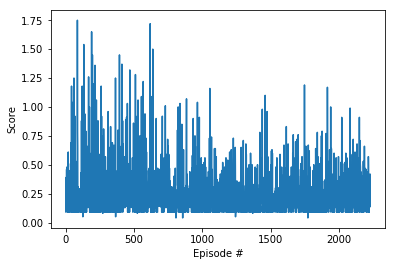

Episode 2231	Average Score: 0.25Maxi 2
Episode 2232	Average Score: 0.25Maxi 6
Episode 2233	Average Score: 0.25Maxi 1
Episode 2234	Average Score: 0.25Maxi 4
Episode 2235	Average Score: 0.25Maxi 4
Episode 2236	Average Score: 0.25Maxi 12
Episode 2237	Average Score: 0.25Maxi 2
Episode 2238	Average Score: 0.25Maxi 2
Episode 2239	Average Score: 0.26Maxi 10
Episode 2240	Average Score: 0.26Maxi 5
Episode 2240	Average Score: 0.26


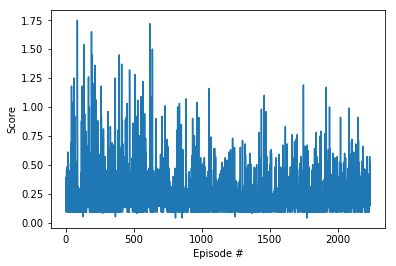

Episode 2241	Average Score: 0.25Maxi 1
Episode 2242	Average Score: 0.25Maxi 2
Episode 2243	Average Score: 0.25Maxi 5
Episode 2244	Average Score: 0.25Maxi 4
Episode 2245	Average Score: 0.25Maxi 4
Episode 2246	Average Score: 0.25Maxi 5
Episode 2247	Average Score: 0.25Maxi 5
Episode 2248	Average Score: 0.25Maxi 12
Episode 2249	Average Score: 0.25Maxi 3
Episode 2250	Average Score: 0.25Maxi 3
Episode 2250	Average Score: 0.25


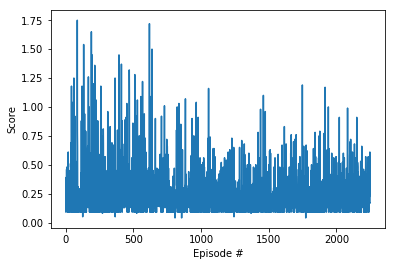

Episode 2251	Average Score: 0.24Maxi 3
Episode 2252	Average Score: 0.24Maxi 1
Episode 2253	Average Score: 0.24Maxi 3
Episode 2254	Average Score: 0.24Maxi 2
Episode 2255	Average Score: 0.24Maxi 4
Episode 2256	Average Score: 0.24Maxi 5
Episode 2257	Average Score: 0.24Maxi 14
Episode 2258	Average Score: 0.24Maxi 9
Episode 2259	Average Score: 0.23Maxi 1
Episode 2260	Average Score: 0.23Maxi 2
Episode 2260	Average Score: 0.23


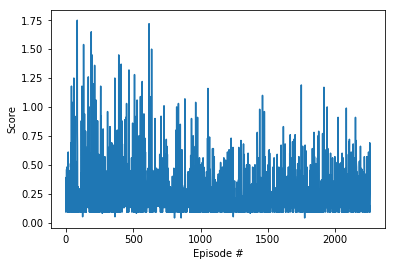

Episode 2261	Average Score: 0.23Maxi 6
Episode 2262	Average Score: 0.23Maxi 5
Episode 2263	Average Score: 0.23Maxi 1
Episode 2264	Average Score: 0.24Maxi 5
Episode 2265	Average Score: 0.23Maxi 2
Episode 2266	Average Score: 0.23Maxi 2
Episode 2267	Average Score: 0.23Maxi 2
Episode 2268	Average Score: 0.23Maxi 5
Episode 2269	Average Score: 0.23Maxi 7
Episode 2270	Average Score: 0.23Maxi 2
Episode 2270	Average Score: 0.23


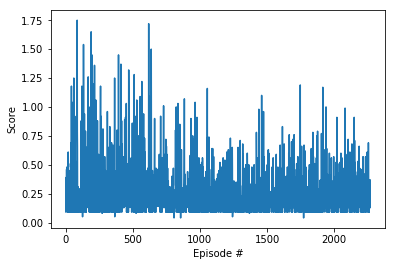

Episode 2271	Average Score: 0.23Maxi 2
Episode 2272	Average Score: 0.23Maxi 9
Episode 2273	Average Score: 0.23Maxi 5
Episode 2274	Average Score: 0.23Maxi 1
Episode 2275	Average Score: 0.23Maxi 1
Episode 2276	Average Score: 0.23Maxi 5
Episode 2277	Average Score: 0.23Maxi 5
Episode 2278	Average Score: 0.23Maxi 1
Episode 2279	Average Score: 0.23Maxi 2
Episode 2280	Average Score: 0.23Maxi 5
Episode 2280	Average Score: 0.23


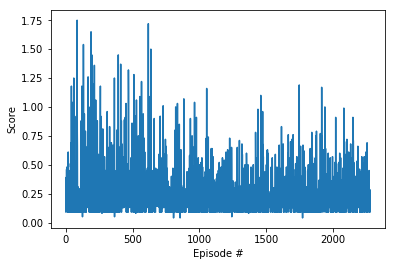

Episode 2281	Average Score: 0.23Maxi 2
Episode 2282	Average Score: 0.23Maxi 3
Episode 2283	Average Score: 0.23Maxi 5
Episode 2284	Average Score: 0.23Maxi 1
Episode 2285	Average Score: 0.23Maxi 1
Episode 2286	Average Score: 0.23Maxi 1
Episode 2287	Average Score: 0.23Maxi 2
Episode 2288	Average Score: 0.22Maxi 2
Episode 2289	Average Score: 0.22Maxi 2
Episode 2290	Average Score: 0.22Maxi 1
Episode 2290	Average Score: 0.22


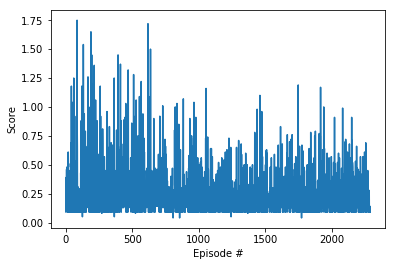

Episode 2291	Average Score: 0.22Maxi 5
Episode 2292	Average Score: 0.22Maxi 1
Episode 2293	Average Score: 0.21Maxi 1
Episode 2294	Average Score: 0.21Maxi 2
Episode 2295	Average Score: 0.22Maxi 4
Episode 2296	Average Score: 0.21Maxi 1
Episode 2297	Average Score: 0.22Maxi 10
Episode 2298	Average Score: 0.22Maxi 3
Episode 2299	Average Score: 0.22Maxi 1
Episode 2300	Average Score: 0.22Maxi 1
Episode 2300	Average Score: 0.22


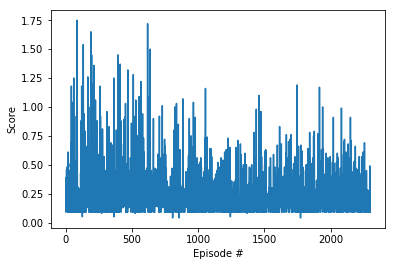

Episode 2300	Average Score: 0.22


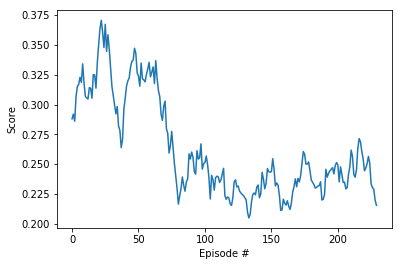

Episode 2301	Average Score: 0.21Maxi 1
Episode 2302	Average Score: 0.21Maxi 1
Episode 2303	Average Score: 0.21Maxi 3
Episode 2304	Average Score: 0.21Maxi 1
Episode 2305	Average Score: 0.21Maxi 1
Episode 2306	Average Score: 0.21Maxi 1
Episode 2307	Average Score: 0.21Maxi 2
Episode 2308	Average Score: 0.21Maxi 2
Episode 2309	Average Score: 0.21Maxi 4
Episode 2310	Average Score: 0.20Maxi 2
Episode 2310	Average Score: 0.20


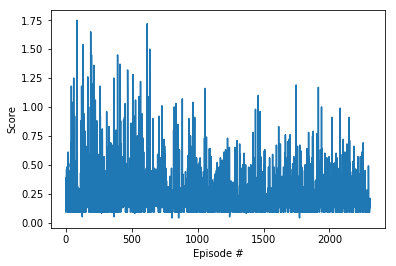

Episode 2311	Average Score: 0.20Maxi 2
Episode 2312	Average Score: 0.20Maxi 7
Episode 2313	Average Score: 0.21Maxi 3
Episode 2314	Average Score: 0.21Maxi 4
Episode 2315	Average Score: 0.21Maxi 1
Episode 2316	Average Score: 0.21Maxi 3
Episode 2317	Average Score: 0.20Maxi 2
Episode 2318	Average Score: 0.20Maxi 2
Episode 2319	Average Score: 0.20Maxi 1
Episode 2320	Average Score: 0.20Maxi 5
Episode 2320	Average Score: 0.20


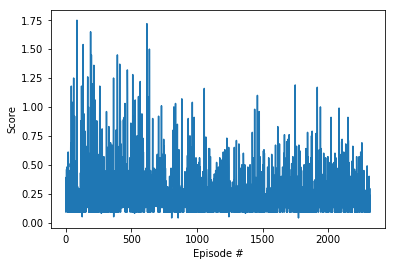

Episode 2321	Average Score: 0.20Maxi 2
Episode 2322	Average Score: 0.20Maxi 1
Episode 2323	Average Score: 0.20Maxi 2
Episode 2324	Average Score: 0.20Maxi 3
Episode 2325	Average Score: 0.20Maxi 1
Episode 2326	Average Score: 0.20Maxi 12
Episode 2327	Average Score: 0.20Maxi 5
Episode 2328	Average Score: 0.20Maxi 8
Episode 2329	Average Score: 0.20Maxi 5
Episode 2330	Average Score: 0.20Maxi 5
Episode 2330	Average Score: 0.20


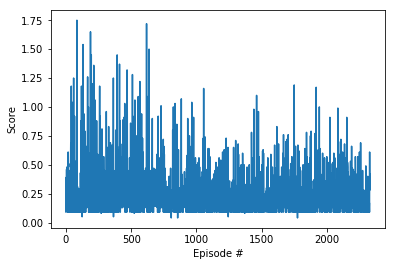

Episode 2331	Average Score: 0.20Maxi 1
Episode 2332	Average Score: 0.20Maxi 1
Episode 2333	Average Score: 0.20Maxi 4
Episode 2334	Average Score: 0.20Maxi 5
Episode 2335	Average Score: 0.20Maxi 4
Episode 2336	Average Score: 0.20Maxi 4
Episode 2337	Average Score: 0.20Maxi 2
Episode 2338	Average Score: 0.20Maxi 4
Episode 2339	Average Score: 0.20Maxi 2
Episode 2340	Average Score: 0.20Maxi 4
Episode 2340	Average Score: 0.20


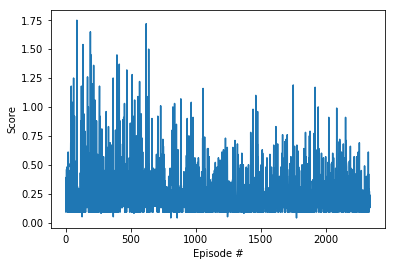

Episode 2341	Average Score: 0.20Maxi 1
Episode 2342	Average Score: 0.20Maxi 1
Episode 2343	Average Score: 0.20Maxi 4
Episode 2344	Average Score: 0.19Maxi 2
Episode 2345	Average Score: 0.19Maxi 2
Episode 2346	Average Score: 0.19Maxi 2
Episode 2347	Average Score: 0.19Maxi 2
Episode 2348	Average Score: 0.19Maxi 1
Episode 2349	Average Score: 0.18Maxi 2
Episode 2350	Average Score: 0.19Maxi 4
Episode 2350	Average Score: 0.19


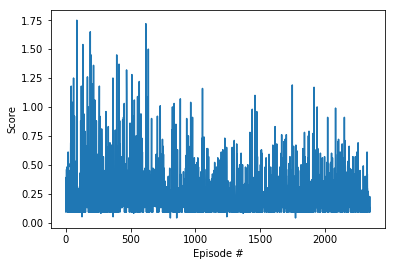

Episode 2351	Average Score: 0.18Maxi 2
Episode 2352	Average Score: 0.19Maxi 3
Episode 2353	Average Score: 0.18Maxi 1
Episode 2354	Average Score: 0.19Maxi 3
Episode 2355	Average Score: 0.18Maxi 1
Episode 2356	Average Score: 0.18Maxi 2
Episode 2357	Average Score: 0.18Maxi 2
Episode 2358	Average Score: 0.18Maxi 18
Episode 2359	Average Score: 0.18Maxi 3
Episode 2360	Average Score: 0.18Maxi 2
Episode 2360	Average Score: 0.18


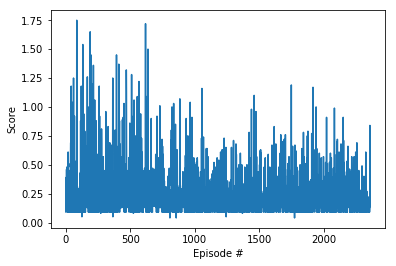

Episode 2361	Average Score: 0.18Maxi 3
Episode 2362	Average Score: 0.18Maxi 2
Episode 2363	Average Score: 0.18Maxi 2
Episode 2364	Average Score: 0.18Maxi 1
Episode 2365	Average Score: 0.18Maxi 4
Episode 2366	Average Score: 0.18Maxi 1
Episode 2367	Average Score: 0.18Maxi 3
Episode 2368	Average Score: 0.18Maxi 1
Episode 2369	Average Score: 0.17Maxi 2
Episode 2370	Average Score: 0.18Maxi 9
Episode 2370	Average Score: 0.18


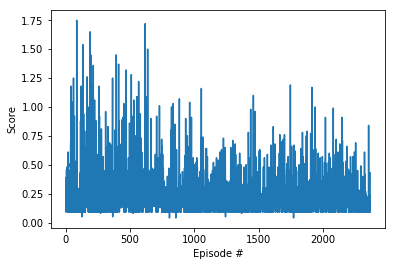

Episode 2371	Average Score: 0.18Maxi 2
Episode 2372	Average Score: 0.17Maxi 1
Episode 2373	Average Score: 0.17Maxi 1
Episode 2374	Average Score: 0.18Maxi 15
Episode 2375	Average Score: 0.18Maxi 10
Episode 2376	Average Score: 0.18Maxi 5
Episode 2377	Average Score: 0.18Maxi 1
Episode 2378	Average Score: 0.18Maxi 5
Episode 2379	Average Score: 0.18Maxi 5
Episode 2380	Average Score: 0.18Maxi 3
Episode 2380	Average Score: 0.18


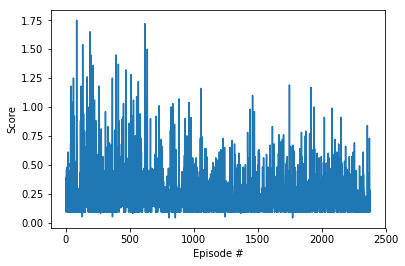

Episode 2381	Average Score: 0.18Maxi 4
Episode 2382	Average Score: 0.18Maxi 2
Episode 2383	Average Score: 0.18Maxi 1
Episode 2384	Average Score: 0.18Maxi 4
Episode 2385	Average Score: 0.18Maxi 3
Episode 2386	Average Score: 0.19Maxi 3
Episode 2387	Average Score: 0.19Maxi 4
Episode 2388	Average Score: 0.19Maxi 1
Episode 2389	Average Score: 0.19Maxi 4
Episode 2390	Average Score: 0.19Maxi 6
Episode 2390	Average Score: 0.19


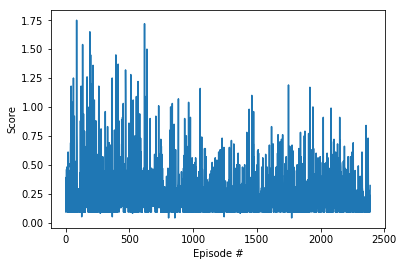

Episode 2391	Average Score: 0.19Maxi 1
Episode 2392	Average Score: 0.19Maxi 11
Episode 2393	Average Score: 0.20Maxi 15
Episode 2394	Average Score: 0.20Maxi 2
Episode 2395	Average Score: 0.20Maxi 2
Episode 2396	Average Score: 0.20Maxi 2
Episode 2397	Average Score: 0.19Maxi 4
Episode 2398	Average Score: 0.20Maxi 7
Episode 2399	Average Score: 0.21Maxi 22
Episode 2400	Average Score: 0.21Maxi 3
Episode 2400	Average Score: 0.21


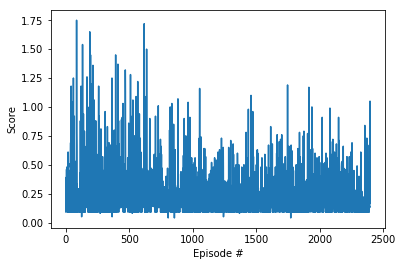

Episode 2400	Average Score: 0.21


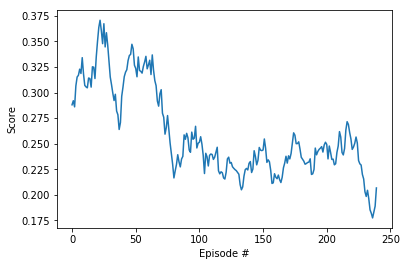

Episode 2401	Average Score: 0.21Maxi 1
Episode 2402	Average Score: 0.21Maxi 2
Episode 2403	Average Score: 0.21Maxi 1
Episode 2404	Average Score: 0.21Maxi 10
Episode 2405	Average Score: 0.21Maxi 3
Episode 2406	Average Score: 0.21Maxi 2
Episode 2407	Average Score: 0.21Maxi 6
Episode 2408	Average Score: 0.21Maxi 2
Episode 2409	Average Score: 0.22Maxi 8
Episode 2410	Average Score: 0.22Maxi 2
Episode 2410	Average Score: 0.22


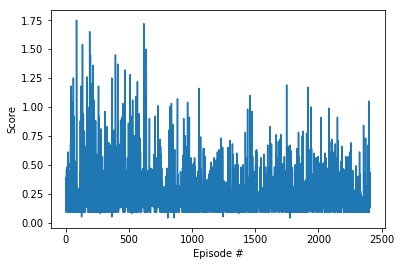

Episode 2411	Average Score: 0.22Maxi 2
Episode 2412	Average Score: 0.22Maxi 11
Episode 2413	Average Score: 0.22Maxi 7
Episode 2414	Average Score: 0.22Maxi 1
Episode 2415	Average Score: 0.22Maxi 3
Episode 2416	Average Score: 0.22Maxi 2
Episode 2417	Average Score: 0.22Maxi 2
Episode 2418	Average Score: 0.22Maxi 2
Episode 2419	Average Score: 0.22Maxi 1
Episode 2420	Average Score: 0.22Maxi 5
Episode 2420	Average Score: 0.22


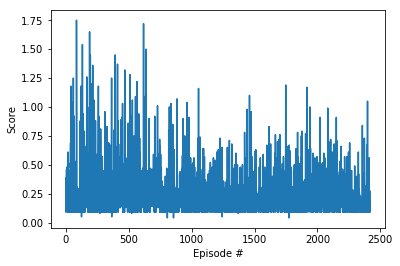

Episode 2421	Average Score: 0.22Maxi 1
Episode 2422	Average Score: 0.22Maxi 1
Episode 2423	Average Score: 0.22Maxi 4
Episode 2424	Average Score: 0.22Maxi 2
Episode 2425	Average Score: 0.22Maxi 8
Episode 2426	Average Score: 0.22Maxi 6
Episode 2427	Average Score: 0.22Maxi 7
Episode 2428	Average Score: 0.22Maxi 4
Episode 2429	Average Score: 0.22Maxi 9
Episode 2430	Average Score: 0.22Maxi 7
Episode 2430	Average Score: 0.22


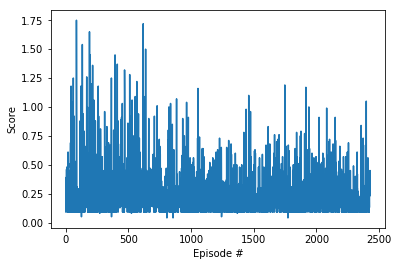

Episode 2431	Average Score: 0.22Maxi 3
Episode 2432	Average Score: 0.22Maxi 6
Episode 2433	Average Score: 0.22Maxi 1
Episode 2434	Average Score: 0.22Maxi 4
Episode 2435	Average Score: 0.22Maxi 5
Episode 2436	Average Score: 0.22Maxi 4
Episode 2437	Average Score: 0.22Maxi 7
Episode 2438	Average Score: 0.23Maxi 6
Episode 2439	Average Score: 0.23Maxi 9
Episode 2440	Average Score: 0.23Maxi 2
Episode 2440	Average Score: 0.23


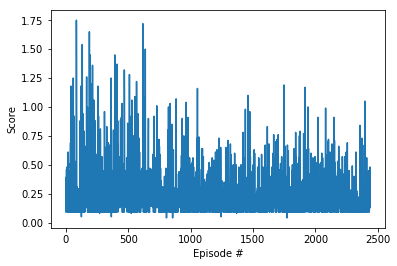

Episode 2441	Average Score: 0.23Maxi 2
Episode 2442	Average Score: 0.23Maxi 3
Episode 2443	Average Score: 0.23Maxi 8
Episode 2444	Average Score: 0.23Maxi 4
Episode 2445	Average Score: 0.24Maxi 8
Episode 2446	Average Score: 0.24Maxi 3
Episode 2447	Average Score: 0.24Maxi 5
Episode 2448	Average Score: 0.24Maxi 1
Episode 2449	Average Score: 0.24Maxi 2
Episode 2450	Average Score: 0.24Maxi 4
Episode 2450	Average Score: 0.24


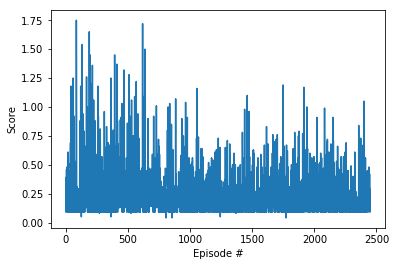

Episode 2451	Average Score: 0.24Maxi 6
Episode 2452	Average Score: 0.24Maxi 2
Episode 2453	Average Score: 0.24Maxi 3
Episode 2454	Average Score: 0.24Maxi 6
Episode 2455	Average Score: 0.24Maxi 2
Episode 2456	Average Score: 0.24Maxi 1
Episode 2457	Average Score: 0.24Maxi 4
Episode 2458	Average Score: 0.24Maxi 6
Episode 2459	Average Score: 0.24Maxi 4
Episode 2460	Average Score: 0.24Maxi 5
Episode 2460	Average Score: 0.24


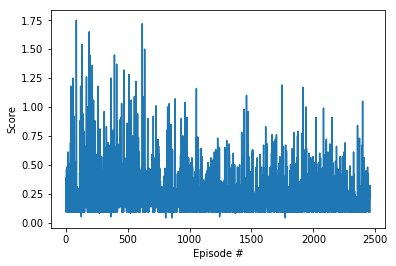

Episode 2461	Average Score: 0.24Maxi 5
Episode 2462	Average Score: 0.24Maxi 1
Episode 2463	Average Score: 0.24Maxi 2
Episode 2464	Average Score: 0.24Maxi 2
Episode 2465	Average Score: 0.24Maxi 2
Episode 2466	Average Score: 0.24Maxi 1
Episode 2467	Average Score: 0.24Maxi 6
Episode 2468	Average Score: 0.24Maxi 4
Episode 2469	Average Score: 0.24Maxi 2
Episode 2470	Average Score: 0.24Maxi 2
Episode 2470	Average Score: 0.24


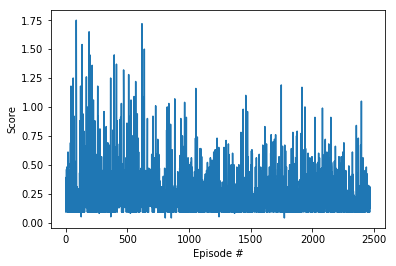

Episode 2471	Average Score: 0.24Maxi 4
Episode 2472	Average Score: 0.24Maxi 5
Episode 2473	Average Score: 0.24Maxi 5
Episode 2474	Average Score: 0.24Maxi 2
Episode 2475	Average Score: 0.23Maxi 2
Episode 2476	Average Score: 0.23Maxi 6
Episode 2477	Average Score: 0.23Maxi 0
Episode 2478	Average Score: 0.23Maxi 2
Episode 2479	Average Score: 0.23Maxi 11
Episode 2480	Average Score: 0.24Maxi 11
Episode 2480	Average Score: 0.24


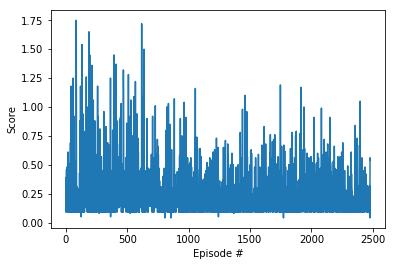

Episode 2481	Average Score: 0.24Maxi 5
Episode 2482	Average Score: 0.24Maxi 4
Episode 2483	Average Score: 0.24Maxi 8
Episode 2484	Average Score: 0.25Maxi 13
Episode 2485	Average Score: 0.25Maxi 2
Episode 2486	Average Score: 0.25Maxi 7
Episode 2487	Average Score: 0.25Maxi 12
Episode 2488	Average Score: 0.25Maxi 3
Episode 2489	Average Score: 0.25Maxi 2
Episode 2490	Average Score: 0.25Maxi 4
Episode 2490	Average Score: 0.25


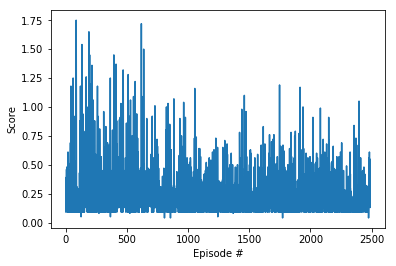

Episode 2491	Average Score: 0.25Maxi 1
Episode 2492	Average Score: 0.25Maxi 1
Episode 2493	Average Score: 0.24Maxi 7
Episode 2494	Average Score: 0.24Maxi 1
Episode 2495	Average Score: 0.24Maxi 8
Episode 2496	Average Score: 0.24Maxi 1
Episode 2497	Average Score: 0.24Maxi 2
Episode 2498	Average Score: 0.24Maxi 4
Episode 2499	Average Score: 0.24Maxi 9

Environment solved in 2400 episodes!	Average Score: 0.24
Episode 2500	Average Score: 0.24Maxi 4
Episode 2500	Average Score: 0.24


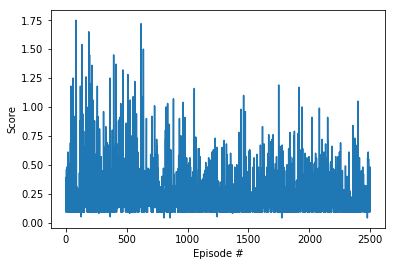

Episode 2500	Average Score: 0.24


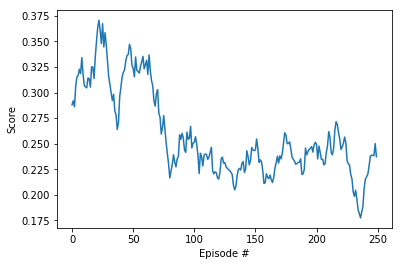

Episode 2501	Average Score: 0.24Maxi 2
Episode 2502	Average Score: 0.24Maxi 2
Episode 2503	Average Score: 0.24Maxi 2
Episode 2504	Average Score: 0.24Maxi 4
Episode 2505	Average Score: 0.23Maxi 1
Episode 2506	Average Score: 0.23Maxi 3
Episode 2507	Average Score: 0.23Maxi 6
Episode 2508	Average Score: 0.24Maxi 3
Episode 2509	Average Score: 0.23Maxi 1
Episode 2510	Average Score: 0.24Maxi 9
Episode 2510	Average Score: 0.24


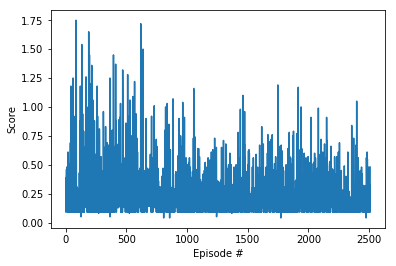

Episode 2511	Average Score: 0.23Maxi 1
Episode 2512	Average Score: 0.23Maxi 1
Episode 2513	Average Score: 0.23Maxi 7
Episode 2514	Average Score: 0.23Maxi 3
Episode 2515	Average Score: 0.23Maxi 7
Episode 2516	Average Score: 0.24Maxi 12
Episode 2517	Average Score: 0.24Maxi 9
Episode 2518	Average Score: 0.24Maxi 4
Episode 2519	Average Score: 0.24Maxi 2
Episode 2520	Average Score: 0.24Maxi 4
Episode 2520	Average Score: 0.24


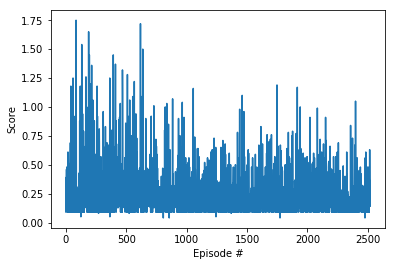

Episode 2521	Average Score: 0.24Maxi 1
Episode 2522	Average Score: 0.25Maxi 9
Episode 2523	Average Score: 0.25Maxi 3
Episode 2524	Average Score: 0.25Maxi 4
Episode 2525	Average Score: 0.25Maxi 5
Episode 2526	Average Score: 0.24Maxi 4
Episode 2527	Average Score: 0.24Maxi 2
Episode 2528	Average Score: 0.24Maxi 1
Episode 2529	Average Score: 0.24Maxi 8
Episode 2530	Average Score: 0.24Maxi 1
Episode 2530	Average Score: 0.24


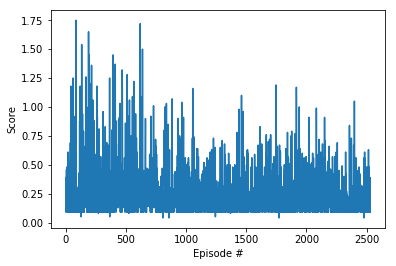

Episode 2531	Average Score: 0.24Maxi 2
Episode 2532	Average Score: 0.23Maxi 0
Episode 2533	Average Score: 0.23Maxi 4
Episode 2534	Average Score: 0.23Maxi 2
Episode 2535	Average Score: 0.24Maxi 8
Episode 2536	Average Score: 0.23Maxi 3
Episode 2537	Average Score: 0.23Maxi 3
Episode 2538	Average Score: 0.23Maxi 7
Episode 2539	Average Score: 0.23Maxi 2
Episode 2540	Average Score: 0.23Maxi 1
Episode 2540	Average Score: 0.23


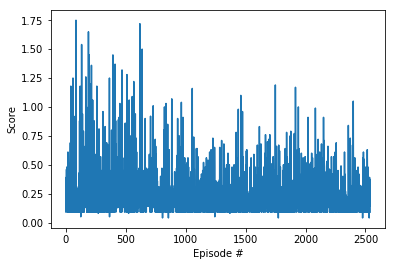

Episode 2541	Average Score: 0.23Maxi 1
Episode 2542	Average Score: 0.23Maxi 10
Episode 2543	Average Score: 0.23Maxi 1
Episode 2544	Average Score: 0.24Maxi 22
Episode 2545	Average Score: 0.23Maxi 1
Episode 2546	Average Score: 0.23Maxi 2
Episode 2547	Average Score: 0.23Maxi 2
Episode 2548	Average Score: 0.23Maxi 4
Episode 2549	Average Score: 0.24Maxi 13
Episode 2550	Average Score: 0.24Maxi 5
Episode 2550	Average Score: 0.24


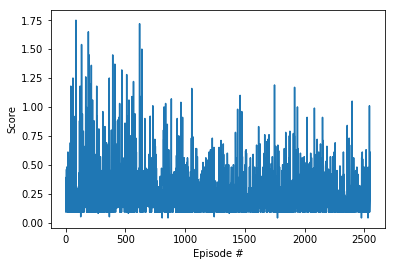

Episode 2551	Average Score: 0.24Maxi 3
Episode 2552	Average Score: 0.24Maxi 1
Episode 2553	Average Score: 0.24Maxi 8
Episode 2554	Average Score: 0.24Maxi 3
Episode 2555	Average Score: 0.24Maxi 2
Episode 2556	Average Score: 0.24Maxi 1
Episode 2557	Average Score: 0.24Maxi 9
Episode 2558	Average Score: 0.24Maxi 4
Episode 2559	Average Score: 0.24Maxi 3
Episode 2560	Average Score: 0.24Maxi 2
Episode 2560	Average Score: 0.24


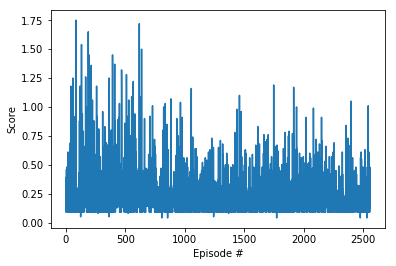

Episode 2561	Average Score: 0.23Maxi 1
Episode 2562	Average Score: 0.24Maxi 7
Episode 2563	Average Score: 0.24Maxi 2
Episode 2564	Average Score: 0.24Maxi 1
Episode 2565	Average Score: 0.24Maxi 2
Episode 2566	Average Score: 0.24Maxi 2
Episode 2567	Average Score: 0.24Maxi 9
Episode 2568	Average Score: 0.24Maxi 1
Episode 2569	Average Score: 0.24Maxi 2
Episode 2570	Average Score: 0.24Maxi 1
Episode 2570	Average Score: 0.24


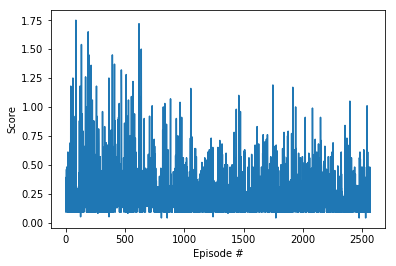

Episode 2571	Average Score: 0.24Maxi 3
Episode 2572	Average Score: 0.24Maxi 4
Episode 2573	Average Score: 0.23Maxi 1
Episode 2574	Average Score: 0.23Maxi 1
Episode 2575	Average Score: 0.23Maxi 2
Episode 2576	Average Score: 0.23Maxi 4
Episode 2577	Average Score: 0.23Maxi 1
Episode 2578	Average Score: 0.23Maxi 1
Episode 2579	Average Score: 0.23Maxi 2
Episode 2580	Average Score: 0.23Maxi 7
Episode 2580	Average Score: 0.23


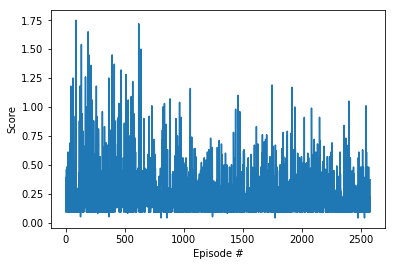

Episode 2581	Average Score: 0.23Maxi 2
Episode 2582	Average Score: 0.23Maxi 2
Episode 2583	Average Score: 0.22Maxi 1
Episode 2584	Average Score: 0.22Maxi 7
Episode 2585	Average Score: 0.22Maxi 2
Episode 2586	Average Score: 0.22Maxi 6
Episode 2587	Average Score: 0.22Maxi 2
Episode 2588	Average Score: 0.22Maxi 7
Episode 2589	Average Score: 0.22Maxi 5
Episode 2590	Average Score: 0.22Maxi 1
Episode 2590	Average Score: 0.22


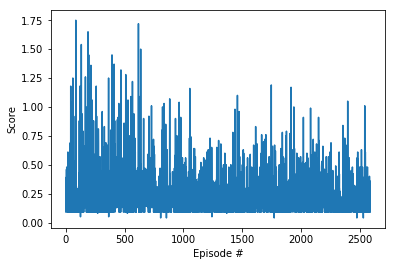

Episode 2591	Average Score: 0.22Maxi 2
Episode 2592	Average Score: 0.22Maxi 4
Episode 2593	Average Score: 0.22Maxi 4
Episode 2594	Average Score: 0.22Maxi 4
Episode 2595	Average Score: 0.22Maxi 3
Episode 2596	Average Score: 0.22Maxi 2
Episode 2597	Average Score: 0.22Maxi 0
Episode 2598	Average Score: 0.22Maxi 4
Episode 2599	Average Score: 0.21Maxi 5
Episode 2600	Average Score: 0.22Maxi 6
Episode 2600	Average Score: 0.22


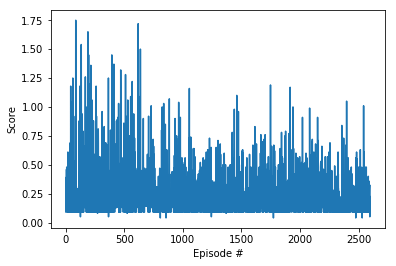

Episode 2600	Average Score: 0.22


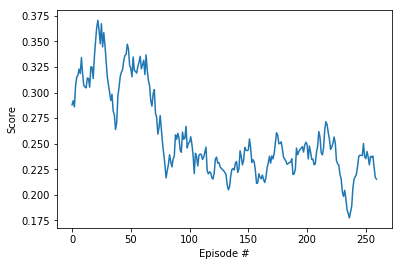

Episode 2601	Average Score: 0.22Maxi 7
Episode 2602	Average Score: 0.22Maxi 2
Episode 2603	Average Score: 0.22Maxi 2
Episode 2604	Average Score: 0.22Maxi 1
Episode 2605	Average Score: 0.22Maxi 5
Episode 2606	Average Score: 0.22Maxi 2
Episode 2607	Average Score: 0.22Maxi 2
Episode 2608	Average Score: 0.22Maxi 2
Episode 2609	Average Score: 0.22Maxi 12
Episode 2610	Average Score: 0.22Maxi 2
Episode 2610	Average Score: 0.22


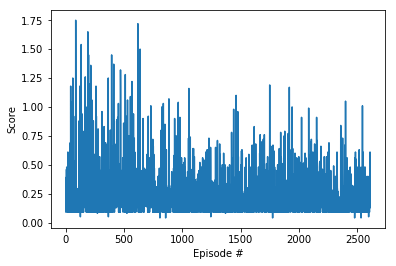

Episode 2611	Average Score: 0.22Maxi 11
Episode 2612	Average Score: 0.23Maxi 9
Episode 2613	Average Score: 0.22Maxi 2
Episode 2614	Average Score: 0.22Maxi 2
Episode 2615	Average Score: 0.22Maxi 3
Episode 2616	Average Score: 0.22Maxi 1
Episode 2617	Average Score: 0.21Maxi 1
Episode 2618	Average Score: 0.21Maxi 2
Episode 2619	Average Score: 0.21Maxi 5
Episode 2620	Average Score: 0.21Maxi 1
Episode 2620	Average Score: 0.21


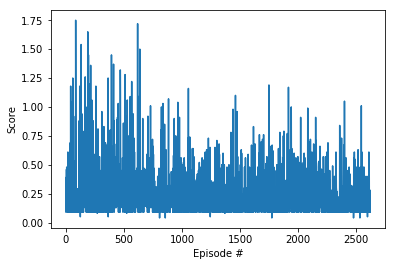

Episode 2621	Average Score: 0.21Maxi 4
Episode 2622	Average Score: 0.21Maxi 4
Episode 2623	Average Score: 0.21Maxi 1
Episode 2624	Average Score: 0.21Maxi 1
Episode 2625	Average Score: 0.21Maxi 6
Episode 2626	Average Score: 0.21Maxi 2
Episode 2627	Average Score: 0.21Maxi 1
Episode 2628	Average Score: 0.21Maxi 7
Episode 2629	Average Score: 0.21Maxi 2
Episode 2630	Average Score: 0.21Maxi 2
Episode 2630	Average Score: 0.21


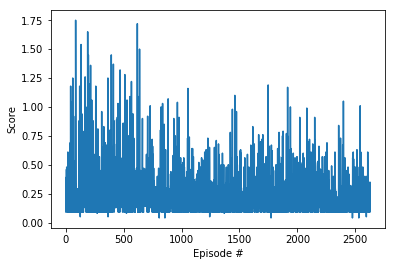

Episode 2631	Average Score: 0.21Maxi 2
Episode 2632	Average Score: 0.21Maxi 5
Episode 2633	Average Score: 0.21Maxi 2
Episode 2634	Average Score: 0.21Maxi 4
Episode 2635	Average Score: 0.21Maxi 4
Episode 2636	Average Score: 0.21Maxi 3
Episode 2637	Average Score: 0.21Maxi 3
Episode 2638	Average Score: 0.20Maxi 1
Episode 2639	Average Score: 0.20Maxi 2
Episode 2640	Average Score: 0.21Maxi 2
Episode 2640	Average Score: 0.21


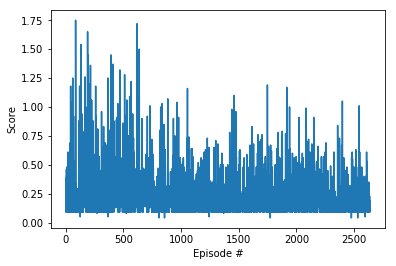

Episode 2641	Average Score: 0.21Maxi 2
Episode 2642	Average Score: 0.20Maxi 2
Episode 2643	Average Score: 0.20Maxi 2
Episode 2644	Average Score: 0.19Maxi 2
Episode 2645	Average Score: 0.20Maxi 6
Episode 2646	Average Score: 0.20Maxi 2
Episode 2647	Average Score: 0.20Maxi 2
Episode 2648	Average Score: 0.20Maxi 3
Episode 2649	Average Score: 0.19Maxi 7
Episode 2650	Average Score: 0.19Maxi 1
Episode 2650	Average Score: 0.19


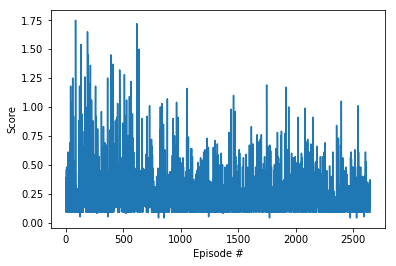

Episode 2651	Average Score: 0.19Maxi 9
Episode 2652	Average Score: 0.20Maxi 3
Episode 2653	Average Score: 0.19Maxi 1
Episode 2654	Average Score: 0.19Maxi 9
Episode 2655	Average Score: 0.19Maxi 1
Episode 2656	Average Score: 0.19Maxi 2
Episode 2657	Average Score: 0.19Maxi 2
Episode 2658	Average Score: 0.19Maxi 1
Episode 2659	Average Score: 0.19Maxi 1
Episode 2660	Average Score: 0.19Maxi 1
Episode 2660	Average Score: 0.19


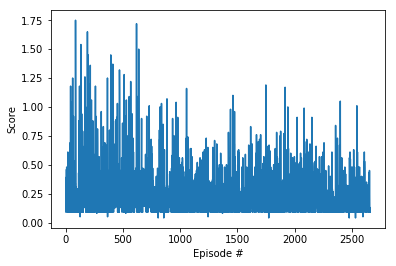

Episode 2661	Average Score: 0.19Maxi 7
Episode 2662	Average Score: 0.19Maxi 4
Episode 2663	Average Score: 0.19Maxi 10
Episode 2664	Average Score: 0.20Maxi 6
Episode 2665	Average Score: 0.20Maxi 10
Episode 2666	Average Score: 0.20Maxi 1
Episode 2667	Average Score: 0.20Maxi 1
Episode 2668	Average Score: 0.20Maxi 2
Episode 2669	Average Score: 0.20Maxi 4
Episode 2670	Average Score: 0.20Maxi 2
Episode 2670	Average Score: 0.20


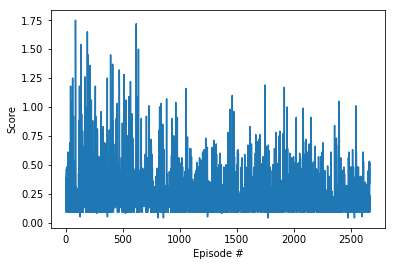

Episode 2671	Average Score: 0.20Maxi 5
Episode 2672	Average Score: 0.20Maxi 15
Episode 2673	Average Score: 0.20Maxi 2
Episode 2674	Average Score: 0.20Maxi 3
Episode 2675	Average Score: 0.21Maxi 3
Episode 2676	Average Score: 0.20Maxi 3
Episode 2677	Average Score: 0.21Maxi 4
Episode 2678	Average Score: 0.21Maxi 14
Episode 2679	Average Score: 0.21Maxi 6
Episode 2680	Average Score: 0.21Maxi 2
Episode 2680	Average Score: 0.21


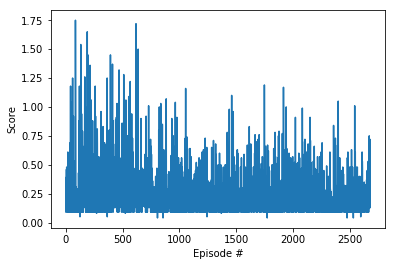

Episode 2681	Average Score: 0.21Maxi 3
Episode 2682	Average Score: 0.21Maxi 7
Episode 2683	Average Score: 0.21Maxi 1
Episode 2684	Average Score: 0.21Maxi 2
Episode 2685	Average Score: 0.21Maxi 2
Episode 2686	Average Score: 0.21Maxi 1
Episode 2687	Average Score: 0.21Maxi 7
Episode 2688	Average Score: 0.21Maxi 6
Episode 2689	Average Score: 0.21Maxi 1
Episode 2690	Average Score: 0.21Maxi 5
Episode 2690	Average Score: 0.21


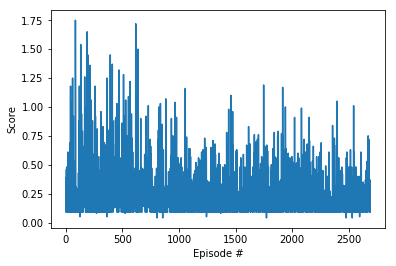

Episode 2691	Average Score: 0.21Maxi 1
Episode 2692	Average Score: 0.21Maxi 4
Episode 2693	Average Score: 0.21Maxi 4
Episode 2694	Average Score: 0.21Maxi 2
Episode 2695	Average Score: 0.21Maxi 2
Episode 2696	Average Score: 0.21Maxi 3
Episode 2697	Average Score: 0.21Maxi 1
Episode 2698	Average Score: 0.22Maxi 23
Episode 2699	Average Score: 0.22Maxi 10
Episode 2700	Average Score: 0.22Maxi 5
Episode 2700	Average Score: 0.22


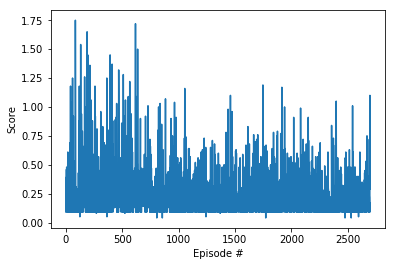

Episode 2700	Average Score: 0.22


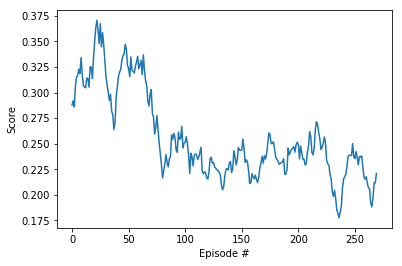

Episode 2701	Average Score: 0.22Maxi 2
Episode 2702	Average Score: 0.22Maxi 5
Episode 2703	Average Score: 0.22Maxi 1
Episode 2704	Average Score: 0.22Maxi 7
Episode 2705	Average Score: 0.22Maxi 1
Episode 2706	Average Score: 0.22Maxi 1
Episode 2707	Average Score: 0.22Maxi 2
Episode 2708	Average Score: 0.22Maxi 2
Episode 2709	Average Score: 0.21Maxi 2
Episode 2710	Average Score: 0.22Maxi 12
Episode 2710	Average Score: 0.22


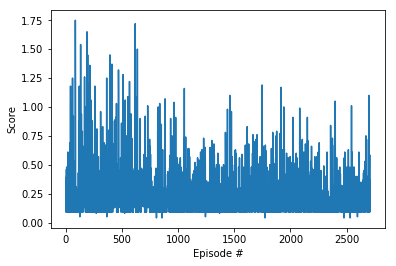

Episode 2711	Average Score: 0.22Maxi 1
Episode 2712	Average Score: 0.21Maxi 4
Episode 2713	Average Score: 0.22Maxi 10
Episode 2714	Average Score: 0.22Maxi 4
Episode 2715	Average Score: 0.22Maxi 6
Episode 2716	Average Score: 0.22Maxi 2
Episode 2717	Average Score: 0.22Maxi 4
Episode 2718	Average Score: 0.22Maxi 2
Episode 2719	Average Score: 0.22Maxi 2
Episode 2720	Average Score: 0.22Maxi 4
Episode 2720	Average Score: 0.22


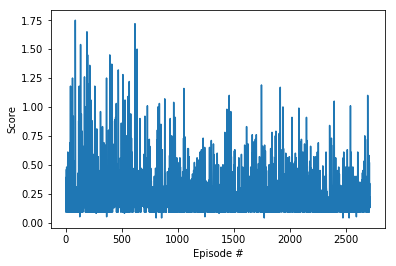

Episode 2721	Average Score: 0.22Maxi 2
Episode 2722	Average Score: 0.22Maxi 1
Episode 2723	Average Score: 0.22Maxi 10
Episode 2724	Average Score: 0.22Maxi 2
Episode 2725	Average Score: 0.22Maxi 3
Episode 2726	Average Score: 0.22Maxi 7
Episode 2727	Average Score: 0.22Maxi 2
Episode 2728	Average Score: 0.22Maxi 1
Episode 2729	Average Score: 0.22Maxi 1
Episode 2730	Average Score: 0.22Maxi 1
Episode 2730	Average Score: 0.22


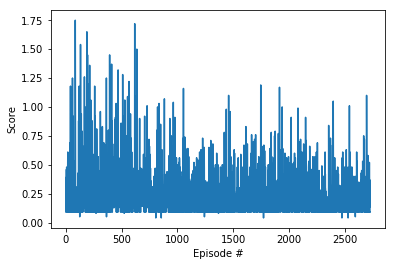

Episode 2731	Average Score: 0.22Maxi 3
Episode 2732	Average Score: 0.22Maxi 2
Episode 2733	Average Score: 0.22Maxi 2
Episode 2734	Average Score: 0.22Maxi 4
Episode 2735	Average Score: 0.22Maxi 2
Episode 2736	Average Score: 0.22Maxi 2
Episode 2737	Average Score: 0.22Maxi 2
Episode 2738	Average Score: 0.22Maxi 3
Episode 2739	Average Score: 0.22Maxi 2
Episode 2740	Average Score: 0.22Maxi 2
Episode 2740	Average Score: 0.22


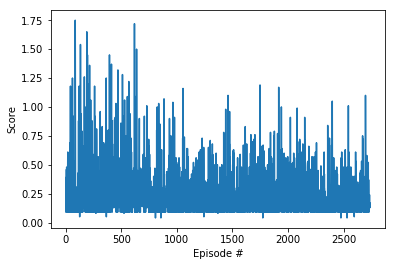

Episode 2741	Average Score: 0.22Maxi 1
Episode 2742	Average Score: 0.22Maxi 6
Episode 2743	Average Score: 0.22Maxi 1
Episode 2744	Average Score: 0.22Maxi 1
Episode 2745	Average Score: 0.22Maxi 2
Episode 2746	Average Score: 0.22Maxi 4
Episode 2747	Average Score: 0.22Maxi 4
Episode 2748	Average Score: 0.22Maxi 1
Episode 2749	Average Score: 0.22Maxi 5
Episode 2750	Average Score: 0.22Maxi 3
Episode 2750	Average Score: 0.22


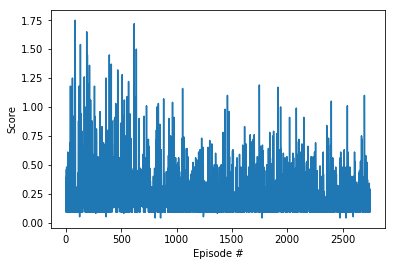

Episode 2751	Average Score: 0.22Maxi 5
Episode 2752	Average Score: 0.22Maxi 6
Episode 2753	Average Score: 0.22Maxi 1
Episode 2754	Average Score: 0.22Maxi 4
Episode 2755	Average Score: 0.22Maxi 10
Episode 2756	Average Score: 0.22Maxi 5
Episode 2757	Average Score: 0.22Maxi 3
Episode 2758	Average Score: 0.22Maxi 3
Episode 2759	Average Score: 0.22Maxi 1
Episode 2760	Average Score: 0.22Maxi 4
Episode 2760	Average Score: 0.22


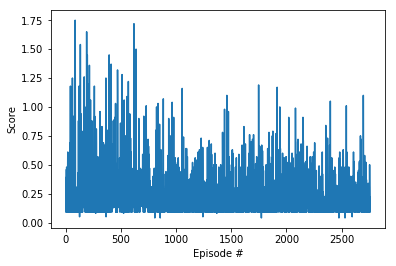

Episode 2761	Average Score: 0.22Maxi 7
Episode 2762	Average Score: 0.22Maxi 2
Episode 2763	Average Score: 0.22Maxi 4
Episode 2764	Average Score: 0.22Maxi 1
Episode 2765	Average Score: 0.21Maxi 2
Episode 2766	Average Score: 0.21Maxi 2
Episode 2767	Average Score: 0.22Maxi 3
Episode 2768	Average Score: 0.22Maxi 1
Episode 2769	Average Score: 0.21Maxi 3
Episode 2770	Average Score: 0.21Maxi 2
Episode 2770	Average Score: 0.21


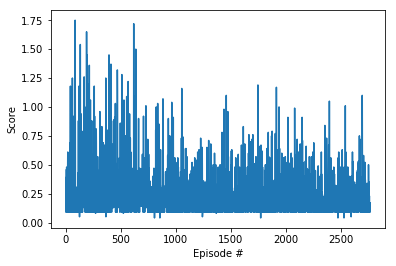

Episode 2771	Average Score: 0.21Maxi 3
Episode 2772	Average Score: 0.21Maxi 1
Episode 2773	Average Score: 0.21Maxi 1
Episode 2774	Average Score: 0.21Maxi 11
Episode 2775	Average Score: 0.21Maxi 6
Episode 2776	Average Score: 0.21Maxi 4
Episode 2777	Average Score: 0.21Maxi 6
Episode 2778	Average Score: 0.21Maxi 2
Episode 2779	Average Score: 0.21Maxi 7
Episode 2780	Average Score: 0.21Maxi 10
Episode 2780	Average Score: 0.21


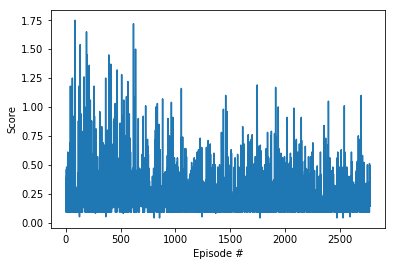

Episode 2781	Average Score: 0.21Maxi 2
Episode 2782	Average Score: 0.21Maxi 6
Episode 2783	Average Score: 0.21Maxi 2
Episode 2784	Average Score: 0.21Maxi 10
Episode 2785	Average Score: 0.22Maxi 5
Episode 2786	Average Score: 0.22Maxi 2
Episode 2787	Average Score: 0.22Maxi 6
Episode 2788	Average Score: 0.21Maxi 0
Episode 2789	Average Score: 0.21Maxi 2
Episode 2790	Average Score: 0.21Maxi 5
Episode 2790	Average Score: 0.21


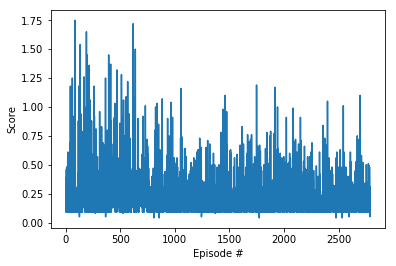

Episode 2791	Average Score: 0.21Maxi 2
Episode 2792	Average Score: 0.21Maxi 5
Episode 2793	Average Score: 0.22Maxi 16
Episode 2794	Average Score: 0.23Maxi 19
Episode 2795	Average Score: 0.23Maxi 6
Episode 2796	Average Score: 0.23Maxi 13
Episode 2797	Average Score: 0.24Maxi 6
Episode 2798	Average Score: 0.23Maxi 2
Episode 2799	Average Score: 0.22Maxi 3
Episode 2800	Average Score: 0.22Maxi 2
Episode 2800	Average Score: 0.22


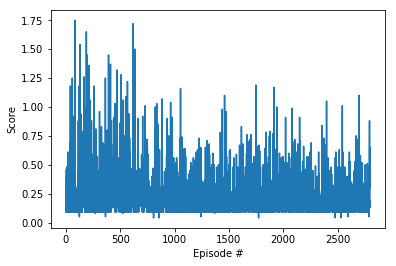

Episode 2800	Average Score: 0.22


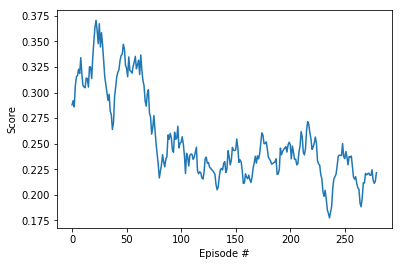

Episode 2801	Average Score: 0.22Maxi 3
Episode 2802	Average Score: 0.22Maxi 4
Episode 2803	Average Score: 0.23Maxi 9
Episode 2804	Average Score: 0.22Maxi 1
Episode 2805	Average Score: 0.23Maxi 10
Episode 2806	Average Score: 0.23Maxi 5
Episode 2807	Average Score: 0.23Maxi 2
Episode 2808	Average Score: 0.23Maxi 1
Episode 2809	Average Score: 0.23Maxi 1
Episode 2810	Average Score: 0.22Maxi 3
Episode 2810	Average Score: 0.22


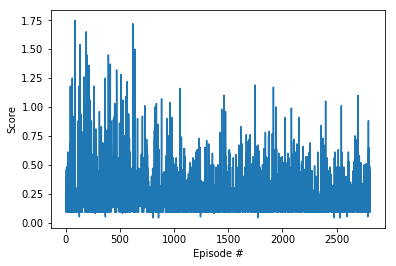

Episode 2811	Average Score: 0.23Maxi 7
Episode 2812	Average Score: 0.23Maxi 4
Episode 2813	Average Score: 0.22Maxi 3
Episode 2814	Average Score: 0.22Maxi 1
Episode 2815	Average Score: 0.22Maxi 2
Episode 2816	Average Score: 0.22Maxi 1
Episode 2817	Average Score: 0.22Maxi 5
Episode 2818	Average Score: 0.22Maxi 2
Episode 2819	Average Score: 0.22Maxi 1
Episode 2820	Average Score: 0.22Maxi 2
Episode 2820	Average Score: 0.22


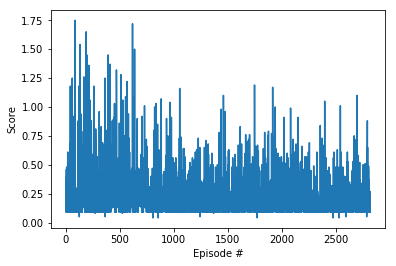

Episode 2821	Average Score: 0.22Maxi 2
Episode 2822	Average Score: 0.22Maxi 2
Episode 2823	Average Score: 0.22Maxi 5
Episode 2824	Average Score: 0.22Maxi 4
Episode 2825	Average Score: 0.22Maxi 3
Episode 2826	Average Score: 0.22Maxi 5
Episode 2827	Average Score: 0.22Maxi 1
Episode 2828	Average Score: 0.22Maxi 1
Episode 2829	Average Score: 0.22Maxi 1
Episode 2830	Average Score: 0.22Maxi 4
Episode 2830	Average Score: 0.22


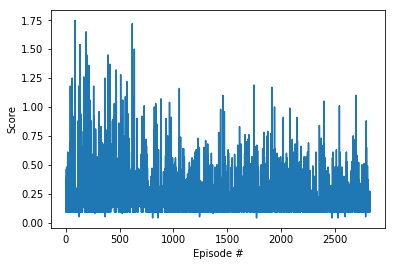

Episode 2831	Average Score: 0.22Maxi 2
Episode 2832	Average Score: 0.22Maxi 1
Episode 2833	Average Score: 0.22Maxi 2
Episode 2834	Average Score: 0.21Maxi 1
Episode 2835	Average Score: 0.22Maxi 9
Episode 2836	Average Score: 0.22Maxi 3
Episode 2837	Average Score: 0.22Maxi 2
Episode 2838	Average Score: 0.22Maxi 2
Episode 2839	Average Score: 0.22Maxi 1
Episode 2840	Average Score: 0.22Maxi 1
Episode 2840	Average Score: 0.22


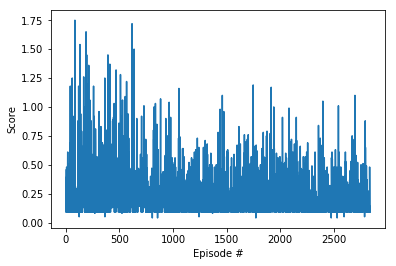

Episode 2841	Average Score: 0.22Maxi 7
Episode 2842	Average Score: 0.22Maxi 2
Episode 2843	Average Score: 0.22Maxi 6
Episode 2844	Average Score: 0.22Maxi 6
Episode 2845	Average Score: 0.22Maxi 1
Episode 2846	Average Score: 0.22Maxi 1
Episode 2847	Average Score: 0.22Maxi 1
Episode 2848	Average Score: 0.22Maxi 9
Episode 2849	Average Score: 0.22Maxi 4
Episode 2850	Average Score: 0.22Maxi 1
Episode 2850	Average Score: 0.22


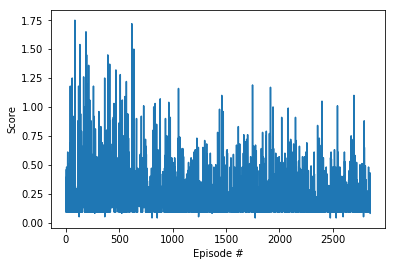

Episode 2851	Average Score: 0.22Maxi 2
Episode 2852	Average Score: 0.22Maxi 8
Episode 2853	Average Score: 0.23Maxi 12
Episode 2854	Average Score: 0.23Maxi 6
Episode 2855	Average Score: 0.22Maxi 2
Episode 2856	Average Score: 0.22Maxi 3
Episode 2857	Average Score: 0.22Maxi 4
Episode 2858	Average Score: 0.22Maxi 4
Episode 2859	Average Score: 0.23Maxi 6
Episode 2860	Average Score: 0.22Maxi 1
Episode 2860	Average Score: 0.22


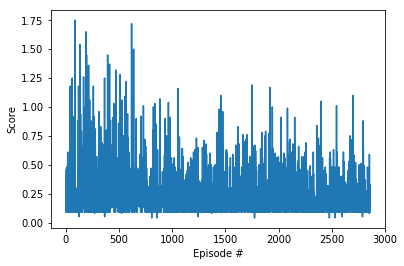

Episode 2861	Average Score: 0.22Maxi 2
Episode 2862	Average Score: 0.22Maxi 1
Episode 2863	Average Score: 0.22Maxi 1
Episode 2864	Average Score: 0.22Maxi 2
Episode 2865	Average Score: 0.22Maxi 1
Episode 2866	Average Score: 0.22Maxi 8
Episode 2867	Average Score: 0.23Maxi 6
Episode 2868	Average Score: 0.23Maxi 2
Episode 2869	Average Score: 0.23Maxi 3
Episode 2870	Average Score: 0.23Maxi 1
Episode 2870	Average Score: 0.23


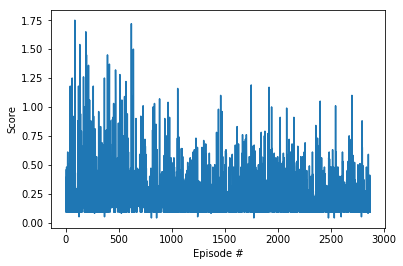

Episode 2871	Average Score: 0.23Maxi 4
Episode 2872	Average Score: 0.23Maxi 1
Episode 2873	Average Score: 0.23Maxi 8
Episode 2874	Average Score: 0.23Maxi 4
Episode 2875	Average Score: 0.22Maxi 1
Episode 2876	Average Score: 0.22Maxi 5
Episode 2877	Average Score: 0.23Maxi 8
Episode 2878	Average Score: 0.23Maxi 2
Episode 2879	Average Score: 0.22Maxi 1
Episode 2880	Average Score: 0.22Maxi 5
Episode 2880	Average Score: 0.22


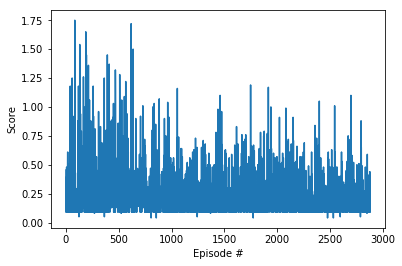

Episode 2881	Average Score: 0.22Maxi 2
Episode 2882	Average Score: 0.22Maxi 2
Episode 2883	Average Score: 0.22Maxi 4
Episode 2884	Average Score: 0.21Maxi 1
Episode 2885	Average Score: 0.21Maxi 2
Episode 2886	Average Score: 0.21Maxi 1
Episode 2887	Average Score: 0.21Maxi 2
Episode 2888	Average Score: 0.21Maxi 1
Episode 2889	Average Score: 0.21Maxi 2
Episode 2890	Average Score: 0.21Maxi 6
Episode 2890	Average Score: 0.21


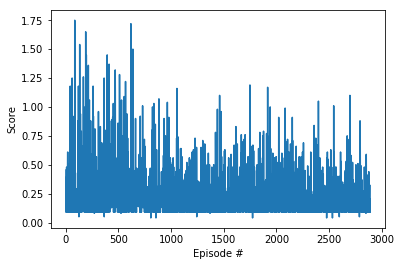

Episode 2891	Average Score: 0.22Maxi 10
Episode 2892	Average Score: 0.22Maxi 5
Episode 2893	Average Score: 0.21Maxi 1
Episode 2894	Average Score: 0.20Maxi 6
Episode 2895	Average Score: 0.20Maxi 4
Episode 2896	Average Score: 0.20Maxi 1
Episode 2897	Average Score: 0.20Maxi 14
Episode 2898	Average Score: 0.20Maxi 1
Episode 2899	Average Score: 0.20Maxi 7
Episode 2900	Average Score: 0.20Maxi 8
Episode 2900	Average Score: 0.20


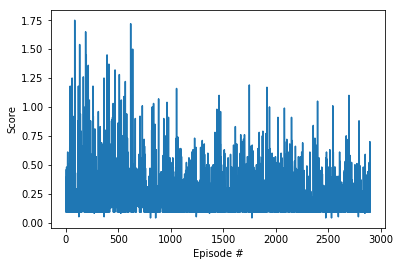

Episode 2900	Average Score: 0.20


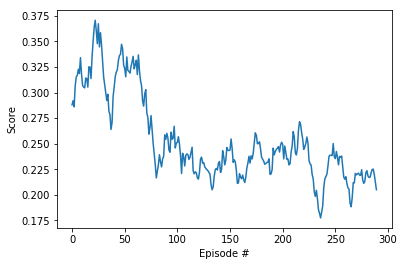

Episode 2901	Average Score: 0.21Maxi 15
Episode 2902	Average Score: 0.21Maxi 1
Episode 2903	Average Score: 0.21Maxi 11
Episode 2904	Average Score: 0.21Maxi 4
Episode 2905	Average Score: 0.21Maxi 2
Episode 2906	Average Score: 0.21Maxi 1
Episode 2907	Average Score: 0.21Maxi 2
Episode 2908	Average Score: 0.21Maxi 4
Episode 2909	Average Score: 0.21Maxi 5
Episode 2910	Average Score: 0.21Maxi 1
Episode 2910	Average Score: 0.21


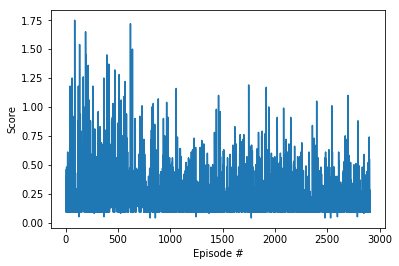

Episode 2911	Average Score: 0.21Maxi 2
Episode 2912	Average Score: 0.21Maxi 7
Episode 2913	Average Score: 0.21Maxi 2
Episode 2914	Average Score: 0.21Maxi 5
Episode 2915	Average Score: 0.21Maxi 3
Episode 2916	Average Score: 0.21Maxi 2
Episode 2917	Average Score: 0.21Maxi 4
Episode 2918	Average Score: 0.21Maxi 1
Episode 2919	Average Score: 0.21Maxi 2
Episode 2920	Average Score: 0.21Maxi 2
Episode 2920	Average Score: 0.21


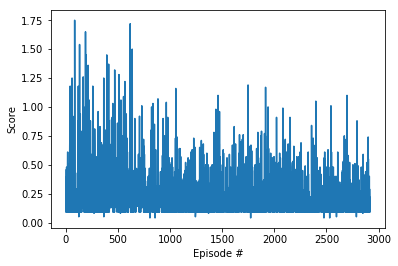

Episode 2921	Average Score: 0.21Maxi 2
Episode 2922	Average Score: 0.21Maxi 6
Episode 2923	Average Score: 0.21Maxi 1
Episode 2924	Average Score: 0.21Maxi 1
Episode 2925	Average Score: 0.21Maxi 7
Episode 2926	Average Score: 0.21Maxi 5
Episode 2927	Average Score: 0.21Maxi 4
Episode 2928	Average Score: 0.21Maxi 1
Episode 2929	Average Score: 0.21Maxi 1
Episode 2930	Average Score: 0.21Maxi 3
Episode 2930	Average Score: 0.21


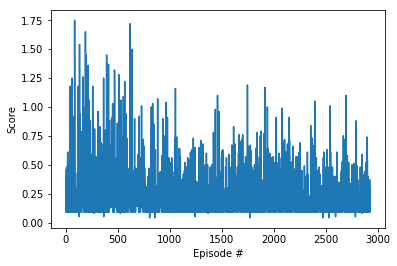

Episode 2931	Average Score: 0.21Maxi 1
Episode 2932	Average Score: 0.21Maxi 1
Episode 2933	Average Score: 0.21Maxi 3
Episode 2934	Average Score: 0.21Maxi 6
Episode 2935	Average Score: 0.21Maxi 2
Episode 2936	Average Score: 0.21Maxi 2
Episode 2937	Average Score: 0.21Maxi 1
Episode 2938	Average Score: 0.21Maxi 5
Episode 2939	Average Score: 0.21Maxi 10
Episode 2940	Average Score: 0.22Maxi 2
Episode 2940	Average Score: 0.22


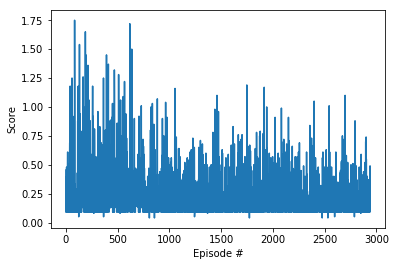

Episode 2941	Average Score: 0.21Maxi 2
Episode 2942	Average Score: 0.22Maxi 9
Episode 2943	Average Score: 0.22Maxi 4
Episode 2944	Average Score: 0.21Maxi 1
Episode 2945	Average Score: 0.21Maxi 3
Episode 2946	Average Score: 0.22Maxi 10
Episode 2947	Average Score: 0.22Maxi 7
Episode 2948	Average Score: 0.22Maxi 6
Episode 2949	Average Score: 0.22Maxi 6
Episode 2950	Average Score: 0.22Maxi 2
Episode 2950	Average Score: 0.22


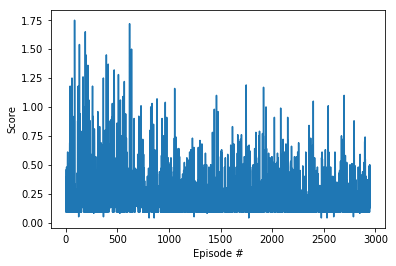

Episode 2951	Average Score: 0.23Maxi 14
Episode 2952	Average Score: 0.22Maxi 4
Episode 2953	Average Score: 0.22Maxi 5
Episode 2954	Average Score: 0.22Maxi 4
Episode 2955	Average Score: 0.22Maxi 9
Episode 2956	Average Score: 0.22Maxi 3
Episode 2957	Average Score: 0.23Maxi 9
Episode 2958	Average Score: 0.23Maxi 3
Episode 2959	Average Score: 0.23Maxi 5
Episode 2960	Average Score: 0.23Maxi 7
Episode 2960	Average Score: 0.23


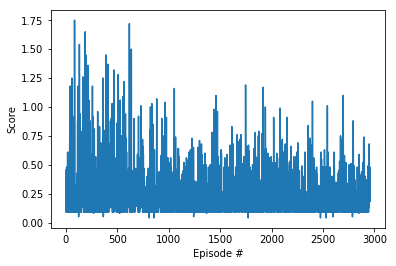

Episode 2961	Average Score: 0.23Maxi 2
Episode 2962	Average Score: 0.23Maxi 3
Episode 2963	Average Score: 0.23Maxi 4
Episode 2964	Average Score: 0.23Maxi 2
Episode 2965	Average Score: 0.23Maxi 2
Episode 2966	Average Score: 0.23Maxi 1
Episode 2967	Average Score: 0.23Maxi 2
Episode 2968	Average Score: 0.23Maxi 3
Episode 2969	Average Score: 0.23Maxi 5
Episode 2970	Average Score: 0.23Maxi 2
Episode 2970	Average Score: 0.23


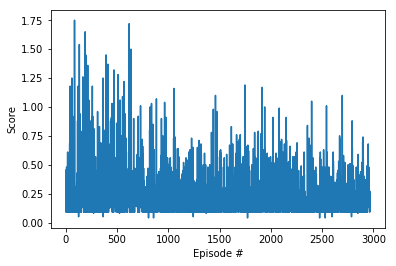

Episode 2971	Average Score: 0.23Maxi 1
Episode 2972	Average Score: 0.23Maxi 1
Episode 2973	Average Score: 0.22Maxi 2
Episode 2974	Average Score: 0.22Maxi 1
Episode 2975	Average Score: 0.23Maxi 12
Episode 2976	Average Score: 0.23Maxi 2
Episode 2977	Average Score: 0.22Maxi 2
Episode 2978	Average Score: 0.22Maxi 2
Episode 2979	Average Score: 0.22Maxi 3
Episode 2980	Average Score: 0.22Maxi 3
Episode 2980	Average Score: 0.22


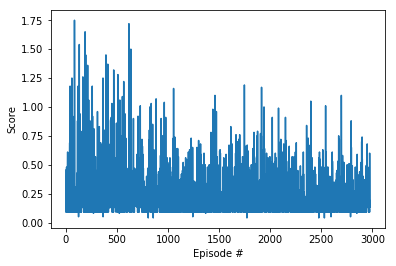

Episode 2981	Average Score: 0.22Maxi 1
Episode 2982	Average Score: 0.22Maxi 5
Episode 2983	Average Score: 0.22Maxi 1
Episode 2984	Average Score: 0.23Maxi 7
Episode 2985	Average Score: 0.23Maxi 7
Episode 2986	Average Score: 0.23Maxi 3
Episode 2987	Average Score: 0.23Maxi 9
Episode 2988	Average Score: 0.23Maxi 2
Episode 2989	Average Score: 0.24Maxi 6
Episode 2990	Average Score: 0.23Maxi 2
Episode 2990	Average Score: 0.23


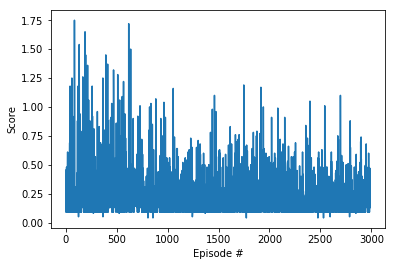

Episode 2991	Average Score: 0.23Maxi 12
Episode 2992	Average Score: 0.23Maxi 1
Episode 2993	Average Score: 0.23Maxi 2
Episode 2994	Average Score: 0.23Maxi 5
Episode 2995	Average Score: 0.23Maxi 1
Episode 2996	Average Score: 0.23Maxi 1
Episode 2997	Average Score: 0.23Maxi 5
Episode 2998	Average Score: 0.23Maxi 5
Episode 2999	Average Score: 0.23Maxi 4

Environment solved in 2900 episodes!	Average Score: 0.23
Episode 3000	Average Score: 0.22Maxi 3
Episode 3000	Average Score: 0.22


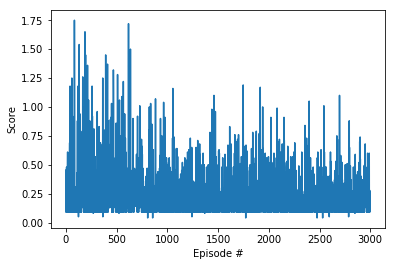

Episode 3000	Average Score: 0.22


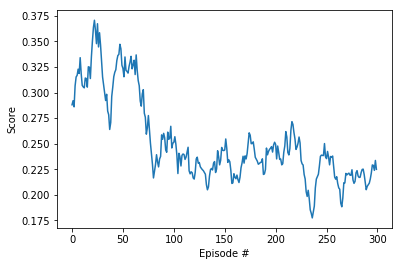

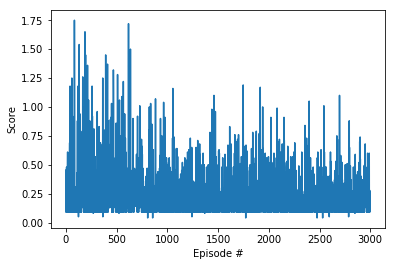

In [39]:
# have to modify this according to the Gazebo sim
# did that
def dqn(n_episodes=3000, max_t=10000, eps_start=1.0, eps_end=0.05, eps_decay=0.999):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    avg_scores = []
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start# initialize epsilon
    Max_t = 0
    
    for i_episode in range(1, n_episodes+1):
        global saving_score
        global saving_episode
        if np.mean(scores_window)>= saving_score or (i_episode % saving_episode == 0 and i_episode != 0):
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint_agent_at_'+str(i_episode)+'.pth')
            saving_episode += next_saving
            if np.mean(scores_window)>= saving_score:
                saving_score += next_saving_score
            if np.mean(scores_window)>=160.0:
                break
        
        
        
        state = env.reset()
        state = data_norm(state)
#         # just using the first 5000 values of the echo sequence
#         if len(observation[0]) >= 5000:
#             state = [observation[0][:5000]/norm_max, observation[1][:5000]/norm_max]
#         else :
#             state = [handling_echo_bug(observation[0])/norm_max, handling_echo_bug(observation[1])/norm_max]
       
        score = 0
        #print("hello")
        for t in range(max_t):
            #print("state",state[0].shape)
            action = agent.act(state, eps =eps)
            #print(action.dtype)
            action = np.int32(action)
            next_state, reward, done, info = env.step(action)
            next_state = data_norm(next_state)
            #assert(len(next_observation[0])> 5000), "wtf fuck is going on "+str(next_observation[0].shape)
#             if len(next_observation[0]) >= 5000:
#                 next_state = [next_observation[0][:5000]/norm_max , next_observation[1][:5000]/norm_max]
#             else :
#                 next_state = [handling_echo_bug(next_observation[0])/norm_max, handling_echo_bug(next_observation[1])/norm_max]
            #print("next_state",next_state[0].shape, len(next_observation), next_observation[0].shape )
            #next_state = np.resize(extract_luminance_state(env_info.visual_observations[0], peek = True) , (1,84,84))
            #print(next_state.shape)
            agent.step(state, action, reward, next_state, done)
            #print(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                Max_t = t
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        print("Maxi" ,Max_t)
        if i_episode % 10 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            fig = plt.figure()
            ax = fig.add_subplot(111)
            avg_scores.append(np.mean(scores_window))
            plt.plot(np.arange(len(scores)), scores)
            plt.ylabel('Score')
            plt.xlabel('Episode #')
            plt.show()
            
        if i_episode % 100 == 0 and i_episode != 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            fig = plt.figure()
            ax = fig.add_subplot(111)
            plt.plot(np.arange(len(avg_scores)), avg_scores)
            plt.ylabel('Score')
            plt.xlabel('Episode #')
            plt.show()
        
    return scores

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()


In [ ]:
print(saving_score)

In [ ]:
# have to modify this according to the Gazebo sim
# did that
def dqn_test(n_episodes=3000, max_t=10000, eps_start=1.0, eps_end=0.01, eps_decay=0.99):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    avg_scores = []
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start# initialize epsilon
    Max_t = 0
    
    for i_episode in range(1, n_episodes+1):
        global saving_score
        global saving_episode
        if np.mean(scores_window)>= saving_score or (i_episode % saving_episode == 0 and i_episode != 0):
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint_agent_at_'+str(i_episode)+'.pth')
            saving_episode += next_saving
            if np.mean(scores_window)>= saving_score:
                saving_score += next_saving_score
            if np.mean(scores_window)>=160.0:
                break
        
        
        
        state = env.reset()
        state = data_norm(state)
#         # just using the first 5000 values of the echo sequence
#         if len(observation[0]) >= 5000:
#             state = [observation[0][:5000]/norm_max, observation[1][:5000]/norm_max]
#         else :
#             state = [handling_echo_bug(observation[0])/norm_max, handling_echo_bug(observation[1])/norm_max]
       
        score = 0
        #print("hello")
        for t in range(max_t):
            #print("state",state[0].shape)
            action = agent.act(state, eps =eps)
            #print(action.dtype)
            action = np.int32(action)
            next_state, reward, done, info = env.step(action)
            next_state = data_norm(next_state)
            #assert(len(next_observation[0])> 5000), "wtf fuck is going on "+str(next_observation[0].shape)
#             if len(next_observation[0]) >= 5000:
#                 next_state = [next_observation[0][:5000]/norm_max , next_observation[1][:5000]/norm_max]
#             else :
#                 next_state = [handling_echo_bug(next_observation[0])/norm_max, handling_echo_bug(next_observation[1])/norm_max]
            #print("next_state",next_state[0].shape, len(next_observation), next_observation[0].shape )
            #next_state = np.resize(extract_luminance_state(env_info.visual_observations[0], peek = True) , (1,84,84))
            #print(next_state.shape)
            agent.step(state, action, reward, next_state, done)
            #print(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                Max_t = t
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        print("Maxi" ,Max_t)
        if i_episode % 10 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            fig = plt.figure()
            ax = fig.add_subplot(111)
            avg_scores.append(np.mean(scores_window))
            plt.plot(np.arange(len(scores)), scores)
            plt.ylabel('Score')
            plt.xlabel('Episode #')
            plt.show()
            
        if i_episode % 100 == 0 and i_episode != 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            fig = plt.figure()
            ax = fig.add_subplot(111)
            plt.plot(np.arange(len(avg_scores)), avg_scores)
            plt.ylabel('Score')
            plt.xlabel('Episode #')
            plt.show()
        
    return scores

scores = dqn_test()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()


In [7]:
env._close()